#**i have been refered below given blog during eda and featurization**

**1.https://medium.com/analytics-vidhya/healthcare-provider-fraud-detection-analysis-using-machine-learning-81ebf09ed955**
**2.https://towardsdatascience.com/for-real-auto-insurance-fraud-claim-detection-with-machine-learning-efcf957b38f3**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# **LOADING ALL CSV FILES (TRAIN AND TEST)**

In [173]:
# Train inpatient data
Train_inpatient_data       =      pd.read_csv('/content/Train_Inpatientdata-1542865627584.csv')
Test_inpatient_data        =      pd.read_csv('/content/Test_Inpatientdata-1542969243754.csv')

# Train data 
Train_data                 =      pd.read_csv('/content/Train-1542865627584.csv')
Test_data                  =      pd.read_csv('/content/Test-1542969243754.csv')

# Train_outpatient_data
Train_outpatient_data      =      pd.read_csv('/content/Train_Outpatientdata-1542865627584.csv')
Test_outpatient_data       =      pd.read_csv('/content/Test_Outpatientdata-1542969243754.csv')

# Train_beneficiary_data 
Train_beneficiary_data     =      pd.read_csv('/content/Train_Beneficiarydata-1542865627584.csv')
Test_beneficiary_data      =      pd.read_csv('/content/Test_Beneficiarydata-1542969243754.csv')

# **Train data exploratory data analysis**

In [174]:
Train_data.head(5)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


# **OBSERVATION**

**AS WE CAN SEE THAT IN THE TRAIN AND TEST DATASET THERE ARE ONLY TWO COLUMNS SUCH AS PROVIDER COLUMN CONTAINING PROVIDERS DETAILS**  

**SECOND COLUMN CALLED AS POTENTIAL_FRAUD GIVEN AS YES OR NO IF PROVIDER FRAUD OR NOT**

In [175]:
Train_data.shape

(5410, 2)

In [176]:
Train_data.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

# **NO NULL VALUE IN TRAIN DATASET**

# **OBSERVATION**

**There is no null value in dataset its good sign**

# **OBSERVATION**
**1. train data set has 5410 rows and having same number of rows so we can see these data is from every different providers no any repetition**

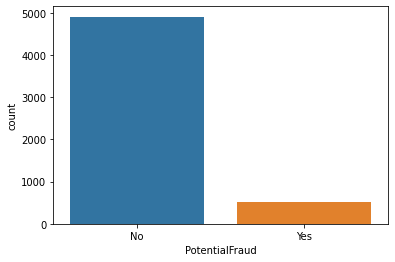

In [6]:
sns.countplot(Train_data['PotentialFraud'])

# **OBSERVATION**

**1. From this above plot we can observe that number of fraudlent are highly less in numbers then non-fraud so this is highly imbalanced dataset**

# **BENEFICIARY DATA EXPLORATORY DATA ANALYSIS**

In [177]:
# checking columns 
Train_beneficiary_data['RenalDiseaseIndicator'].value_counts()


0    118978
Y     19578
Name: RenalDiseaseIndicator, dtype: int64

In [178]:
Test_beneficiary_data.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [179]:
# checking null values in dataset

Train_beneficiary_data.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

# **OBSERVATION**

**There is many null values in dataset we need to handle them carefull**

**the reason that DOD column is containing many null values due to all patients are not died so those have no date of death column**

In [180]:
# replacing the chornic desease value 2 with 0

Train_beneficiary_data = Train_beneficiary_data.replace ({'ChronicCond_Alzheimer' :2 ,'ChronicCond_Heartfailure':2 ,'ChronicCond_KidneyDisease':2 ,'ChronicCond_Cancer':2,
                                                    'ChronicCond_ObstrPulmonary': 2 , 'ChronicCond_Depression':2 , 'ChronicCond_Diabetes':2 , 'ChronicCond_IschemicHeart':2,
                                                    'ChronicCond_Osteoporasis':2 , 'ChronicCond_rheumatoidarthritis':2 , 'ChronicCond_stroke': 2 },0)

Test_beneficiary_data = Test_beneficiary_data.replace ({'ChronicCond_Alzheimer' :2 ,'ChronicCond_Heartfailure':2 ,'ChronicCond_KidneyDisease':2 ,'ChronicCond_Cancer':2,
                                                    'ChronicCond_ObstrPulmonary': 2 , 'ChronicCond_Depression':2 , 'ChronicCond_Diabetes':2 , 'ChronicCond_IschemicHeart':2,
                                                    'ChronicCond_Osteoporasis':2 , 'ChronicCond_rheumatoidarthritis':2 , 'ChronicCond_stroke': 2 },0)

# replacing the value y with 1 in RenalDiseaseIndicator columns 

Train_beneficiary_data  =Train_beneficiary_data .replace ({'RenalDiseaseIndicator':'Y'},1)

Test_beneficiary_data  =Test_beneficiary_data .replace ({'RenalDiseaseIndicator':'Y'},1)

In [181]:
# replacing the gender vaule 2 with 0

Train_beneficiary_data =Train_beneficiary_data .replace ({'Gender':2},0)

Test_beneficiary_data  =Test_beneficiary_data .replace ({'Gender':2},0)

In [182]:
Train_beneficiary_data

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,0,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,0,1,0,0,0,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,0,1,1,1,1,0,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,0,1,0,0,0,0,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,0,0,0,0,0,0,0,0,430,460
138552,BENE159195,1938-12-01,NaN,0,1,0,49,530,12,12,...,0,1,0,0,0,0,0,0,880,100
138553,BENE159196,1916-06-01,NaN,0,1,0,6,150,12,12,...,1,1,1,0,0,0,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,0,0,1,0,0,0,0,0,2650,10


In [347]:
# converting these coulmn to numberic values 

Train_beneficiary_data[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease",
                        "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression",
                        "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis",
                        "ChronicCond_rheumatoidarthritis",
                        "ChronicCond_stroke", "RenalDiseaseIndicator"]] =Train_beneficiary_data[["ChronicCond_Alzheimer",
                                                                                                 "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", 
                                            "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression",
                                            "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis",
                                            "ChronicCond_rheumatoidarthritis",
                                            "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)


Test_beneficiary_data[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", 
                       "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", 
                       "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", 
                       "ChronicCond_rheumatoidarthritis",
                       "ChronicCond_stroke", "RenalDiseaseIndicator"]] =  Test_beneficiary_data[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure",
                                                                                                 "ChronicCond_KidneyDisease", 
                                         "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes",
                                         "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", 
                                         "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)


# **OBSERVATION**

#**NOW WE ARE CONVERTING THESE COLUMN TO NUMERIC VALUES TO PERFORM CERTAIN OPERATION IN FUTURE LIKE PLOTTING, AMOUNT ANALYSIS**

In [184]:
Train_beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,0,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,0,1,0,0,0,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,0,1,1,1,1,0,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,0,1,0,0,0,0,0,0,1790,1200


# **BAR PLOT OF GENDER**

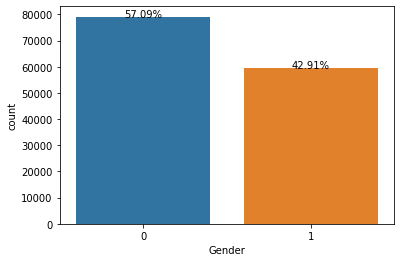

In [15]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

ax = sns.countplot(x=Train_beneficiary_data["Gender"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_beneficiary_data)*100),
            ha="center")

# **OBSERVATION**

##**1. THE CONTRIBUTION OF MALE AND FEMALE IN DATSET AS FOLLOW: 57.09% : 42.91%**
##**2. THE MALE AND FEMALE CONTRIBUTION NOT TOO IMBALANCED EXCEPT SLIGHT DIFFERENCE 13%**

# **BAR PLOT FOR RACE**

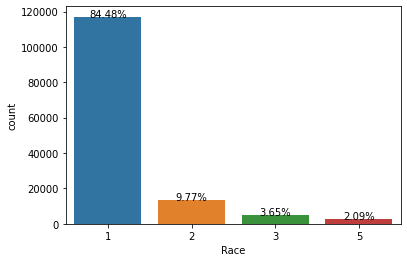

In [16]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

ax = sns.countplot(x=Train_beneficiary_data["Race"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_beneficiary_data)*100),
            ha="center")

# **OBSERVATION**

## **AS WE CAN SEE FROM PLOT 84% PATIENT BELONG TO RACE1**

## **MOST OF PAIENT BELONGS TO CLASS 1,2,3,5**

# **BAR PLOT FOR STATE**

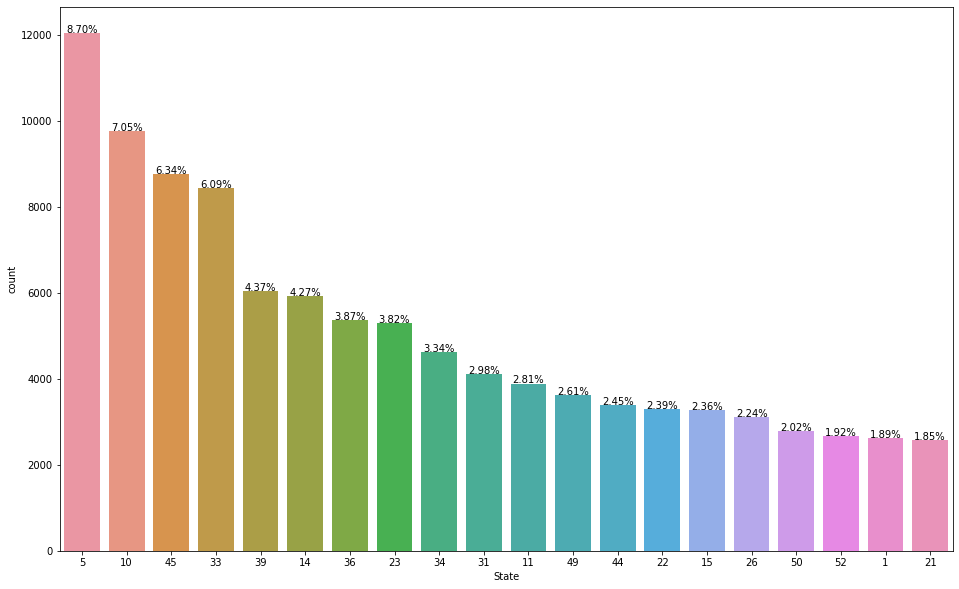

In [17]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

top_20_states = Train_beneficiary_data['State'].value_counts().nlargest(20)
plt.figure(figsize=(16,10))
ax = sns.countplot(x=Train_beneficiary_data["State"],order=top_20_states.index)
for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_beneficiary_data)*100),
            ha="center")

# **OBSERVATION**

## **1.  maximum number patient has from state having code 5,10,45,33,39,4,36, 23,34,31,11,49,44,22,15,26,50,52,1,21**

## **2.  top 5 states has almost 30% patient having state_code 5,0,45,33,39**

# **BAR PLOT FOR COUNTRY**

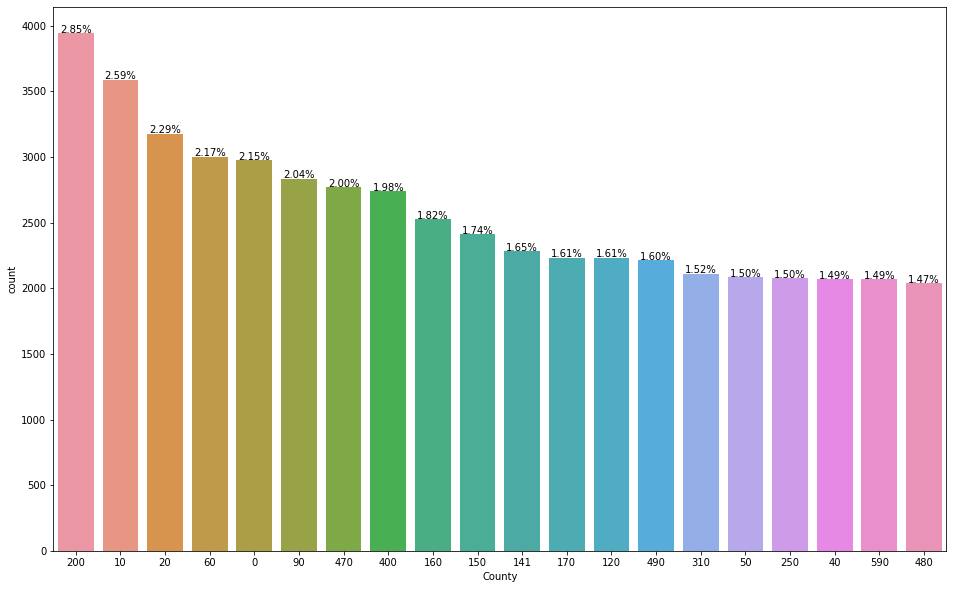

In [18]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

top_20_states = Train_beneficiary_data['County'].value_counts().nlargest(20)
plt.figure(figsize=(16,10))
ax = sns.countplot(x=Train_beneficiary_data["County"],order=top_20_states.index)
for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_beneficiary_data)*100),
            ha="center")

# **OBSERVATION**

## **1. TOP COUNTRIES HAVING MOST BENEFECIARIES ARE 200,10,20,60 AND 0**
## **2. ALMOST 13% BENEFICIES BELONGS TO TOP 5 COUNTRY**

# **calculating the Risk score**

## **As we know that which ever patient has affected by choronic desease that patient has a chance or risk of kidney desease**

## **so we have to calculate the patient risk score and analyze that by summing up all the type of choronic score for all beneficiries**

In [185]:
# now here we are going to calculate the risk score by summing up all the type of choronic deasease given in dataset 

Train_beneficiary_data['patient_risk_score'] =  Train_beneficiary_data['ChronicCond_Alzheimer'] + Train_beneficiary_data['ChronicCond_Heartfailure']\
                                              + Train_beneficiary_data['ChronicCond_KidneyDisease'] + Train_beneficiary_data['ChronicCond_Cancer'] \
                                              + Train_beneficiary_data['ChronicCond_ObstrPulmonary'] + Train_beneficiary_data['ChronicCond_Depression'] \
                                              + Train_beneficiary_data['ChronicCond_Diabetes'] + Train_beneficiary_data['ChronicCond_IschemicHeart'] \
                                              + Train_beneficiary_data['ChronicCond_Osteoporasis'] + Train_beneficiary_data['ChronicCond_rheumatoidarthritis'] \
                                              + Train_beneficiary_data['ChronicCond_stroke'] + Train_beneficiary_data['RenalDiseaseIndicator']

# calculating risk score for train beneficiries dara 
Test_beneficiary_data['patient_risk_score'] =   Test_beneficiary_data['ChronicCond_Alzheimer'] + Test_beneficiary_data['ChronicCond_Heartfailure']\
                                              + Test_beneficiary_data['ChronicCond_KidneyDisease'] + Test_beneficiary_data['ChronicCond_Cancer'] \
                                              + Test_beneficiary_data['ChronicCond_ObstrPulmonary'] + Test_beneficiary_data['ChronicCond_Depression'] \
                                              + Test_beneficiary_data['ChronicCond_Diabetes'] + Test_beneficiary_data['ChronicCond_IschemicHeart'] \
                                              + Test_beneficiary_data['ChronicCond_Osteoporasis'] + Test_beneficiary_data['ChronicCond_rheumatoidarthritis'] \
                                              + Test_beneficiary_data['ChronicCond_stroke'] + Test_beneficiary_data['RenalDiseaseIndicator']

In [186]:
Train_beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,patient_risk_score
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,7
1,BENE11002,1936-09-01,NaN,0,1,0,39,280,12,12,...,0,0,0,0,0,0,0,30,50,0
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,1,0,0,0,0,0,90,40,2
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,1,1,1,1,0,0,0,1810,760,6
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,1,0,0,0,0,0,0,1790,1200,2


In [187]:
print(Train_beneficiary_data.isna().sum())

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

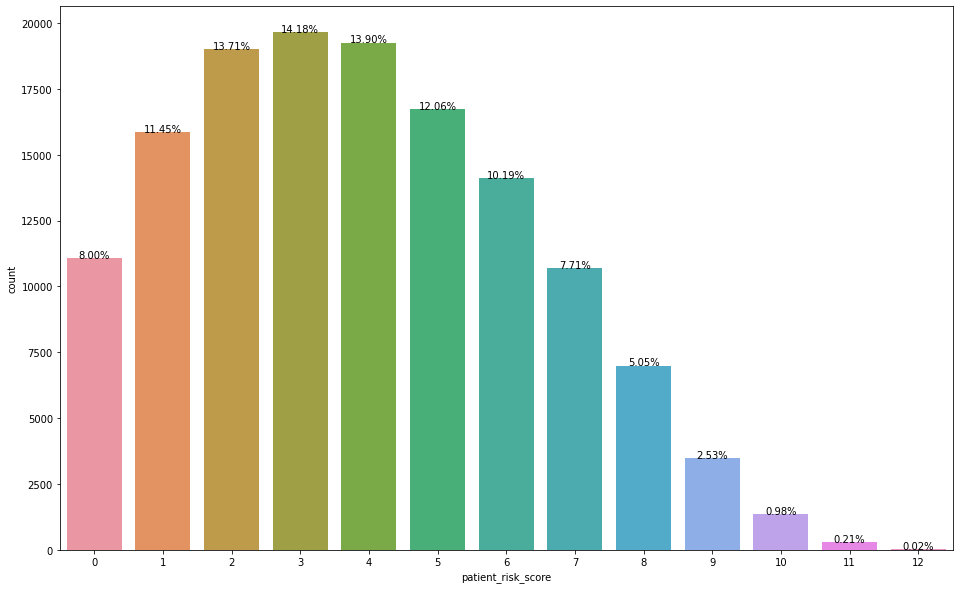

In [22]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars


plt.figure(figsize=(16,10))
ax = sns.countplot(x=Train_beneficiary_data["patient_risk_score"])
for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_beneficiary_data)*100),
            ha="center")

# **OBSERVATION**

## **This is plot is leftly skewed**
## **patient with 3,4,2,5,1 having high risk score**
## **patient with 9,10,11,12 having less risk score**

In [188]:
Train_beneficiary_data.columns


Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'patient_risk_score'],
      dtype='object')

# **PLOTTING COUNTPLOT FOR NoOfMonths_PartACo**

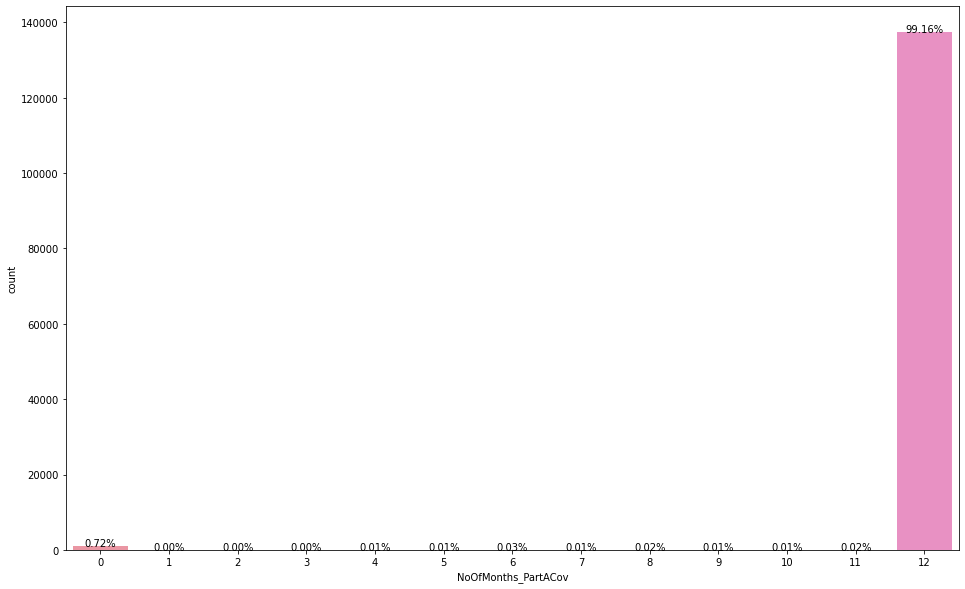

In [24]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars


plt.figure(figsize=(16,10))
ax = sns.countplot(x=Train_beneficiary_data["NoOfMonths_PartACov"])
for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_beneficiary_data)*100),
            ha="center")

# **OBSERVATION**

**As we can see that 99% beneficiries beong to month of 12**

# **PLOTTING THE COUNTPLOT FOR NoOfMonths_PartBCov**

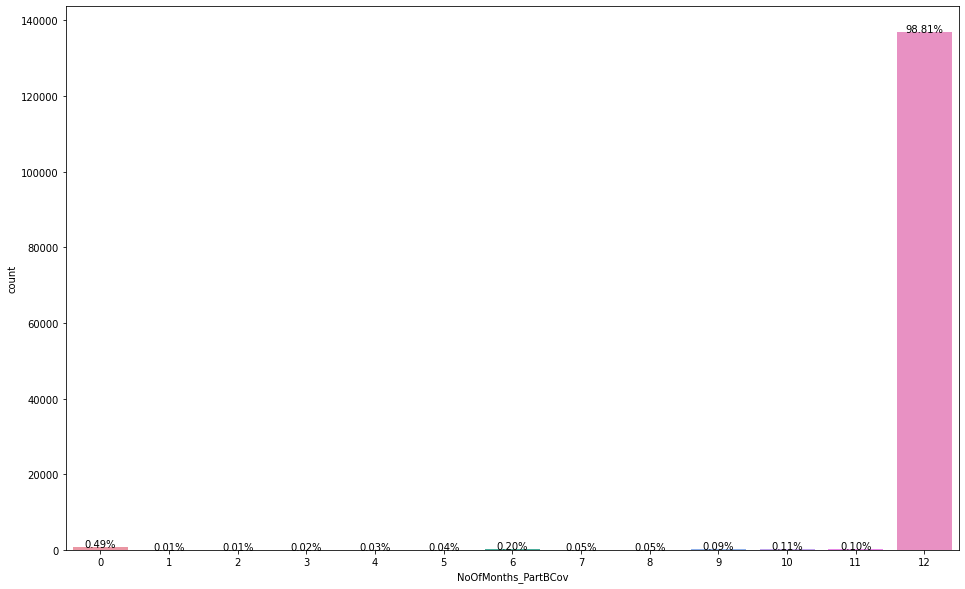

In [25]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars


plt.figure(figsize=(16,10))
ax = sns.countplot(x=Train_beneficiary_data["NoOfMonths_PartBCov"])
for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_beneficiary_data)*100),
            ha="center")

# **OBSERVATION**

##**Again for part b as well 98.81 patient belong to month of 12**

# **Analyzing the IPAnnualReimbursementAmt column with diff plot**

## **kde plot for IPAnnualReimbursementAmt column**


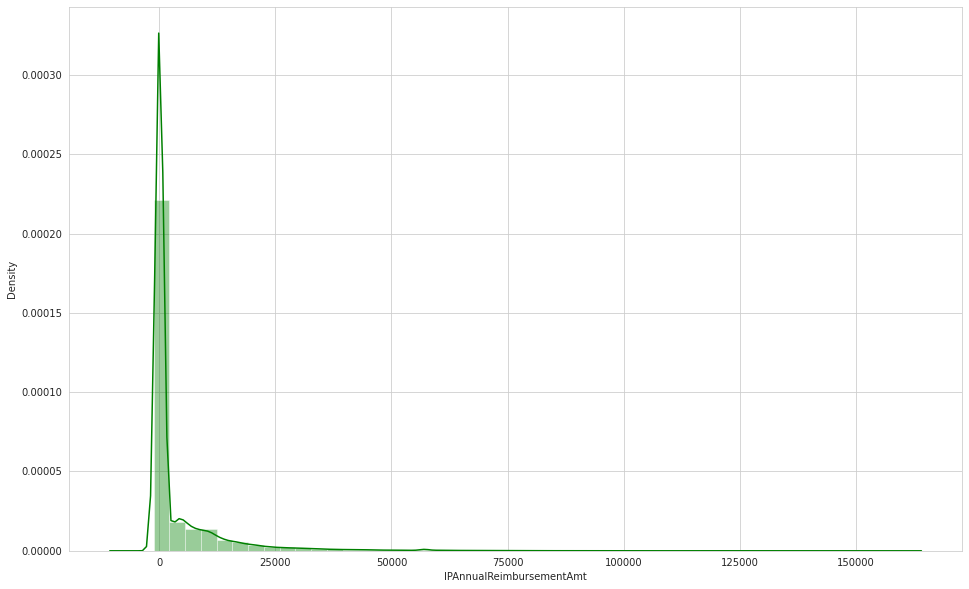

In [26]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.distplot(Train_beneficiary_data["IPAnnualReimbursementAmt"], color="g",kde =True , label="feature1")


In [27]:
data = Train_beneficiary_data["IPAnnualReimbursementAmt"]

# Calculate the percentiles
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)
p100 = np.percentile(data, 100)

# Print the percentiles
print("25th percentile:", p25)
print("50th percentile:", p50)
print("75th percentile:", p75)
print("100th percentile:", p100)

25th percentile: 0.0
50th percentile: 0.0
75th percentile: 2280.0
100th percentile: 161470.0


In [28]:
data = Train_beneficiary_data["IPAnnualReimbursementAmt"]

# Calculate the percentiles
p90 = np.percentile(data, 90)
p91 = np.percentile(data, 91)
p92 = np.percentile(data, 92)
p93 = np.percentile(data, 93)
p94 = np.percentile(data, 94)
p95 = np.percentile(data, 95)
p96 = np.percentile(data, 96)
p97 = np.percentile(data, 97)
p98 = np.percentile(data, 98)
p99 = np.percentile(data, 99)



# Print the percentiles
print("91th percentile:", p91)
print("92th percentile:", p92)
print("93th percentile:", p93)
print("94th percentile:", p94)
print("95th percentile:", p95)
print("96th percentile:", p96)
print("97th percentile:", p97)
print("98th percentile:", p98)
print("99th percentile:", p99)
print("100th percentile:", p100)


91th percentile: 13000.0
92th percentile: 14400.0
93th percentile: 16000.0
94th percentile: 18000.0
95th percentile: 20260.0
96th percentile: 24000.0
97th percentile: 28243.50000000006
98th percentile: 35000.0
99th percentile: 49000.0
100th percentile: 161470.0


In [29]:
data = Train_beneficiary_data["IPAnnualReimbursementAmt"]

# Calculate the percentiles
p99_1 = np.percentile(data, 99.1)
p99_2 = np.percentile(data, 9.2)
p99_3 = np.percentile(data, 99.3)
p99_4 = np.percentile(data, 99.4)
p99_5 = np.percentile(data, 99.5)
p99_6 = np.percentile(data, 99.6)
p99_7 = np.percentile(data, 99.7)
p99_8 = np.percentile(data, 99.8)
p99_9 = np.percentile(data, 99.9)




# Print the percentiles
print("p99.1th percentile:", p99_1)
print("p99.2th percentile:", p99_2)
print("p99.3th percentile:", p99_3)
print("p99.4th percentile:", p99_4 )
print("p99.5th percentile:", p99_5)
print("p99.6th percentile:", p99_6)
print("p99.6th percentile:", p99_7)
print("p99.8th percentile:", p99_8)
print("p99.9th percentile:", p99_9)


p99.1th percentile: 51110.0
p99.2th percentile: 0.0
p99.3th percentile: 57000.0
p99.4th percentile: 57100.0
p99.5th percentile: 59210.0
p99.6th percentile: 63000.0
p99.6th percentile: 67333.39999999967
p99.8th percentile: 74000.0
p99.9th percentile: 87000.0


# **plotting box plot**

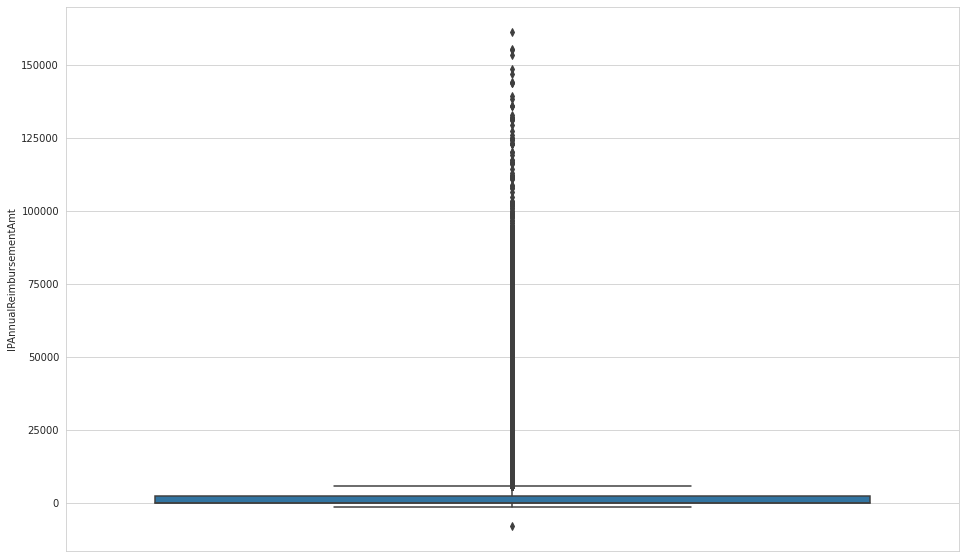

In [30]:
plt.figure(figsize=(16,10))
sns.boxplot(y=Train_beneficiary_data["IPAnnualReimbursementAmt"])

# **OBSERVATION**

## **1. we can see that** 
**25th percentile: 0.0**

**50th percentile: 0.0**

**75th percentile: 2280.0**

**100th percentile: 161470.0**


## **2.till the 93th percentile values are lies between 0 to 15000 but after that values getting increasing exponatially**

##**3. i think this is because of due to some outliers**

# **Analyzing the IPAnnualDeductibleAmt column with diff plot**

## **plotting distplot to visulize the amount distribution**

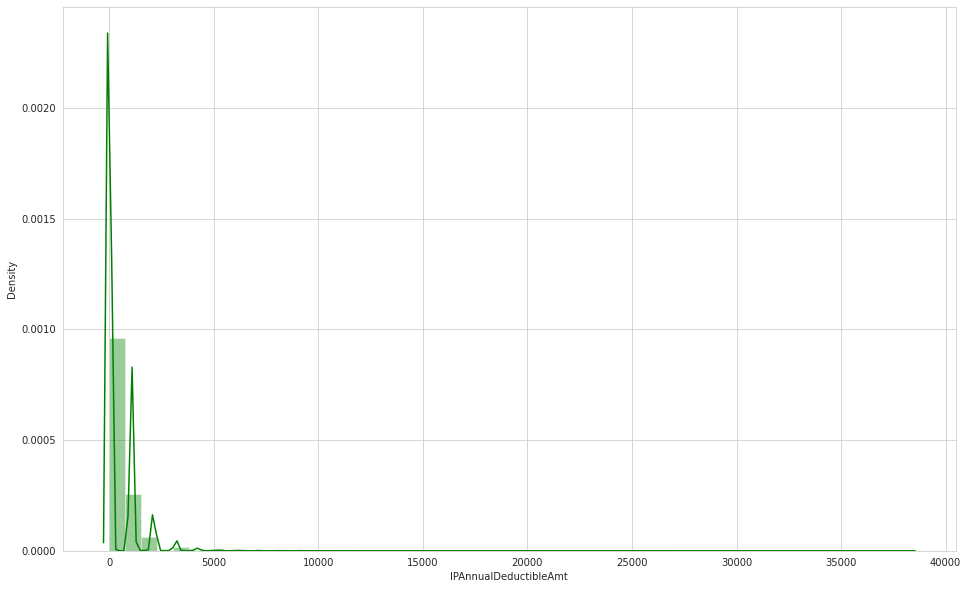

In [31]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.distplot(Train_beneficiary_data["IPAnnualDeductibleAmt"], color="g",kde =True , label="feature1")


In [32]:
data = Train_beneficiary_data["IPAnnualDeductibleAmt"]

# Calculate the percentiles
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)
p100 = np.percentile(data, 100)

# Print the percentiles
print("25th percentile:", p25)
print("50th percentile:", p50)
print("75th percentile:", p75)
print("100th percentile:", p100)

25th percentile: 0.0
50th percentile: 0.0
75th percentile: 1068.0
100th percentile: 38272.0


In [33]:
data = Train_beneficiary_data["IPAnnualDeductibleAmt"]

# Calculate the percentiles
p90 = np.percentile(data, 90)
p91 = np.percentile(data, 91)
p92 = np.percentile(data, 92)
p93 = np.percentile(data, 93)
p94 = np.percentile(data, 94)
p95 = np.percentile(data, 95)
p96 = np.percentile(data, 96)
p97 = np.percentile(data, 97)
p98 = np.percentile(data, 98)
p99 = np.percentile(data, 99)



# Print the percentiles
print("91th percentile:", p91)
print("92th percentile:", p92)
print("93th percentile:", p93)
print("94th percentile:", p94)
print("95th percentile:", p95)
print("96th percentile:", p96)
print("97th percentile:", p97)
print("98th percentile:", p98)
print("99th percentile:", p99)
print("100th percentile:", p100)


91th percentile: 1068.0
92th percentile: 1068.0
93th percentile: 1068.0
94th percentile: 2136.0
95th percentile: 2136.0
96th percentile: 2136.0
97th percentile: 2136.0
98th percentile: 2136.0
99th percentile: 3204.0
100th percentile: 38272.0


In [34]:
data = Train_beneficiary_data["IPAnnualDeductibleAmt"]

# Calculate the percentiles
p99_1 = np.percentile(data, 99.1)
p99_2 = np.percentile(data, 9.2)
p99_3 = np.percentile(data, 99.3)
p99_4 = np.percentile(data, 99.4)
p99_5 = np.percentile(data, 99.5)
p99_6 = np.percentile(data, 99.6)
p99_7 = np.percentile(data, 99.7)
p99_8 = np.percentile(data, 99.8)
p99_9 = np.percentile(data, 99.9)




# Print the percentiles
print("p99.1th percentile:", p99_1)
print("p99.2th percentile:", p99_2)
print("p99.3th percentile:", p99_3)
print("p99.4th percentile:", p99_4 )
print("p99.5th percentile:", p99_5)
print("p99.6th percentile:", p99_6)
print("p99.6th percentile:", p99_7)
print("p99.8th percentile:", p99_8)
print("p99.9th percentile:", p99_9)

p99.1th percentile: 3204.0
p99.2th percentile: 0.0
p99.3th percentile: 4136.0
p99.4th percentile: 4272.0
p99.5th percentile: 4272.0
p99.6th percentile: 4272.0
p99.6th percentile: 5340.0
p99.8th percentile: 6272.0
p99.9th percentile: 9068.0


# **plotting box plot**

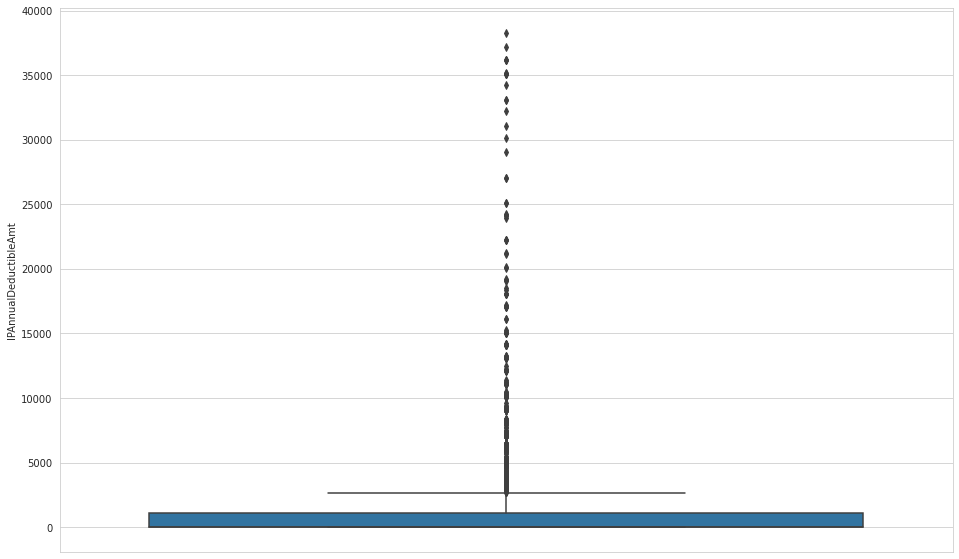

In [35]:
plt.figure(figsize=(16,10))
sns.boxplot(y=Train_beneficiary_data["IPAnnualDeductibleAmt"])

# **plotting scatter plot for annunal rehimburse amount and deductive amount**

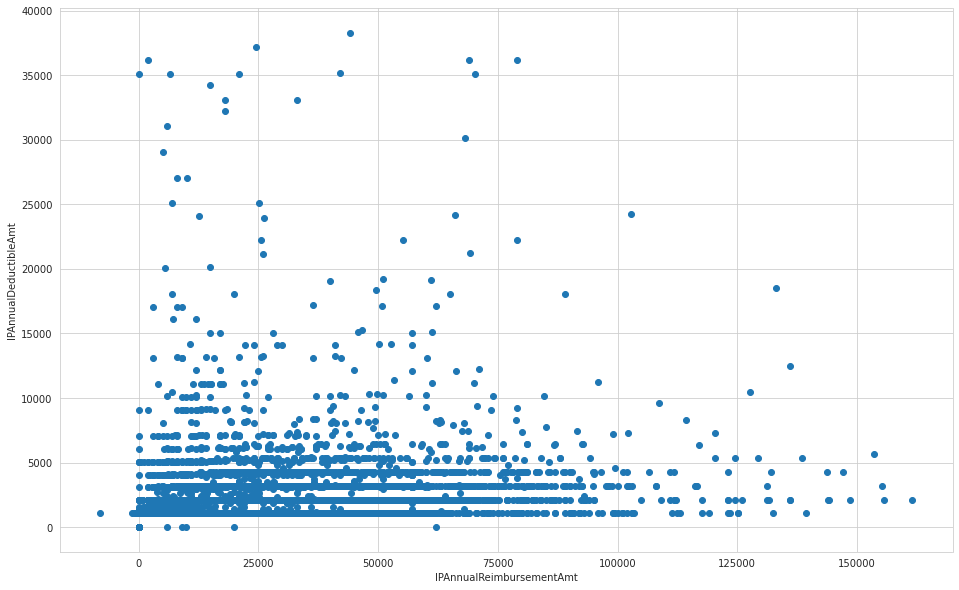

In [350]:
plt.figure(figsize=(16,10))
plt.scatter(Train_beneficiary_data["IPAnnualReimbursementAmt"], Train_beneficiary_data["IPAnnualDeductibleAmt"])
plt.xlabel("IPAnnualReimbursementAmt")
plt.ylabel("IPAnnualDeductibleAmt")
plt.show()

# **OBSERVATION**

##**1. MOST OF beneficiries whose amount got deducted their iprehimburse amunt and ipdeducted amount is less than ipdeducted amount 8000 abd iprehimburseamunt is less than 100000**

##**2. yes there is some beneficiries which iprehimburse amount is more than 1.5 lacks that may be some outlier**

# **OBSERVATION**

##**1. we can cleary obsrve that**
**25th percentile: 0.0**

**50th percentile: 0.0**

**75th percentile: 1068.0**

**100th percentile: 38272.0**

##**2. From the above plot and percentiles values i have observe that from the deductible amount values are lying between 0 to 3000 till 99th percentiles**

## **3. but when i drawn the percentiles values from 99.1 to 99.9 percentiles the values are getting increasing eexponatialy so we can conclude that there is extistence of some outlier in deductible amount**

In [37]:
Train_beneficiary_data.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'patient_risk_score'],
      dtype='object')

# **Analyzing the OPAnnualReimbursementAmt column with diff plot**

## **plotting distplot to visulize the amount distribution**

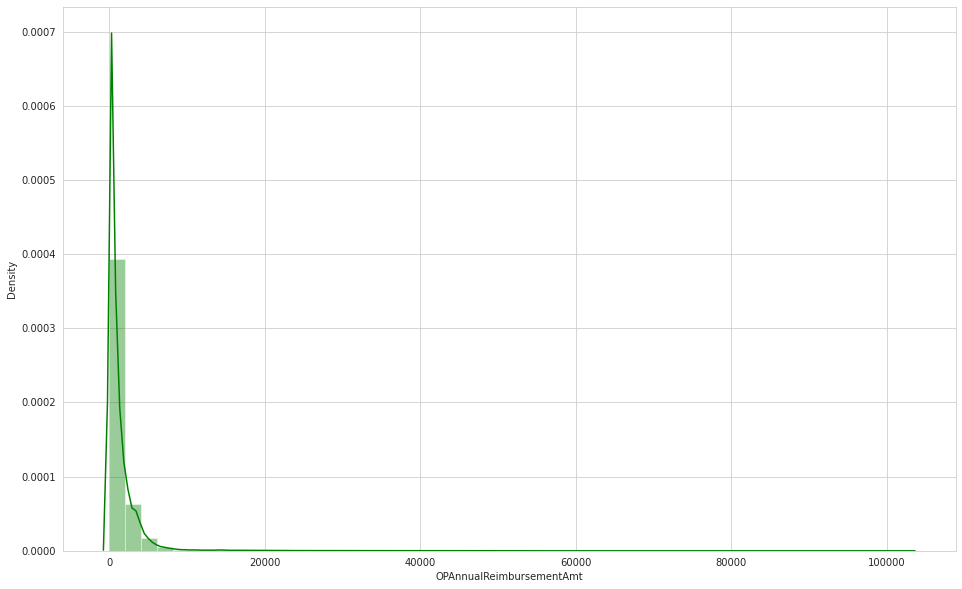

In [38]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.distplot(Train_beneficiary_data["OPAnnualReimbursementAmt"], color="g",kde =True , label="feature1")


In [39]:

data = Train_beneficiary_data["OPAnnualReimbursementAmt"]

# Calculate the percentiles
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)
p100 = np.percentile(data, 100)

# Print the percentiles
print("25th percentile:", p25)
print("50th percentile:", p50)
print("75th percentile:", p75)
print("100th percentile:", p100)

25th percentile: 170.0
50th percentile: 570.0
75th percentile: 1500.0
100th percentile: 102960.0


In [40]:
data = Train_beneficiary_data["OPAnnualReimbursementAmt"]

# Calculate the percentiles
p90 = np.percentile(data, 90)
p91 = np.percentile(data, 91)
p92 = np.percentile(data, 92)
p93 = np.percentile(data, 93)
p94 = np.percentile(data, 94)
p95 = np.percentile(data, 95)
p96 = np.percentile(data, 96)
p97 = np.percentile(data, 97)
p98 = np.percentile(data, 98)
p99 = np.percentile(data, 99)



# Print the percentiles
print("91th percentile:", p91)
print("92th percentile:", p92)
print("93th percentile:", p93)
print("94th percentile:", p94)
print("95th percentile:", p95)
print("96th percentile:", p96)
print("97th percentile:", p97)
print("98th percentile:", p98)
print("99th percentile:", p99)
print("100th percentile:", p100)

91th percentile: 3380.500000000029
92th percentile: 3560.0
93th percentile: 3780.0
94th percentile: 4030.0
95th percentile: 4370.0
96th percentile: 4850.0
97th percentile: 5540.0
98th percentile: 6850.0
99th percentile: 11514.500000000116
100th percentile: 102960.0


In [41]:
data = Train_beneficiary_data["OPAnnualReimbursementAmt"]

# Calculate the percentiles
p99_1 = np.percentile(data, 99.1)
p99_2 = np.percentile(data, 9.2)
p99_3 = np.percentile(data, 99.3)
p99_4 = np.percentile(data, 99.4)
p99_5 = np.percentile(data, 99.5)
p99_6 = np.percentile(data, 99.6)
p99_7 = np.percentile(data, 99.7)
p99_8 = np.percentile(data, 99.8)
p99_9 = np.percentile(data, 99.9)




# Print the percentiles
print("p99.1th percentile:", p99_1)
print("p99.2th percentile:", p99_2)
print("p99.3th percentile:", p99_3)
print("p99.4th percentile:", p99_4 )
print("p99.5th percentile:", p99_5)
print("p99.6th percentile:", p99_6)
print("p99.6th percentile:", p99_7)
print("p99.8th percentile:", p99_8)
print("p99.9th percentile:", p99_9)

p99.1th percentile: 12680.250000000233
p99.2th percentile: 50.0
p99.3th percentile: 14741.149999999907
p99.4th percentile: 16173.400000000256
p99.5th percentile: 17666.750000000175
p99.6th percentile: 19197.79999999999
p99.6th percentile: 21406.699999999837
p99.8th percentile: 24230.0
p99.9th percentile: 28694.45000000007


# **ploting box plot**

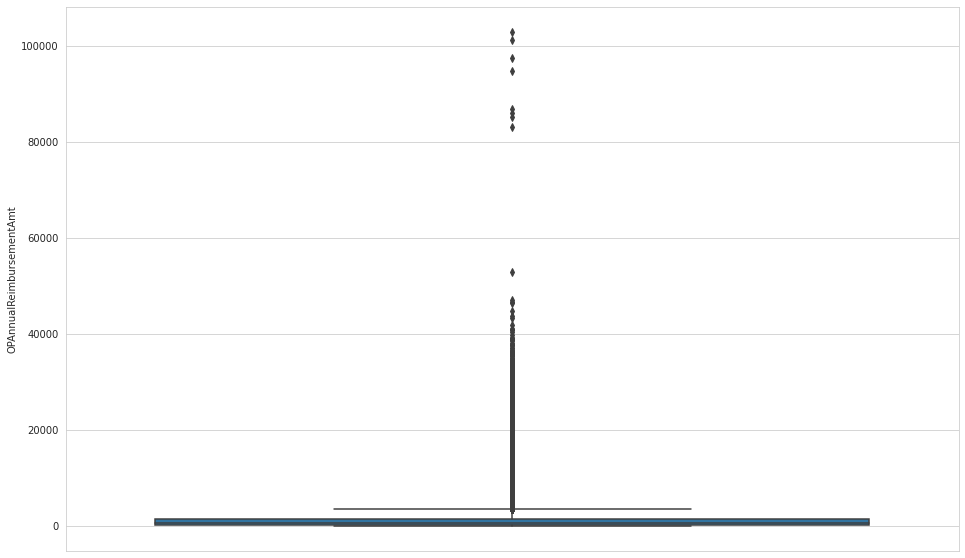

In [42]:
plt.figure(figsize=(16,10))
sns.boxplot(y=Train_beneficiary_data["OPAnnualReimbursementAmt"])

# **OBSERVATION**

## **as we can see that** 
**25th percentile: 170.0**

**50th percentile: 570.0**

**75th percentile: 1500.0**

**100th percentile: 102960.0**

# **2. for IPAnnualReimbursementAmt features values lies between 0 to 12000 from 0 to 99th percentiles values**

## **3. but the valus are getting increased from 99th percentiles explonatially 51000 to 88000 this may be due to occurence of some outlier**

# **plotting the distplot  for OPAnnualDeductibleAmt feature**

##**DISTPLOT**

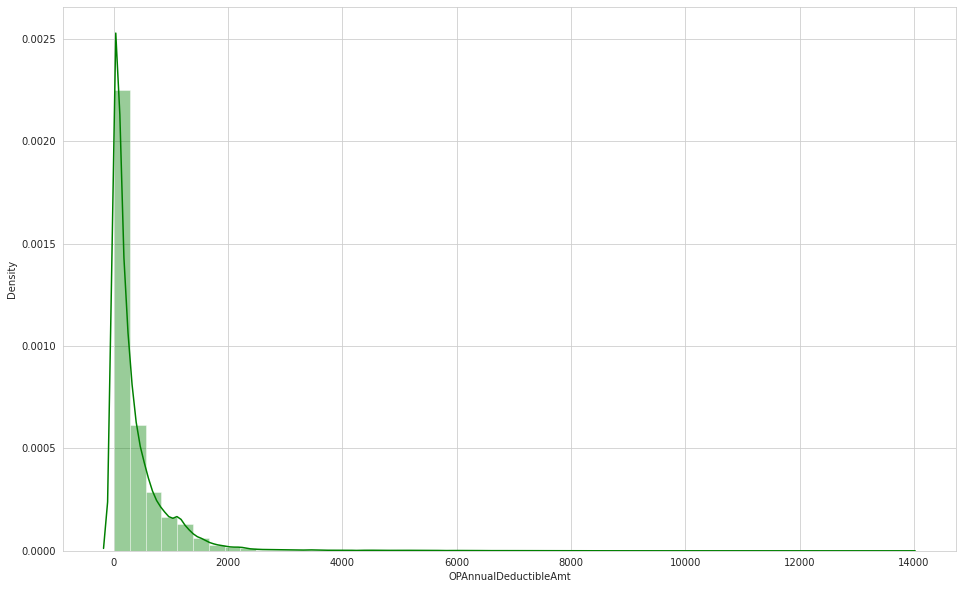

In [43]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.distplot(Train_beneficiary_data["OPAnnualDeductibleAmt"], color="g",kde =True , label="feature1")

In [44]:

data = Train_beneficiary_data["OPAnnualDeductibleAmt"]

# Calculate the percentiles
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)
p100 = np.percentile(data, 100)

# Print the percentiles
print("25th percentile:", p25)
print("50th percentile:", p50)
print("75th percentile:", p75)
print("100th percentile:", p100)

25th percentile: 40.0
50th percentile: 170.0
75th percentile: 460.0
100th percentile: 13840.0


In [45]:
data = Train_beneficiary_data["OPAnnualDeductibleAmt"]

# Calculate the percentiles
p90 = np.percentile(data, 90)
p91 = np.percentile(data, 91)
p92 = np.percentile(data, 92)
p93 = np.percentile(data, 93)
p94 = np.percentile(data, 94)
p95 = np.percentile(data, 95)
p96 = np.percentile(data, 96)
p97 = np.percentile(data, 97)
p98 = np.percentile(data, 98)
p99 = np.percentile(data, 99)



# Print the percentiles
print("91th percentile:", p91)
print("92th percentile:", p92)
print("93th percentile:", p93)
print("94th percentile:", p94)
print("95th percentile:", p95)
print("96th percentile:", p96)
print("97th percentile:", p97)
print("98th percentile:", p98)
print("99th percentile:", p99)
print("100th percentile:", p100)

91th percentile: 1060.0
92th percentile: 1120.0
93th percentile: 1180.0
94th percentile: 1250.0
95th percentile: 1340.0
96th percentile: 1470.0
97th percentile: 1650.0
98th percentile: 1999.7999999999884
99th percentile: 2960.0
100th percentile: 13840.0


In [46]:
data = Train_beneficiary_data["OPAnnualDeductibleAmt"]

# Calculate the percentiles
p99_1 = np.percentile(data, 99.1)
p99_2 = np.percentile(data, 9.2)
p99_3 = np.percentile(data, 99.3)
p99_4 = np.percentile(data, 99.4)
p99_5 = np.percentile(data, 99.5)
p99_6 = np.percentile(data, 99.6)
p99_7 = np.percentile(data, 99.7)
p99_8 = np.percentile(data, 99.8)
p99_9 = np.percentile(data, 99.9)




# Print the percentiles
print("99.1th percentile:", p99_1)
print("99.2th percentile:", p99_2)
print("99.3th percentile:", p99_3)
print("99.4th percentile:", p99_4 )
print("99.5th percentile:", p99_5)
print("99.6th percentile:", p99_6)
print("99.6th percentile:", p99_7)
print("99.8th percentile:", p99_8)
print("99.9th percentile:", p99_9)

99.1th percentile: 3180.0
99.2th percentile: 0.0
99.3th percentile: 3720.0
99.4th percentile: 4100.0
99.5th percentile: 4502.250000000058
99.6th percentile: 4970.0
99.6th percentile: 5440.0
99.8th percentile: 6070.0
99.9th percentile: 7040.0


# **PLOTTING THE BOX PLOT**

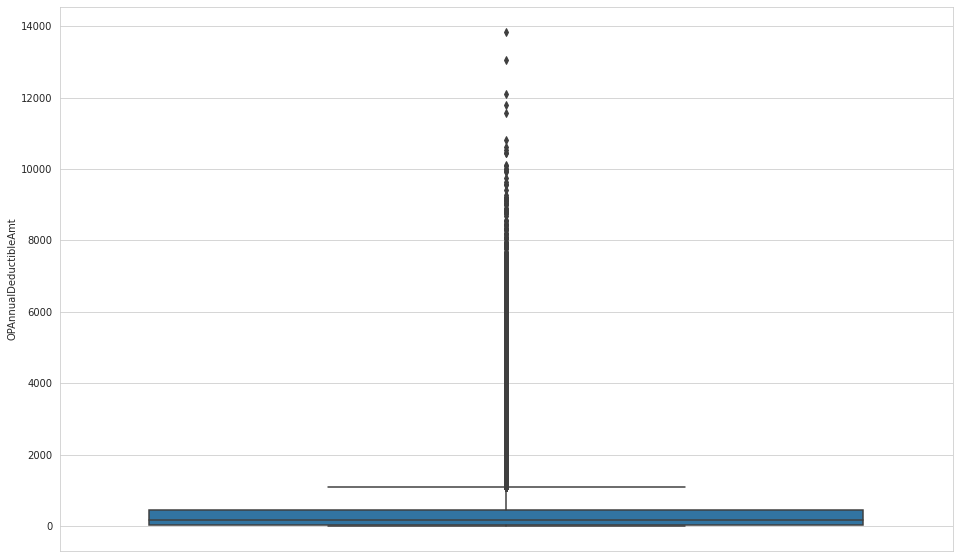

In [47]:
plt.figure(figsize=(16,10))
sns.boxplot(y=Train_beneficiary_data["OPAnnualDeductibleAmt"])

# **NOW WILL DRAW THE SCATTER PLOT TO CHECK THE RELATIONHIP BETWEEN OPAnnualDeductibleAmt AND OPAnnualDeductibleAm**

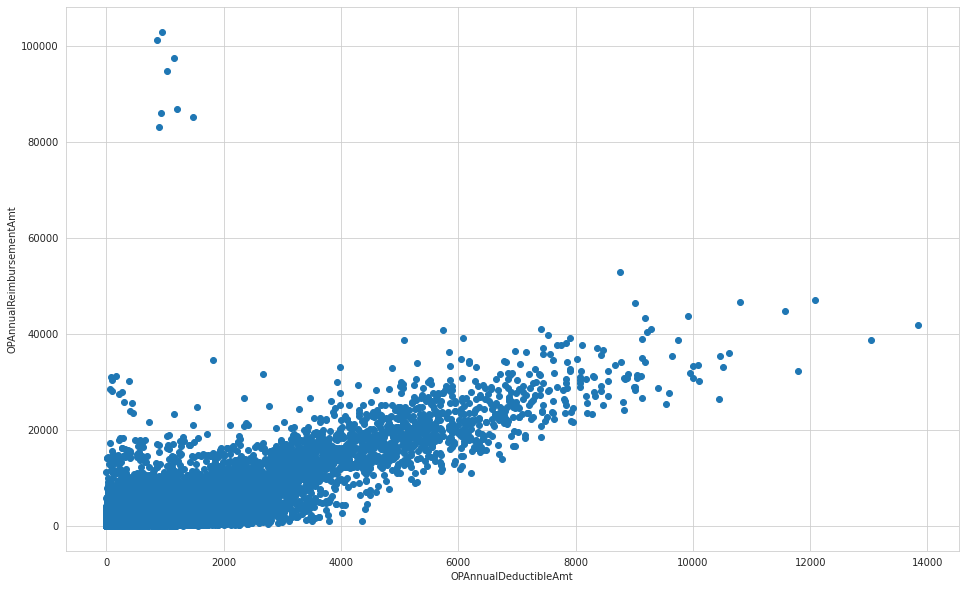

In [48]:
plt.figure(figsize=(16,10))
plt.scatter(Train_beneficiary_data["OPAnnualDeductibleAmt"], Train_beneficiary_data["OPAnnualReimbursementAmt"])
plt.xlabel("OPAnnualDeductibleAmt")
plt.ylabel("OPAnnualReimbursementAmt")
plt.show()

# **OBSERVATION**

##**1. TILL THE 99TH PERCENTILES OPAnnualDeductibleAmt WAS UNDER 3000 BUT AFTER 99TH PERCENTILE FROM 99.1TH TO 99.9 AMOUNT HAS INCREASED EXPONATIALLY THIS IS MAY BE BECAUSE DUE TO EXISTENCE OF SOME OUTLIERS**

In [189]:
Train_beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,patient_risk_score
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,7
1,BENE11002,1936-09-01,NaN,0,1,0,39,280,12,12,...,0,0,0,0,0,0,0,30,50,0
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,1,0,0,0,0,0,90,40,2
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,1,1,1,1,0,0,0,1810,760,6
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,1,0,0,0,0,0,0,1790,1200,2


#**Train_beneficiary_data convert columns to datetime**

In [190]:
# reference : https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# reference :https://pandasguide.readthedocs.io/en/latest/Pandas/timeseries.html

# Convert columns to datetime
Train_beneficiary_data['DOB'] = pd.to_datetime(Train_beneficiary_data['DOB'])
Train_beneficiary_data['DOD'] = pd.to_datetime(Train_beneficiary_data['DOD'])

#Caln_beneficiary_data['DOB'] = pd.to_datetime(Train_beneficiary_data['DOB'])
Train_beneficiary_data['DOD'] = pd.to_datetime(Train_beneficiary_data['DOD'])

#Calculate max value of date_of_death
max_date_of_death = Train_beneficiary_data['DOD'].max()

#Handle missing values in date_of_death
Train_beneficiary_data['DOD'].fillna(max_date_of_death, inplace=True)

# Subtract date of birth from date of death
Train_beneficiary_data['age_days'] = Train_beneficiary_data['DOD'] - Train_beneficiary_data['DOB']

# Divide the difference in days by 365.25 to get the difference in years
Train_beneficiary_data['age_years'] = Train_beneficiary_data['age_days'] / pd.Timedelta(days=365.25)

# Create a new column age
Train_beneficiary_data['age'] = Train_beneficiary_data['age_years'].apply(lambda x: round(x,2))






#**Train_beneficiary_data convert columns to datetime**

In [191]:
# reference : https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# reference :https://pandasguide.readthedocs.io/en/latest/Pandas/timeseries.html

Test_beneficiary_data['DOB'] = pd.to_datetime(Train_beneficiary_data['DOB'])
Test_beneficiary_data['DOD'] = pd.to_datetime(Train_beneficiary_data['DOD'])

#Calculate max value of date_of_death
max_date_of_death = Train_beneficiary_data['DOD'].max()

#Handle missing values in date_of_death
Test_beneficiary_data['DOD'].fillna(max_date_of_death, inplace=True)

# Subtract date of birth from date of death
Test_beneficiary_data['age_days'] = Train_beneficiary_data['DOD'] - Train_beneficiary_data['DOB']

# Divide the difference in days by 365.25 to get the difference in years
Test_beneficiary_data['age_years'] = Train_beneficiary_data['age_days'] / pd.Timedelta(days=365.25)

# Create a new column age
Test_beneficiary_data['age'] = Train_beneficiary_data['age_years'].apply(lambda x: round(x,2))

In [192]:
Train_beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,patient_risk_score,age_days,age_years,age
0,BENE11001,1943-01-01,2009-12-01,1,1,0,39,230,12,12,...,1,1,36000,3204,60,70,7,24441 days,66.915811,66.92
1,BENE11002,1936-09-01,2009-12-01,0,1,0,39,280,12,12,...,0,0,0,0,30,50,0,26754 days,73.248460,73.25
2,BENE11003,1936-08-01,2009-12-01,1,1,0,52,590,12,12,...,0,0,0,0,90,40,2,26785 days,73.333333,73.33
3,BENE11004,1922-07-01,2009-12-01,1,1,0,39,270,12,12,...,1,0,0,0,1810,760,6,31930 days,87.419576,87.42
4,BENE11005,1935-09-01,2009-12-01,1,1,0,24,680,12,12,...,0,0,0,0,1790,1200,2,27120 days,74.250513,74.25


# **DISTPLOT FOR AGE COLUMN ANALYSIS**

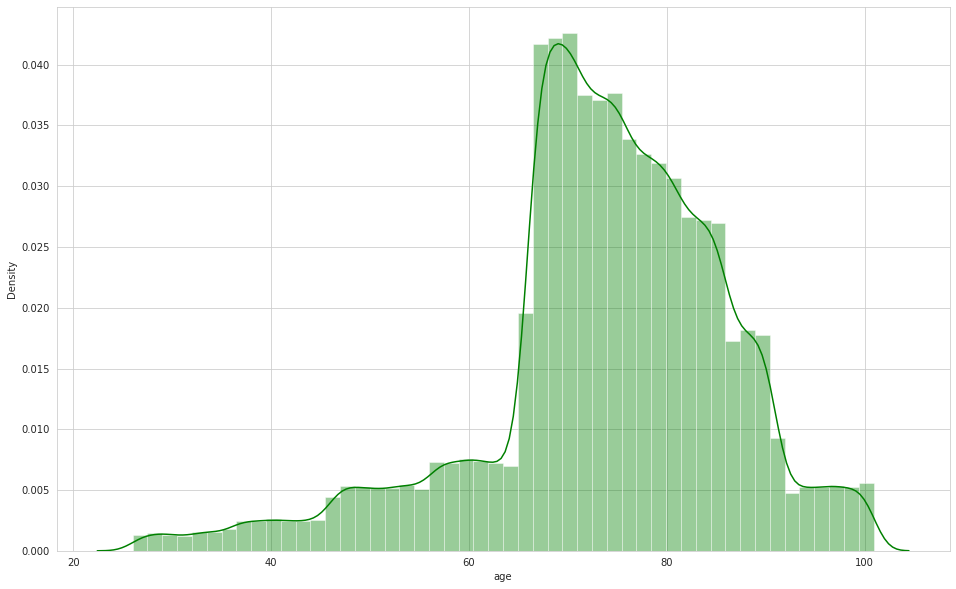

In [53]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.distplot(Train_beneficiary_data["age"], color="g",kde =True , label="feature1")

# **OBSERVATION**

## **AS we can see that most of beneficiries are lies between the age group 65 to 85 year of age**

## **in the age group of 20-40 and 90-100 beneficieries are very less**

# **Analysing the train and test inpatient data**

# **WE WILL ANALYZE THE DISTRIBUTION OF PHYCISIANS**

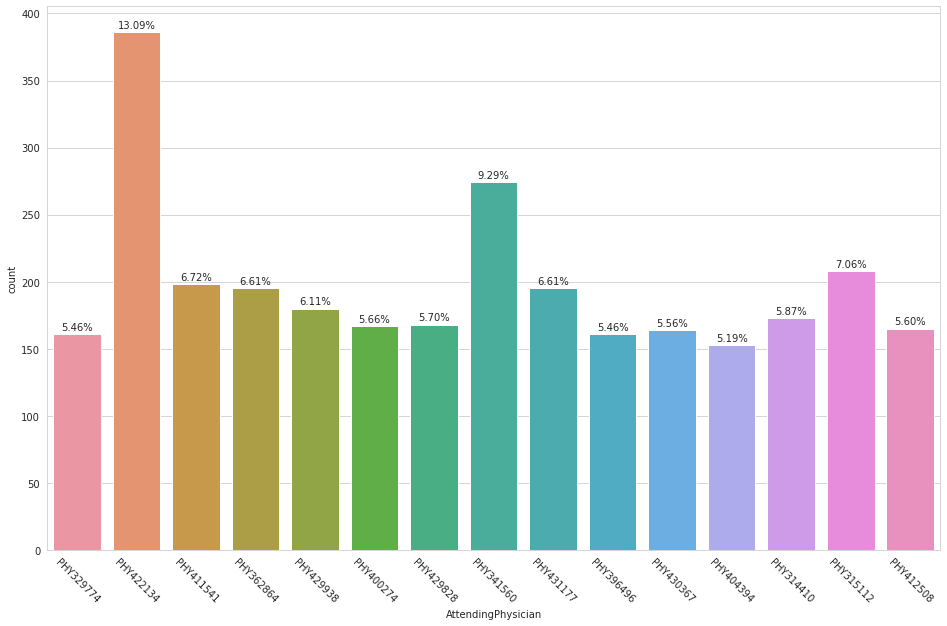

In [54]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

top_15_physicians = Train_inpatient_data["AttendingPhysician"].value_counts()[:15].index

# filter dataframe to only include top 20 physicians
Train_inpatient_data = Train_inpatient_data[Train_inpatient_data["AttendingPhysician"].isin(top_15_physicians)]

plt.figure(figsize=(16,10))
plt.xticks(rotation=-45, size=10)
ax = sns.countplot(x="AttendingPhysician", data = Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")

# **OBSERVATION**

##**1. PHYSICIAN WITH ID PHY422134,PHY341560,PHY315112 HAS ATTEND MOST PATIENT**

##**2. PHYSICIAN WITH ID PHY422134 HAS ATTEND ALMOST 14%  PATIENT SO THIS SEEMS TO BE SUSPICIOUS**


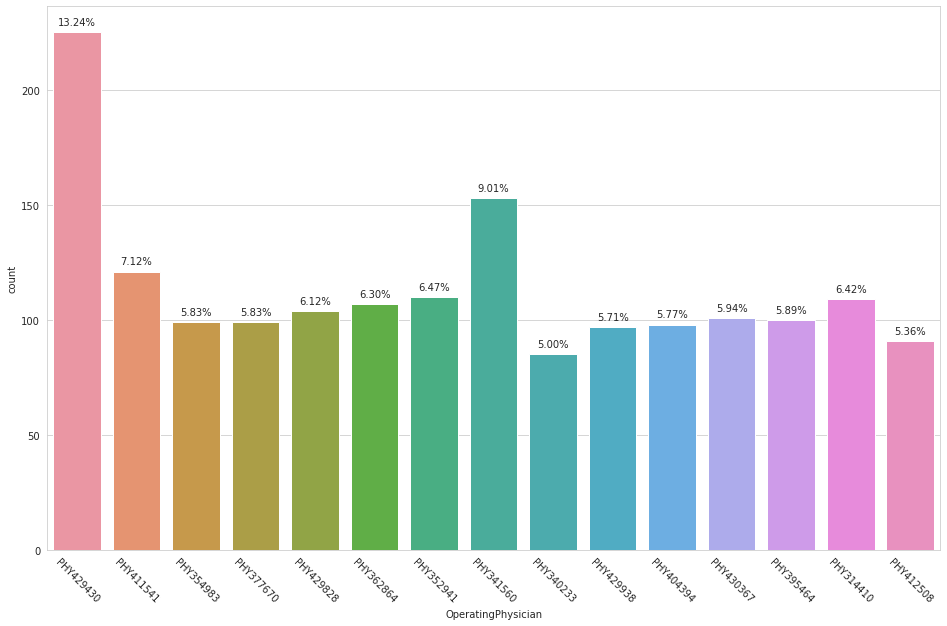

In [55]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars
plt.figure(figsize=(16,10))
plt.xticks(rotation=-45, size=10)
top_15_physicians = Train_inpatient_data["OperatingPhysician"].value_counts()[:15].index

# filter dataframe to only include top 20 physicians
Train_inpatient_data = Train_inpatient_data[Train_inpatient_data["OperatingPhysician"].isin(top_15_physicians)]

ax = sns.countplot(x="OperatingPhysician", data = Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")

# **OBSERVATION**

##**1. PHYSICIAN WITH ID PHY429430,PHY341560, PHY314410, PHY411541 HAS BEEN OPERATED MOST OF PATIENT**

##**2 PHYSICAN WITH ID PHY429430 HAS OPERATED HIGHEST NUMBER PERCENTAGES OF PATIENT WITH 13%**

In [193]:
Train_inpatient_data.shape

(40474, 30)

In [194]:
Test_inpatient_data.shape

(9551, 30)

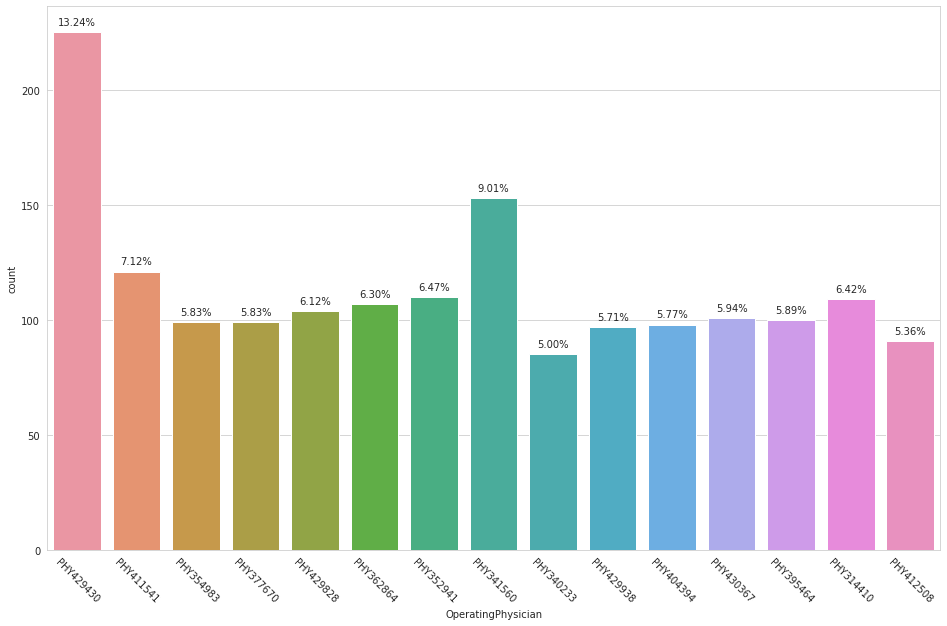

In [58]:
top_15_physicians = Train_inpatient_data["OperatingPhysician"].value_counts()[:15].index
filtered_data = Train_inpatient_data[Train_inpatient_data["OperatingPhysician"].isin(top_15_physicians)]

plt.figure(figsize=(16,10))
plt.xticks(rotation=-45, size=10)
ax = sns.countplot(x="OperatingPhysician", data = filtered_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(filtered_data)*100),
            ha="center")

In [195]:
Train_inpatient_data.shape

(40474, 30)

In [196]:
# reference : https://stackoverflow.com/questions/52145492/convert-1st-day-string-to-datetime
# reference :https://pandasguide.readthedocs.io/en/latest/Pandas/timeseries.html

# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_inpatient_data['ClaimStartDt'] = pd.to_datetime(Train_inpatient_data['ClaimStartDt'] , format = '%Y-%m-%d')
Train_inpatient_data['ClaimEndDt'] = pd.to_datetime(Train_inpatient_data['ClaimEndDt'],format = '%Y-%m-%d')

Test_inpatient_data['ClaimStartDt'] = pd.to_datetime(Test_inpatient_data['ClaimStartDt'] , format = '%Y-%m-%d')
Test_inpatient_data['ClaimEndDt'] = pd.to_datetime(Test_inpatient_data['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
Train_inpatient_data['AdmissionDt'] = pd.to_datetime(Train_inpatient_data['AdmissionDt'] , format = '%Y-%m-%d')
Train_inpatient_data['DischargeDt'] = pd.to_datetime(Train_inpatient_data['DischargeDt'],format = '%Y-%m-%d')

Test_inpatient_data['AdmissionDt'] = pd.to_datetime(Test_inpatient_data['AdmissionDt'] , format = '%Y-%m-%d')
Test_inpatient_data['DischargeDt'] = pd.to_datetime(Test_inpatient_data['DischargeDt'],format = '%Y-%m-%d')

In [197]:
# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
Train_inpatient_data['Hospitalization_Duration'] = ((Train_inpatient_data['DischargeDt'] - Train_inpatient_data['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_inpatient_data['Claim_Period'] = ((Train_inpatient_data['ClaimEndDt'] - Train_inpatient_data['ClaimStartDt']).dt.days)+1

Test_inpatient_data['Hospitalization_Duration'] = ((Test_inpatient_data['DischargeDt'] - Test_inpatient_data['AdmissionDt']).dt.days)+1
Test_inpatient_data['Claim_Period'] = ((Test_inpatient_data['ClaimEndDt'] - Test_inpatient_data['ClaimStartDt']).dt.days)+1

In [199]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
Train_inpatient_data['ClaimStart_Year'] = Train_inpatient_data['ClaimStartDt'].dt.year
Train_inpatient_data['ClaimStart_Month'] = Train_inpatient_data['ClaimStartDt'].dt.month
Test_inpatient_data['ClaimStart_Year'] = Test_inpatient_data['ClaimStartDt'].dt.year
Test_inpatient_data['ClaimStart_Month'] = Test_inpatient_data['ClaimStartDt'].dt.month

Train_inpatient_data['ClaimEnd_Year'] = Train_inpatient_data['ClaimEndDt'].dt.year
Train_inpatient_data['ClaimEnd_Month'] = Train_inpatient_data['ClaimEndDt'].dt.month
Test_inpatient_data['ClaimEnd_Year'] = Test_inpatient_data['ClaimEndDt'].dt.year
Test_inpatient_data['ClaimEnd_Month'] = Test_inpatient_data['ClaimEndDt'].dt.month

In [352]:
Train_inpatient_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient'],
      dtype='object')

# **plotting the plot claim start year duration**

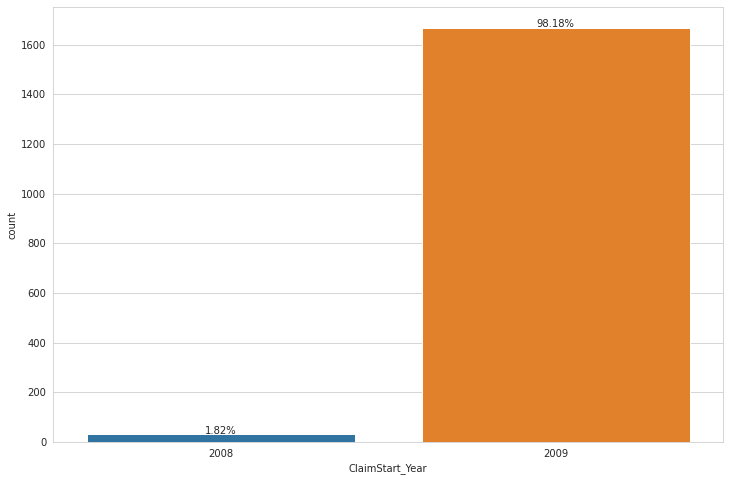

In [65]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="ClaimStart_Year", data=Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

## **WE CAN SEE THAT ALMOST 99% CLAIM STARTING IN 2009 EXCEPTING SOME CLAIMS SO WE CAN CONCLUDE HTAT THIS DATA IS TAKEN FROM 2009 INWARDS**

# **plotting plot for claim start month**

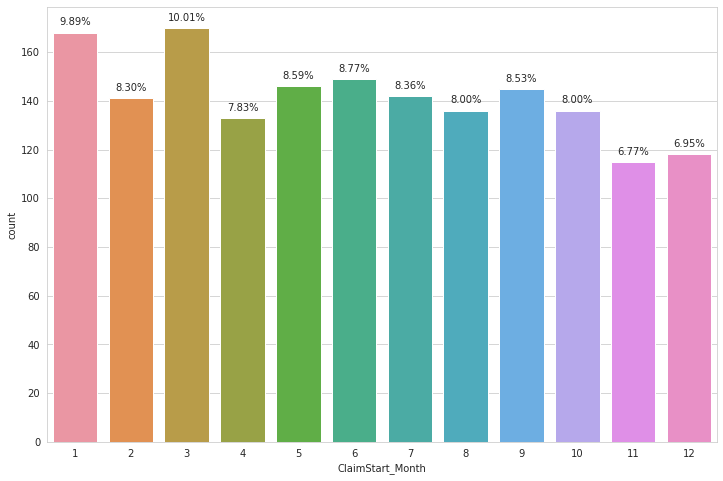

In [66]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="ClaimStart_Month", data=Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

## **WE CAN OBSERVE THAT MONTH THAT CLAIM STARTED  ITS ALMOST STARTED IN ALL 12 MONTH EQUALLY**

# **plotting plot for claim end year**

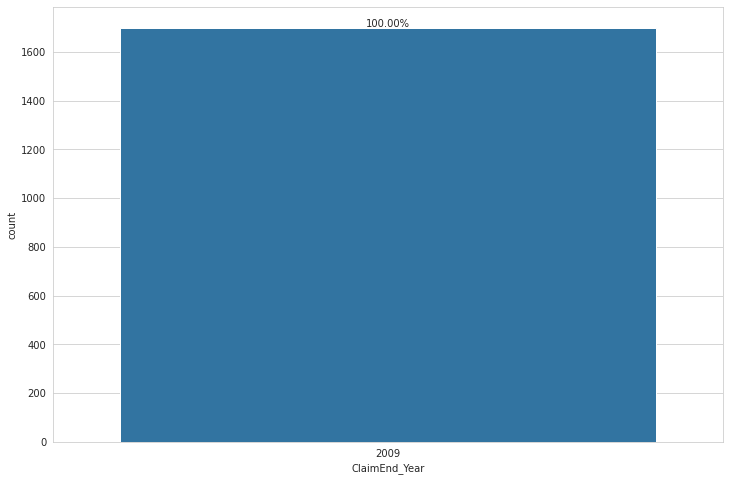

In [67]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="ClaimEnd_Year", data=Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. we can clearly say that all claim ends in year 2009**

# **plotting plot for claim end month**

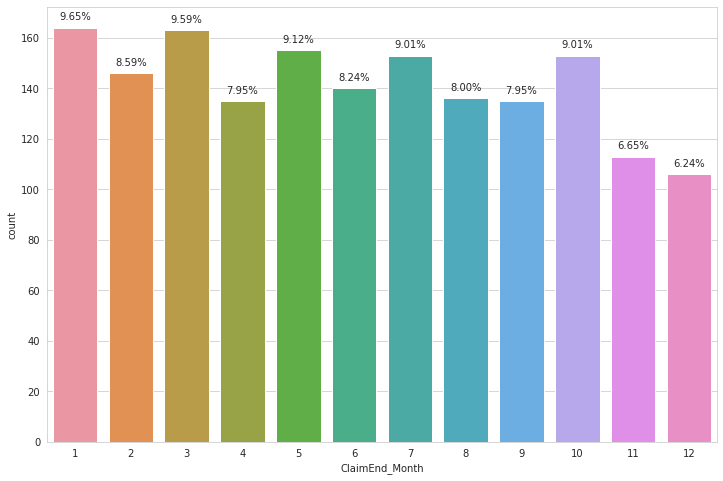

In [68]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="ClaimEnd_Month", data=Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")
plt.show()

In [201]:
Train_inpatient_data.shape


(40474, 37)

# **OBSERVATION**


## **1. THERE IS NO DISPERENCY IN THIS ALMOST EQUALLY DITRIBUTED IN ALL THE MOST EXCEPT SMALL DIFFEERENCE**

In [202]:
  # Get the month and year of Admission_Year and Admission_Month
Train_inpatient_data['Admission_Year'] = Train_inpatient_data['AdmissionDt'].dt.year
Train_inpatient_data['Admission_Month'] = Train_inpatient_data['AdmissionDt'].dt.month
Test_inpatient_data['Admission_Year'] = Test_inpatient_data['AdmissionDt'].dt.year
Test_inpatient_data['Admission_Month'] = Test_inpatient_data['AdmissionDt'].dt.month

Train_inpatient_data['Discharge_Year'] = Train_inpatient_data['DischargeDt'].dt.year
Train_inpatient_data['Discharge_Month'] = Train_inpatient_data['DischargeDt'].dt.month
Test_inpatient_data['Discharge_Year'] = Test_inpatient_data['DischargeDt'].dt.year
Test_inpatient_data['Discharge_Month'] = Test_inpatient_data['DischargeDt'].dt.month

In [203]:
Train_inpatient_data.shape

(40474, 41)

# **plotting plot for patient  Admission year**

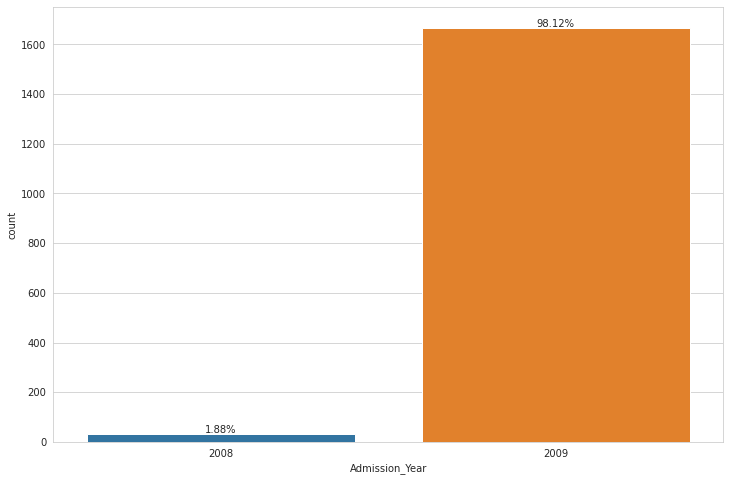

In [72]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Admission_Year", data=Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

## **1. FROM THE PLOT WE CAN CONCLUDE THAT ALMOST EVERY ADMISSION HAPPENED IN 2009 EXCEPT SOME IN 2008 IT CLEARLY SHOWS THAT THIS DATA IS TAKEN FROM DEC,2008 TO 2009**

# **plotting plot for patient  Admission_Month**

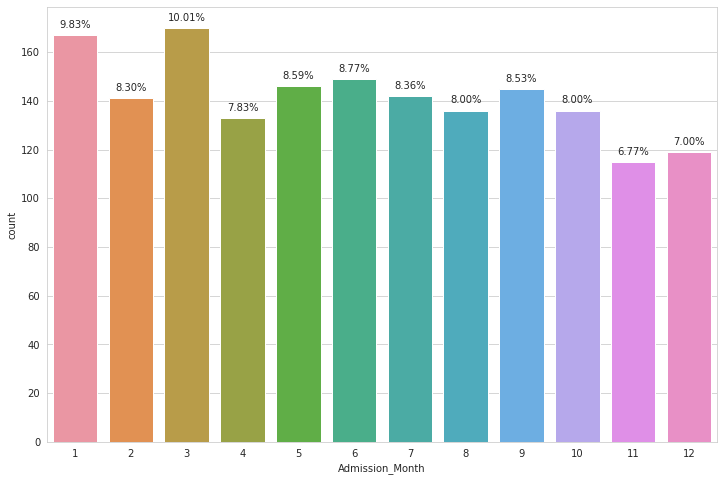

In [73]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Admission_Month", data=Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. FROM THE ADMISSION_MONTH PLOT WE CAN CONCLUDE THAT ADMISSION HAPPENED IN ALMOST IN EVERY MONTH EQUALLY EXCEPT JAN MONTH IN THIS MONTH SLIGHLY MORE BUT NOT BIG DIFFERENCE**

# **plotting plot for patient  Discharge_Year**

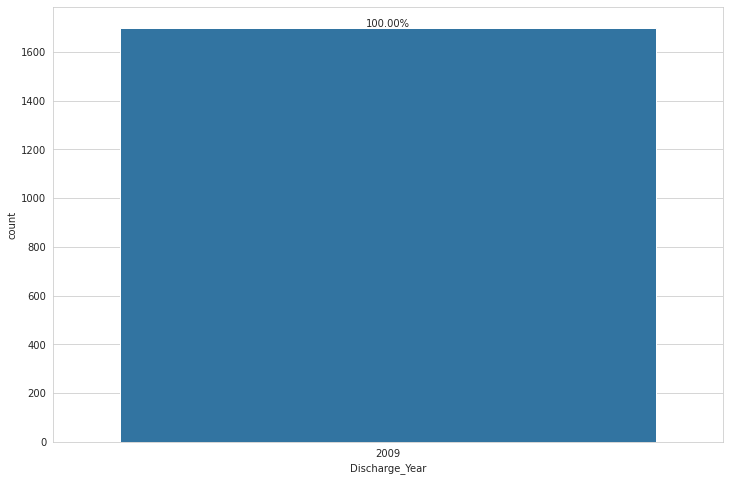

In [74]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Discharge_Year", data=Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. FROM THE ABOVE PLOT WE CAN CONCLUDE THAT ALMOST ALL THE PATIENT GOT DISCHARGE IN 2009 YEAR**

# **plotting plot for patient  Discharge_Month**

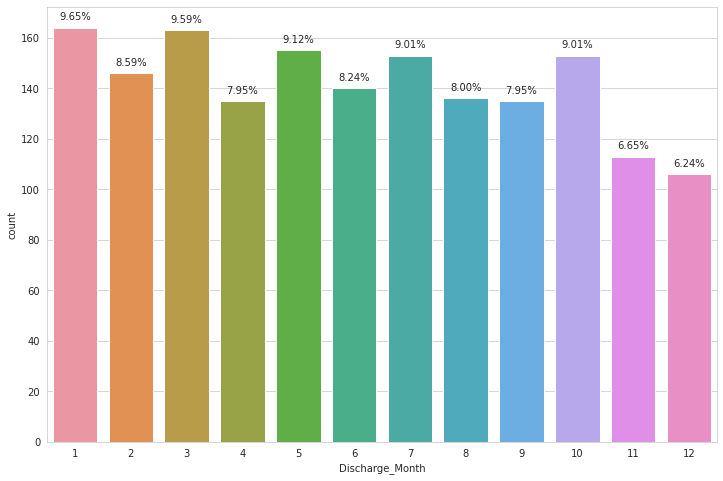

In [75]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Discharge_Month", data=Train_inpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_inpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. WE CAN SEE THAT THERE IS NOT BIG DIFFERENCE IN DISCHARGE MONTH ITS EQUALLY DISTRIBUTED EXCEPT IN SOME MONTH**

In [204]:
Train_inpatient_data.shape

(40474, 41)

# **NOW WILL CONCATE THE ALL THE CLAIM DIGNOSIS TO ANALYSE THE DIGNOSIS OF PATIENT**

In [205]:
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Train_inpatient_data["ClmDiagnosisCode_1"], 
                                           Train_inpatient_data["ClmDiagnosisCode_2"], 
                                           Train_inpatient_data["ClmDiagnosisCode_3"], 
                                           Train_inpatient_data["ClmDiagnosisCode_4"],
                                           Train_inpatient_data["ClmDiagnosisCode_5"], 
                                           Train_inpatient_data["ClmDiagnosisCode_6"],
                                           Train_inpatient_data["ClmDiagnosisCode_7"],
                                           Train_inpatient_data["ClmDiagnosisCode_8"],
                                           Train_inpatient_data["ClmDiagnosisCode_9"],
                                           Train_inpatient_data["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [206]:
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Test_inpatient_data["ClmDiagnosisCode_1"], 
                                           Test_inpatient_data["ClmDiagnosisCode_2"], 
                                           Test_inpatient_data["ClmDiagnosisCode_3"], 
                                           Test_inpatient_data["ClmDiagnosisCode_4"],
                                           Test_inpatient_data["ClmDiagnosisCode_5"], 
                                           Test_inpatient_data["ClmDiagnosisCode_6"],
                                           Test_inpatient_data["ClmDiagnosisCode_7"],
                                           Test_inpatient_data["ClmDiagnosisCode_8"],
                                           Test_inpatient_data["ClmDiagnosisCode_9"],
                                           Test_inpatient_data["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

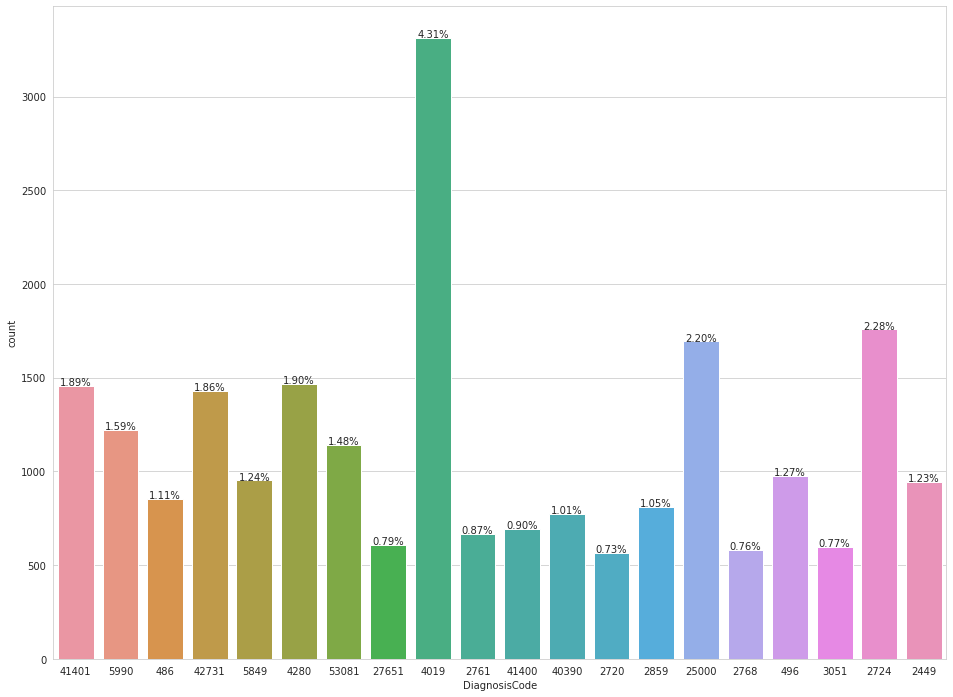

In [79]:
top_20_diagnosis = ClmDiagnosisCode_IP_df["DiagnosisCode"].value_counts().head(20)
plt.figure(figsize=(16,12))
ax = sns.countplot(x="DiagnosisCode", data=ClmDiagnosisCode_IP_df[ClmDiagnosisCode_IP_df["DiagnosisCode"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(ClmDiagnosisCode_IP_df)*100),
            ha="center")
plt.show()

# **OBSERVATION**

## **1. PATIENT WITH DIGNOSIS CODE 4019,41401,2724,25000,4280 AFFECTED MOST**

## **2. DIGNOSIS CODE 4019 AFFECTED THE MOST PATIENT ALMOST 5%**

In [207]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([Train_inpatient_data["ClmProcedureCode_1"], 
                                   Train_inpatient_data["ClmProcedureCode_2"],
                                   Train_inpatient_data["ClmProcedureCode_3"],
                                   Train_inpatient_data["ClmProcedureCode_4"], 
                                   Train_inpatient_data["ClmProcedureCode_5"], 
                                   Train_inpatient_data["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [208]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([Test_inpatient_data["ClmProcedureCode_1"], 
                                   Test_inpatient_data["ClmProcedureCode_2"],
                                   Test_inpatient_data["ClmProcedureCode_3"],
                                   Test_inpatient_data["ClmProcedureCode_4"], 
                                   Test_inpatient_data["ClmProcedureCode_5"], 
                                   Test_inpatient_data["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

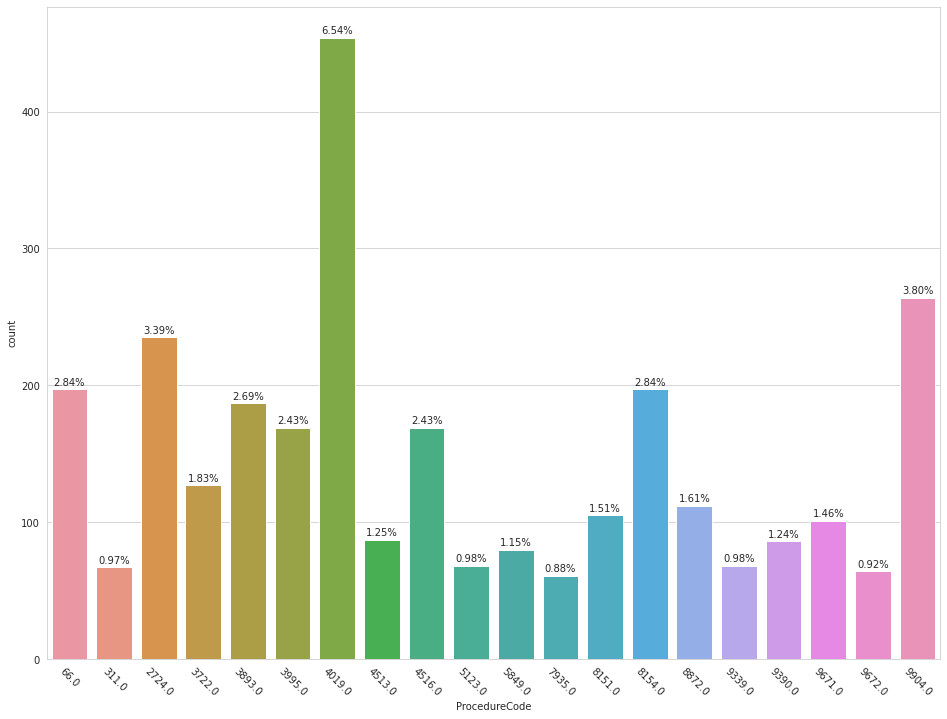

In [82]:
top_20_claim_procedure = ClmProcedureCode_IP_df["ProcedureCode"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="ProcedureCode", data=ClmProcedureCode_IP_df[ClmProcedureCode_IP_df["ProcedureCode"].isin(top_20_claim_procedure.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(ClmProcedureCode_IP_df)*100),
            ha="center")
plt.show()

In [209]:
Train_inpatient_data.shape


(40474, 41)

In [210]:
Test_inpatient_data.shape

(9551, 41)

# **OBSERVATION**

##**1. PROCEDURE CODE 4019,3722,2724,66,9904 HAS DONE MOST OF PATIENT**

##**2.CODE WITH 4019 WAS PERFORMED ON ALMOST ON 7% PATIENT WITH HIGHEST**

In [211]:
Train_inpatient_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month'],
      dtype='object')

In [212]:
print('The Total inscrehimburseamount is : ',Train_inpatient_data['InscClaimAmtReimbursed'].sum() )


The Total inscrehimburseamount is :  408297020


In [213]:
print('The Total inscrehimburseamount is : ',Test_inpatient_data['InscClaimAmtReimbursed'].sum() )


The Total inscrehimburseamount is :  96515780


# **PLOTTING THE DISPLOT TO ANALYZE THE TOTAL INSCREHIMBURSEAMUNT COLUMN**

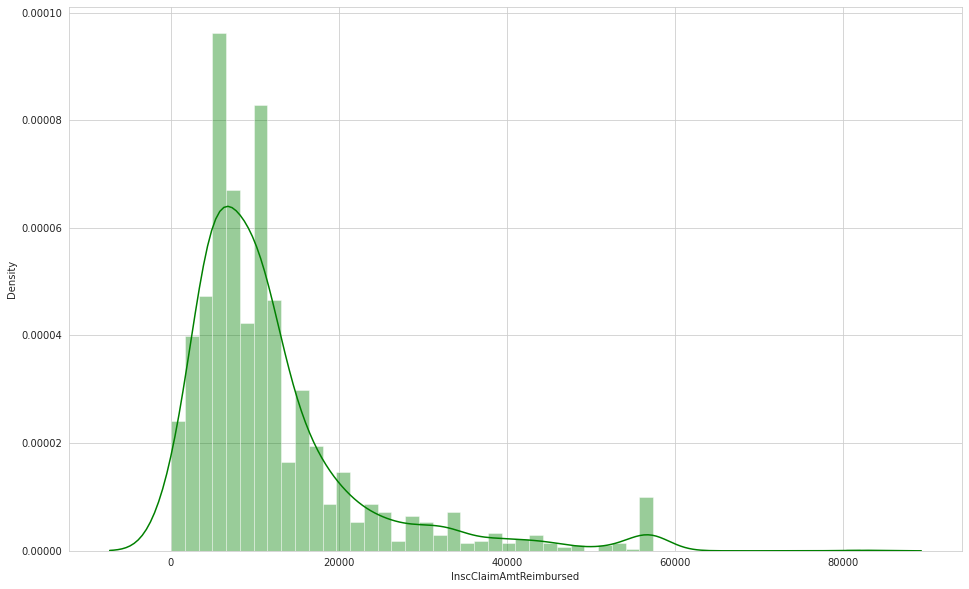

In [88]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.distplot(Train_inpatient_data["InscClaimAmtReimbursed"], color="g",kde =True , label="feature1")

# **PLOTTING THE DISPLOT TO ANALYZE THE TOTAL INSCREHIMBURSEAMUNT COLUMN**

In [214]:
print('The Total DeductibleAmtPaid is : ',Train_inpatient_data['DeductibleAmtPaid'].sum() )


The Total DeductibleAmtPaid is :  42266100.0


In [215]:
print('The Total DeductibleAmtPaid is : ',Test_inpatient_data['DeductibleAmtPaid'].sum() )


The Total DeductibleAmtPaid is :  9991140.0


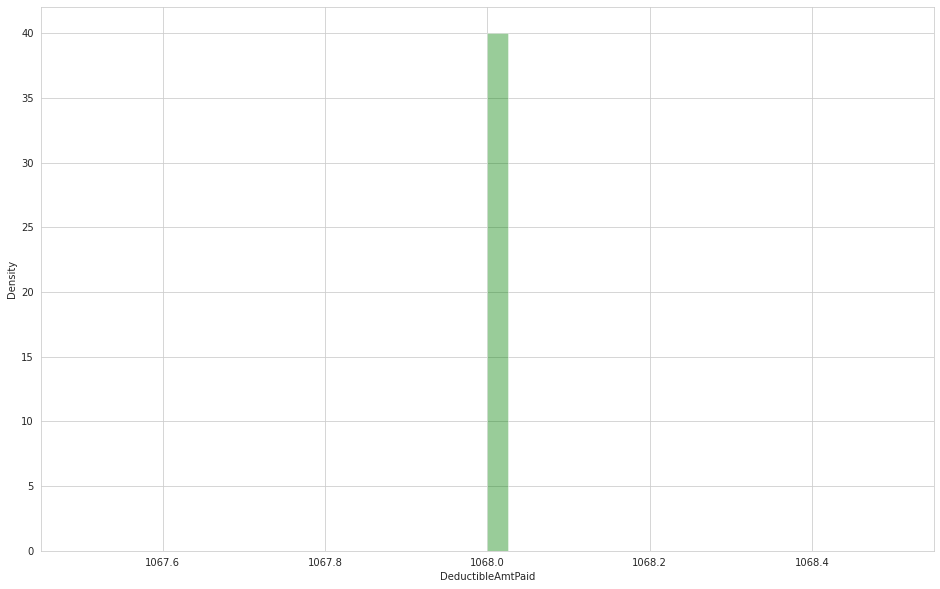

In [91]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.distplot(Train_inpatient_data["DeductibleAmtPaid"], color="g",kde =True , label="feature1")

In [217]:
Train_outpatient_data.shape


(517737, 27)

# **NOW WILL ANALYZE THE OUTPATIENT DATA**

# **now will analyse the beneid columns with countplot**

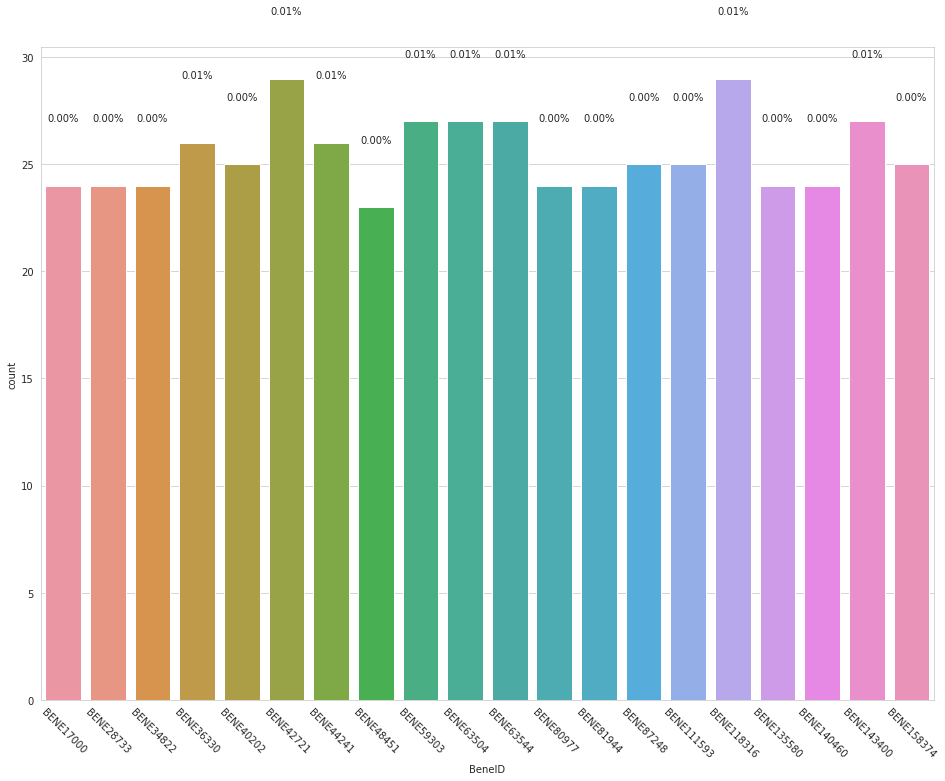

In [93]:
top_20_diagnosis = Train_outpatient_data["BeneID"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="BeneID", data=Train_outpatient_data[Train_outpatient_data["BeneID"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_outpatient_data)*100),
            ha="center")
plt.show()

# **now will analyse the provider  columns with countplot**




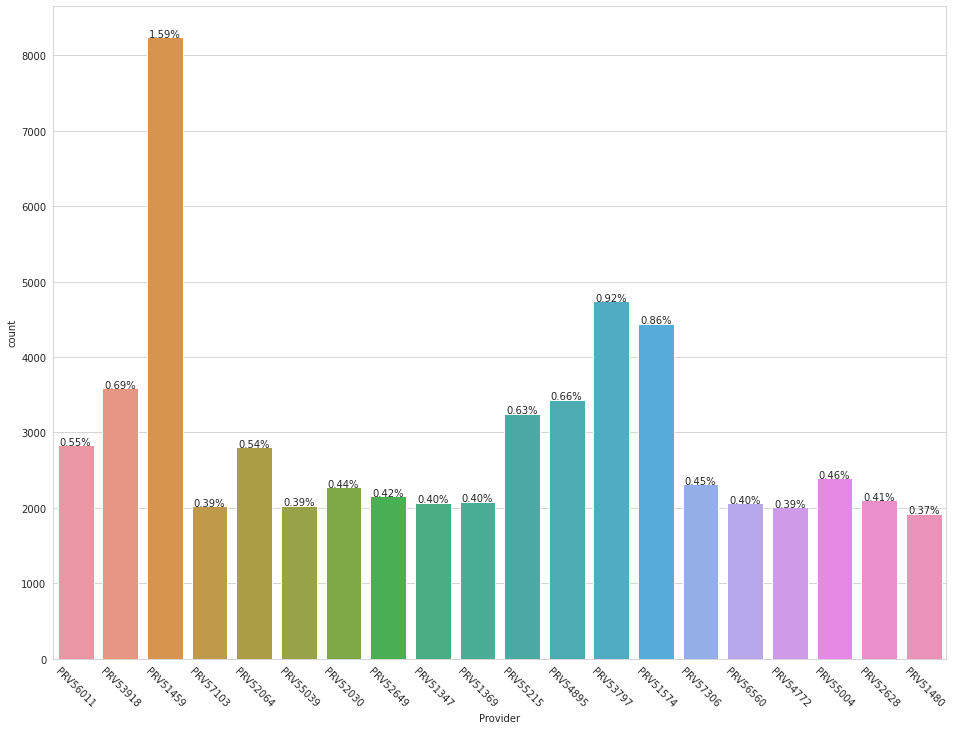

In [94]:
top_20_diagnosis = Train_outpatient_data["Provider"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="Provider", data=Train_outpatient_data[Train_outpatient_data["Provider"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_outpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. FROM THE ABOVE PLOT DITRIBUTION WE CAN CONCLUDE THAT PROVIDER WITH HAVE ID PRV51459,PRV51574,PRV53797,PRV54895,PRV55215**

##**2. PROVIDER WITH ID PRV51459 HAS SUBMITTED HIGHEST NUMBER OF CLAIMS ALMOST 1.59% OF THE TOTAL CLAIMS**

##**3. I THINK THAT SEEMS TO BE SUSPICIOUS**

# **now will analyse the AttendingPhysician:  columns with countplot**

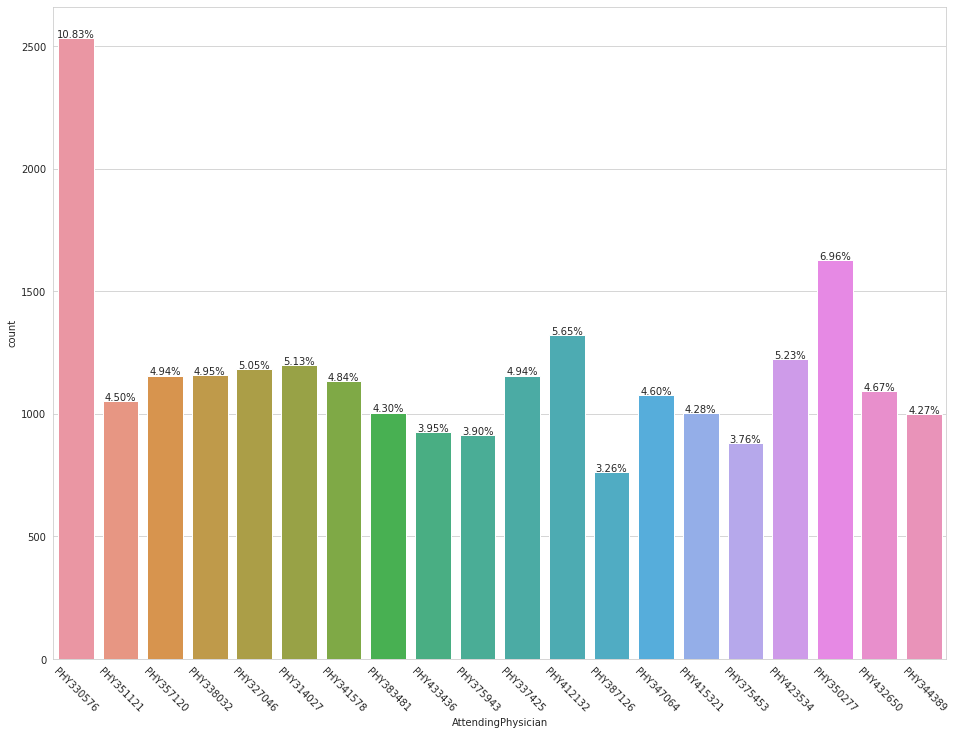

In [95]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

top_20_diagnosis = Train_outpatient_data["AttendingPhysician"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="AttendingPhysician", data=Train_outpatient_data[Train_outpatient_data["AttendingPhysician"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/top_20_diagnosis.sum()*100),
            ha="center")

# **OBSERVATION**
##**WE CAN OBSERVE THAT PHYSICIAN WITH ID PHY330576,PHY350277,PHY412132,PHY337425,PHY423534 HAS ATTEND MOST NUMBER OF PATIENT**

##**FROM ALL THE ATTENDING PHYSICIAN THESE TOP 5 PHYSICIAN HAS ALMOST ATTEND APPROXIMATE 5% OF TOTAL PATIENTS**

##**THE RESEAON SOME PHYSICIAN ARE ALSO INVOLVED IN FRAUD ACTIVITY SO MOST NUMBER OF PATIENT ATTEND BY ANY PARTICULAR PHYSICIAN IS ALSO SUSPPICIOUS**

# **now will analyse the OperatingPhysician  columns with countplot**

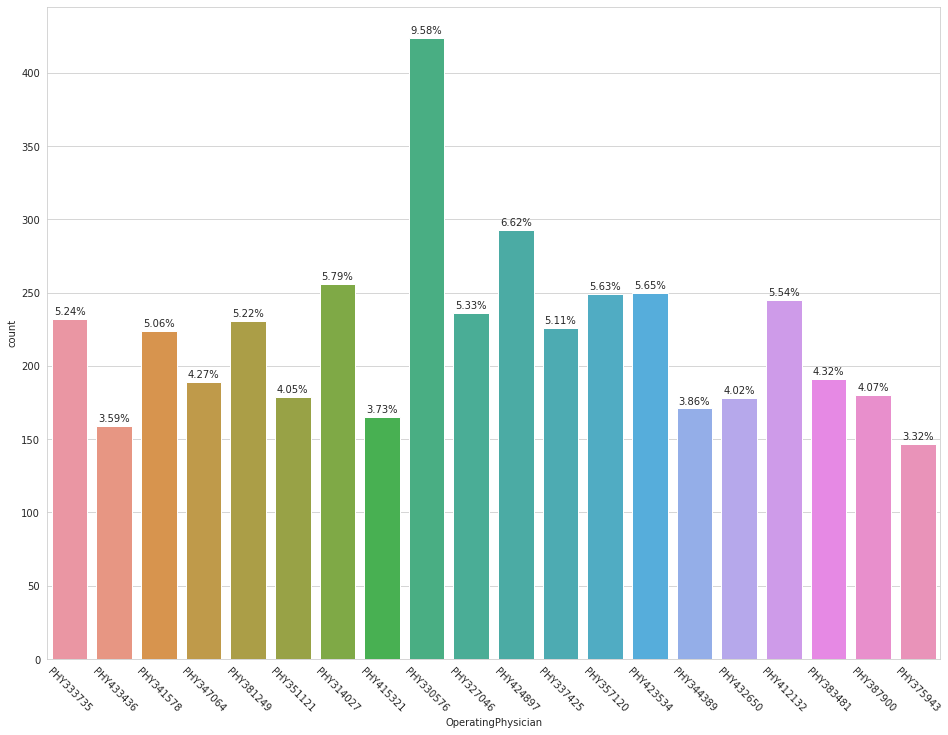

In [96]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

top_20_diagnosis = Train_outpatient_data["OperatingPhysician"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="OperatingPhysician", data=Train_outpatient_data[Train_outpatient_data["OperatingPhysician"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/top_20_diagnosis.sum()*100),
            ha="center")

# **now will analyse the OtherPhysician  columns with countplot**

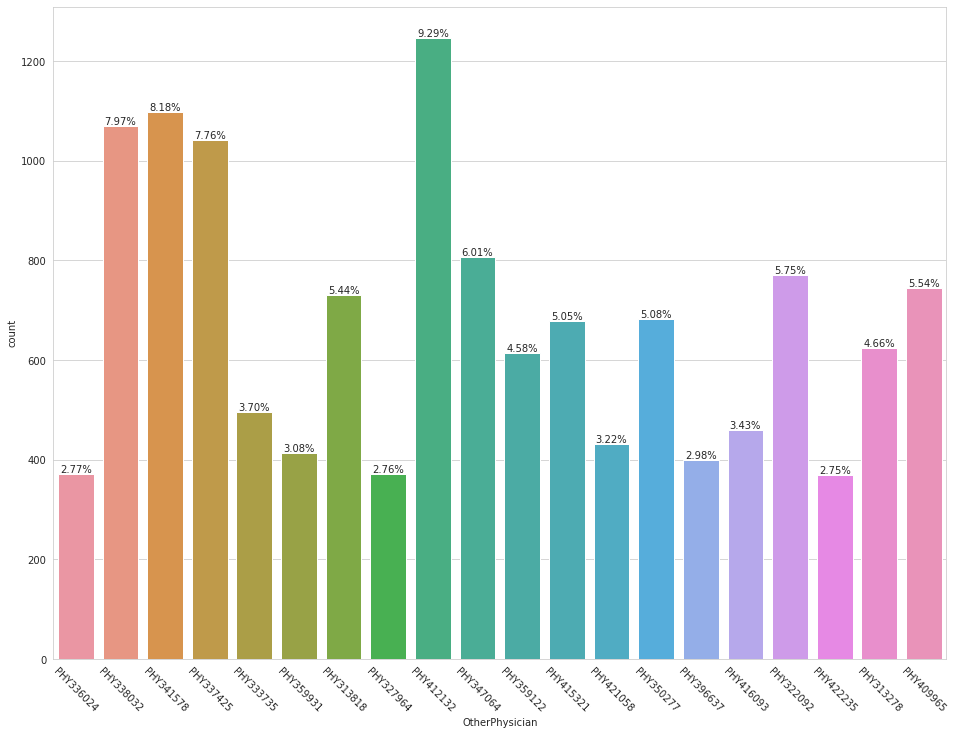

In [97]:
top_20_diagnosis = Train_outpatient_data["OtherPhysician"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="OtherPhysician", data=Train_outpatient_data[Train_outpatient_data["OtherPhysician"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/top_20_diagnosis.sum()*100),
            ha="center")

In [218]:
Train_outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [219]:
Test_outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


# **now same like inaptient data here also we hav to convert the claim start date and end date colum from string to datetime using pd.to_datetime**

In [220]:
# reference : https://pandasguide.readthedocs.io/en/latest/Pandas/timeseries.html

# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_outpatient_data['ClaimStartDt'] = pd.to_datetime(Train_outpatient_data['ClaimStartDt'] , format = '%Y-%m-%d')
Train_outpatient_data['ClaimEndDt'] = pd.to_datetime(Train_outpatient_data['ClaimEndDt'],format = '%Y-%m-%d')

Test_outpatient_data['ClaimStartDt'] = pd.to_datetime(Test_outpatient_data['ClaimStartDt'] , format = '%Y-%m-%d')
Test_outpatient_data['ClaimEndDt'] = pd.to_datetime(Test_outpatient_data['ClaimEndDt'],format = '%Y-%m-%d')

# **now we will create the new column claim start year and claim start month to analyze the claim period**

In [221]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
Train_outpatient_data['ClaimStart_Year'] = Train_outpatient_data['ClaimStartDt'].dt.year
Train_outpatient_data['ClaimStart_Month'] = Train_outpatient_data['ClaimStartDt'].dt.month
Test_outpatient_data['ClaimStart_Year'] = Test_outpatient_data['ClaimStartDt'].dt.year
Test_outpatient_data['ClaimStart_Month'] = Test_outpatient_data['ClaimStartDt'].dt.month

Train_outpatient_data['ClaimEnd_Year'] = Train_outpatient_data['ClaimEndDt'].dt.year
Train_outpatient_data['ClaimEnd_Month'] = Train_outpatient_data['ClaimEndDt'].dt.month
Test_outpatient_data['ClaimEnd_Year'] = Test_outpatient_data['ClaimEndDt'].dt.year
Test_outpatient_data['ClaimEnd_Month'] = Test_outpatient_data['ClaimEndDt'].dt.month

# **now we will create the new column claim period to knowthat how much does it take to rehimburse the patient claims by substracting the claim start date and claim end date**

In [222]:
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_outpatient_data['Claim_Period'] = ((Train_outpatient_data['ClaimEndDt'] - Train_outpatient_data['ClaimStartDt']).dt.days)+1

Test_outpatient_data['Claim_Period'] = ((Test_outpatient_data['ClaimEndDt'] - Test_outpatient_data['ClaimStartDt']).dt.days)+1

In [223]:
Train_outpatient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Claim_Period
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,0,56409,2009,10,2009,10,1
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,0,79380,2009,2,2009,2,1
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,0,NaN,2009,6,2009,6,1
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,0,NaN,2009,1,2009,1,1
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,0,71947,2009,1,2009,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,0,NaN,2009,8,2009,8,1
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,0,NaN,2009,8,2009,8,1
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,0,NaN,2009,9,2009,9,1
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,0,NaN,2009,10,2009,10,1


# **plotting the distribution for claim start year**

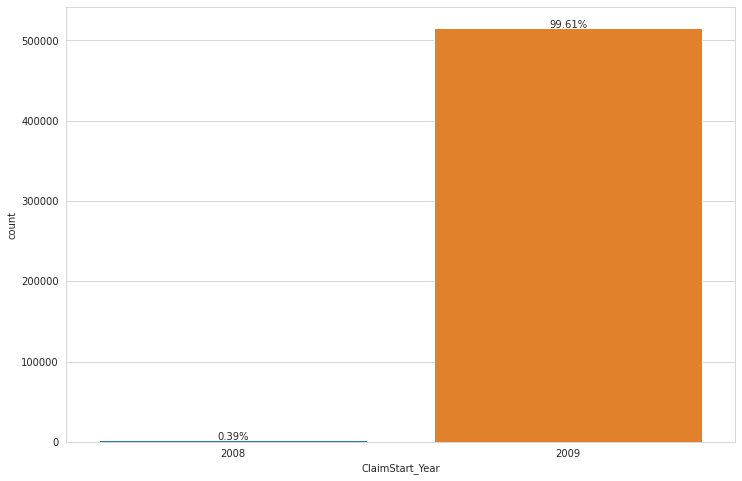

In [104]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

plt.figure(figsize=(12,8))
ax = sns.countplot(x="ClaimStart_Year", data=Train_outpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_outpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**AS WE CAN SEE THAT ALMOST ALL THE CLAIMS ARE STARTED IN YEAR 2009**

##**SO WE CAN CONCLUDE THAT THIS DATA TAKEN FROM 2009**

# **plotting the countplot ditribution for start month column**

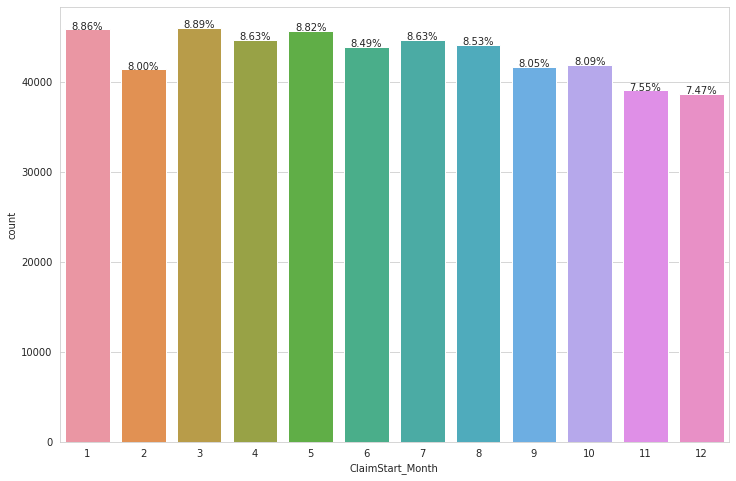

In [105]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="ClaimStart_Month", data=Train_outpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_outpatient_data)*100),
            ha="center")
plt.show()

# **plotting the countplot distribution for end year column**

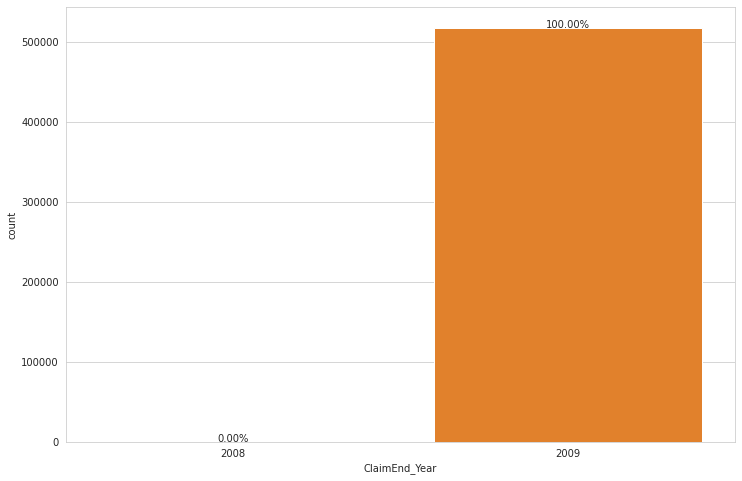

In [106]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="ClaimEnd_Year", data=Train_outpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_outpatient_data)*100),
            ha="center")
plt.show()

# **plotting the countplot distribution for end month column**

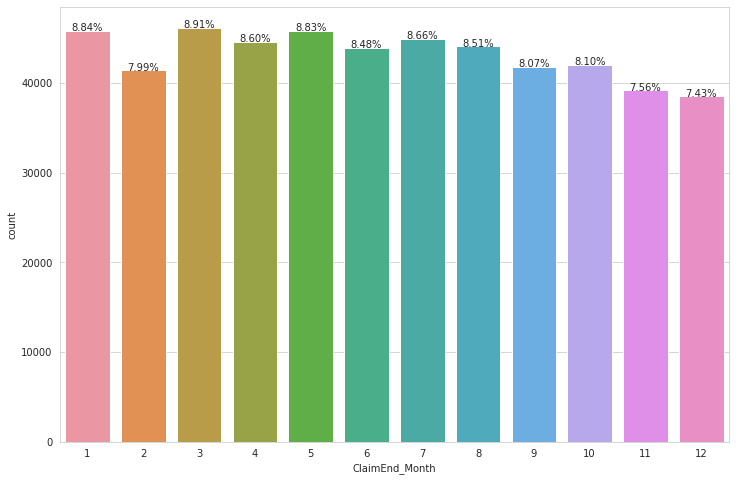

In [107]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="ClaimEnd_Month", data=Train_outpatient_data)

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_outpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. THERE IS NOT MUCH DITRIBUTION IN CLAIM END MONTH COLUMN ALMOST EQUALLY DISTRIBUTED**

# **plotting the countplot distirbution for claim period column**

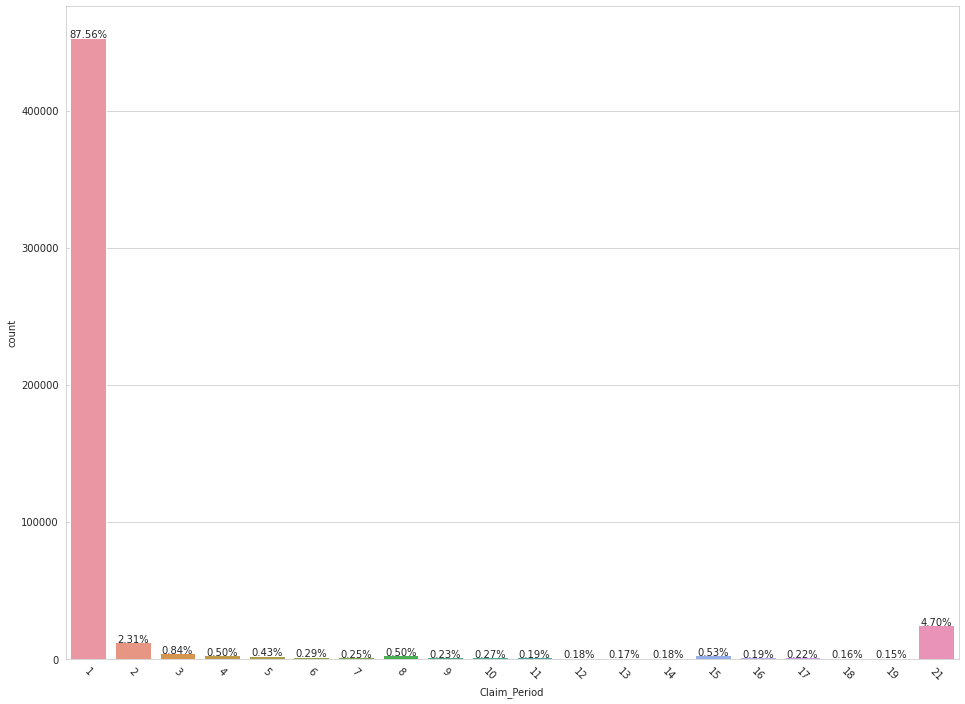

In [108]:
top_20_diagnosis = Train_outpatient_data["Claim_Period"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="Claim_Period", data=Train_outpatient_data[Train_outpatient_data["Claim_Period"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_outpatient_data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. MOST OF CLAIM PERIOD WAS WITHIN 1 DAY SINCE IT IT OUTPATIENT DATASET SO PATIENT WAS NOT ADMITTED SO THIS IS REASON THAT FOR 87% PATIENT CLAIM PERIOD IS 1 DAY**

In [224]:
Train_outpatient_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period'],
      dtype='object')

# **now will concate the patient dognosis column to check the what is chances of dignosis to patient**

In [225]:
ClmDiagnosisCode_df_outpatient = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df_outpatient['DiagnosisCode'] = pd.concat([Train_outpatient_data["ClmDiagnosisCode_1"], 
                                           Train_outpatient_data["ClmDiagnosisCode_2"], 
                                           Train_outpatient_data["ClmDiagnosisCode_3"], 
                                           Train_outpatient_data["ClmDiagnosisCode_4"],
                                           Train_outpatient_data["ClmDiagnosisCode_5"], 
                                           Train_outpatient_data["ClmDiagnosisCode_6"],
                                           Train_outpatient_data["ClmDiagnosisCode_7"],
                                           Train_outpatient_data["ClmDiagnosisCode_8"],
                                           Train_outpatient_data["ClmDiagnosisCode_9"],
                                           Train_outpatient_data["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [226]:
ClmDiagnosisCode_df_outpatient = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df_outpatient['DiagnosisCode'] = pd.concat([Test_outpatient_data["ClmDiagnosisCode_1"], 
                                           Test_outpatient_data["ClmDiagnosisCode_2"], 
                                           Test_outpatient_data["ClmDiagnosisCode_3"], 
                                           Test_outpatient_data["ClmDiagnosisCode_4"],
                                           Test_outpatient_data["ClmDiagnosisCode_5"], 
                                           Test_outpatient_data["ClmDiagnosisCode_6"],
                                           Test_outpatient_data["ClmDiagnosisCode_7"],
                                           Test_outpatient_data["ClmDiagnosisCode_8"],
                                           Test_outpatient_data["ClmDiagnosisCode_9"],
                                           Test_outpatient_data["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

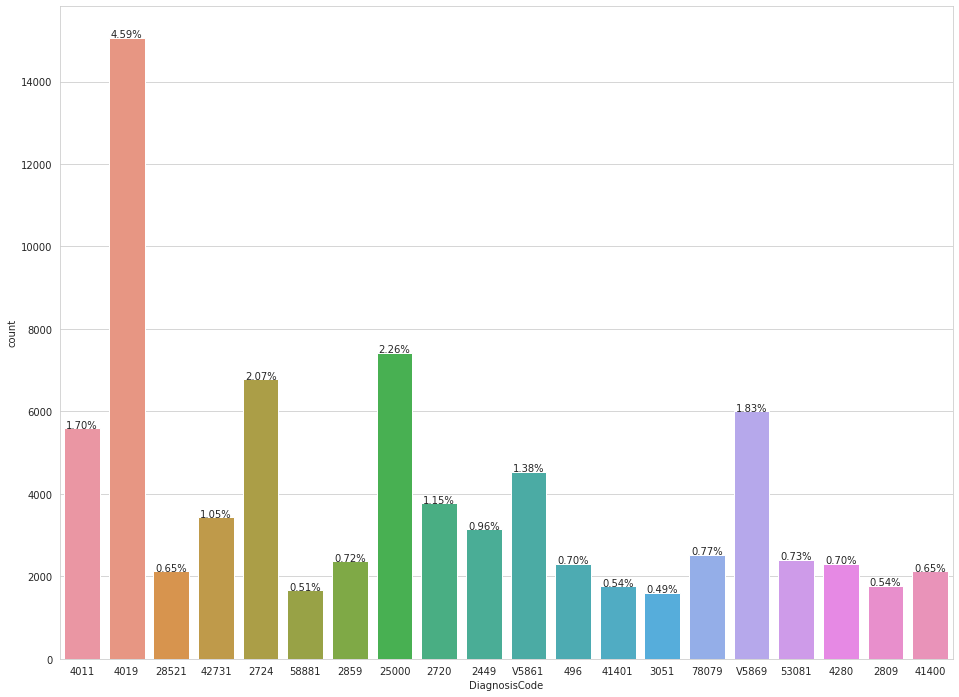

In [112]:
top_20_diagnosis = ClmDiagnosisCode_df_outpatient["DiagnosisCode"].value_counts().head(20)
plt.figure(figsize=(16,12))
ax = sns.countplot(x="DiagnosisCode", data=ClmDiagnosisCode_df_outpatient[ClmDiagnosisCode_df_outpatient["DiagnosisCode"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(ClmDiagnosisCode_df_outpatient)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1.DIGNOSIS_CODE 4019,25000,V5869,2724 HAS PERFORMED ON MAXIMUM NUMBER OF PATIENT**


##**2 DIGNOSIS CODE 4019 HAS PERFORM FOR HIGHEST NUMBER OF TIMES ALMOST 5%**

In [228]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([Train_outpatient_data["ClmProcedureCode_1"], 
                                   Train_outpatient_data["ClmProcedureCode_2"],
                                   Train_outpatient_data["ClmProcedureCode_3"],
                                   Train_outpatient_data["ClmProcedureCode_4"], 
                                   Train_outpatient_data["ClmProcedureCode_5"], 
                                   Train_outpatient_data["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [229]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([Test_outpatient_data["ClmProcedureCode_1"], 
                                   Test_outpatient_data["ClmProcedureCode_2"],
                                   Test_outpatient_data["ClmProcedureCode_3"],
                                   Test_outpatient_data["ClmProcedureCode_4"], 
                                   Test_outpatient_data["ClmProcedureCode_5"], 
                                   Test_outpatient_data["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

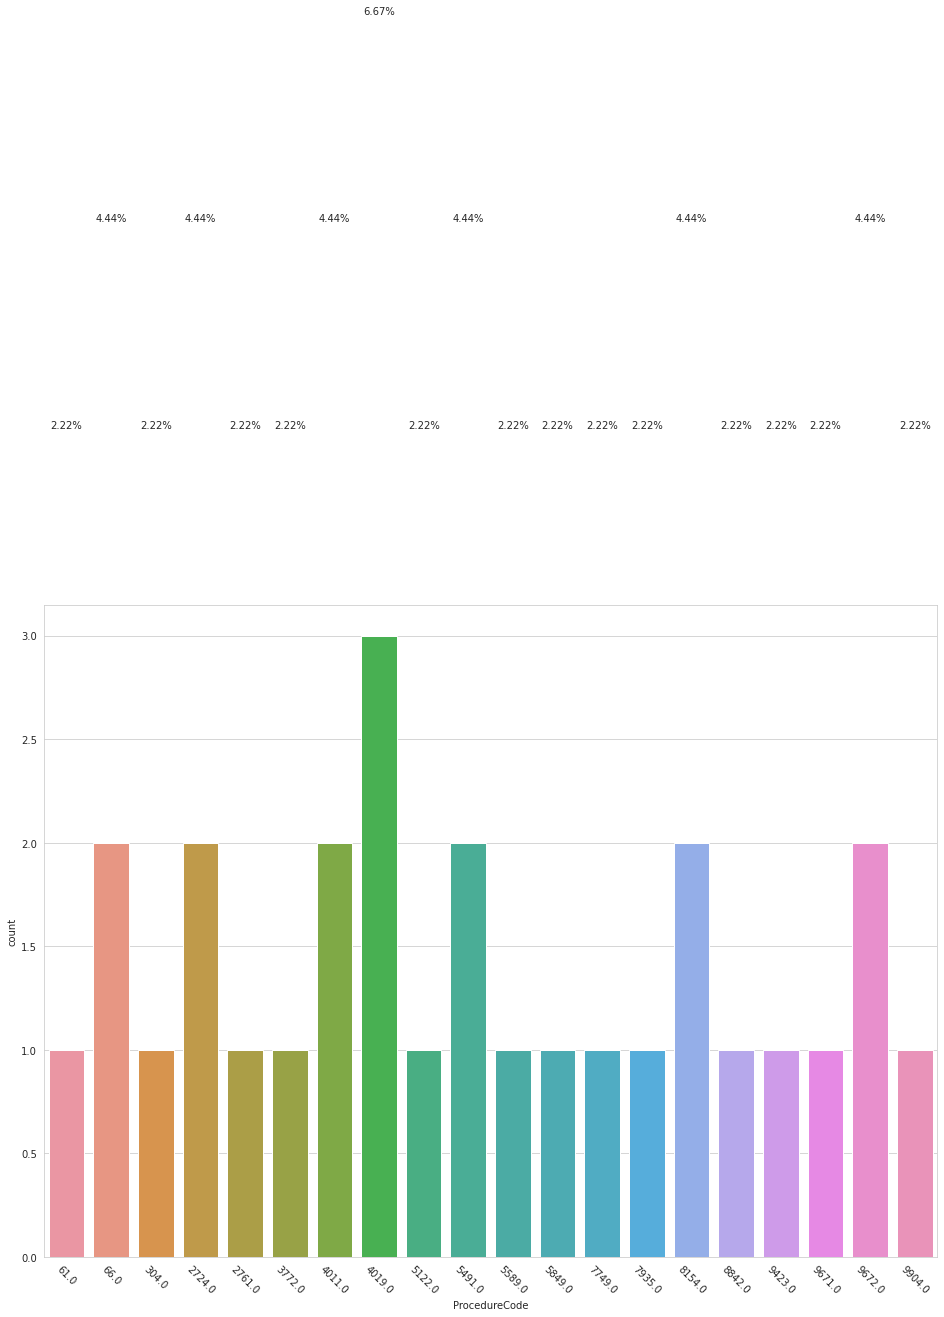

In [115]:
top_20_claim_procedure = ClmProcedureCode_OP_df["ProcedureCode"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="ProcedureCode", data=ClmProcedureCode_OP_df[ClmProcedureCode_OP_df["ProcedureCode"].isin(top_20_claim_procedure.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(ClmProcedureCode_OP_df)*100),
            ha="center")
plt.show()

In [230]:
Train_outpatient_data.shape

(517737, 32)

# **NOW WE ARE PLOTTING THE PLOT FOR InscClaimAmtReimbursed COLUMN USING DISTPLOT**

In [231]:
print('The total inscclaimamtreimbursed is : ', Train_outpatient_data["InscClaimAmtReimbursed"].sum())


The total inscclaimamtreimbursed is :  148246120


In [232]:
print('The total inscclaimamtreimbursed is : ', Test_outpatient_data["InscClaimAmtReimbursed"].sum())


The total inscclaimamtreimbursed is :  36345460


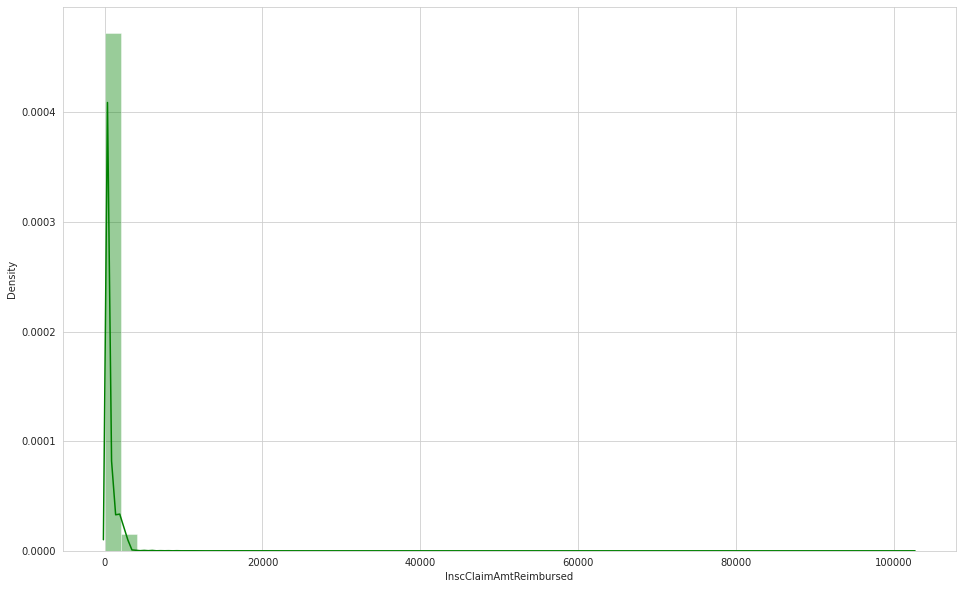

In [119]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.distplot(Train_outpatient_data["InscClaimAmtReimbursed"], color="g",kde =True , label="feature1")

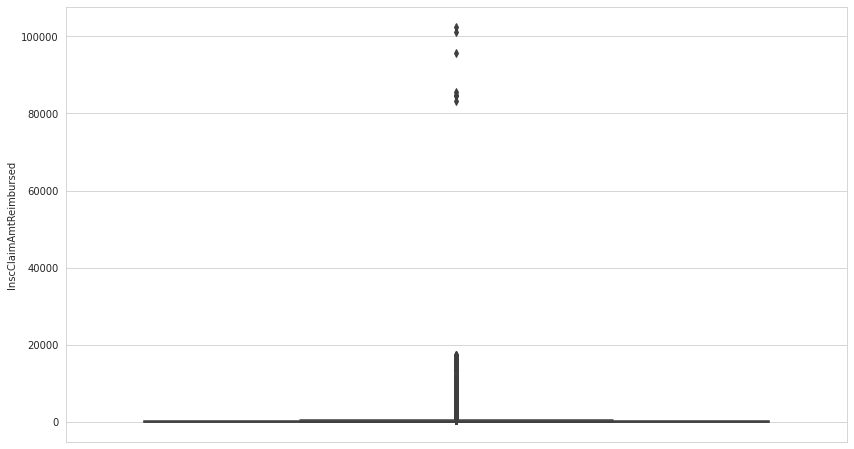

In [120]:
plt.figure(figsize=(14,8))
sns.boxplot(y=Train_outpatient_data["InscClaimAmtReimbursed"])

# **NOW WE ARE PLOTTING THE PLOT FOR DeductibleAmtPaid COLUMN USING DISTPLOT**

In [233]:
print('The total DeductibleAmtPaid is : ', Train_outpatient_data["DeductibleAmtPaid"].sum())


The total DeductibleAmtPaid is :  1438912


In [234]:
print('The total DeductibleAmtPaid is : ', Test_outpatient_data["DeductibleAmtPaid"].sum())


The total DeductibleAmtPaid is :  351245


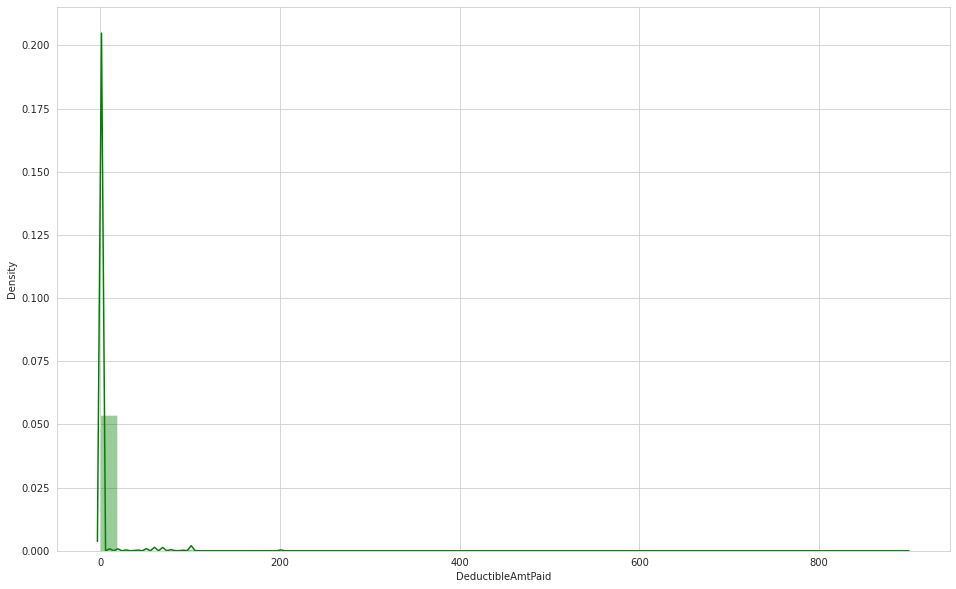

In [123]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.distplot(Train_outpatient_data["DeductibleAmtPaid"], color="g",kde =True , label="feature1")

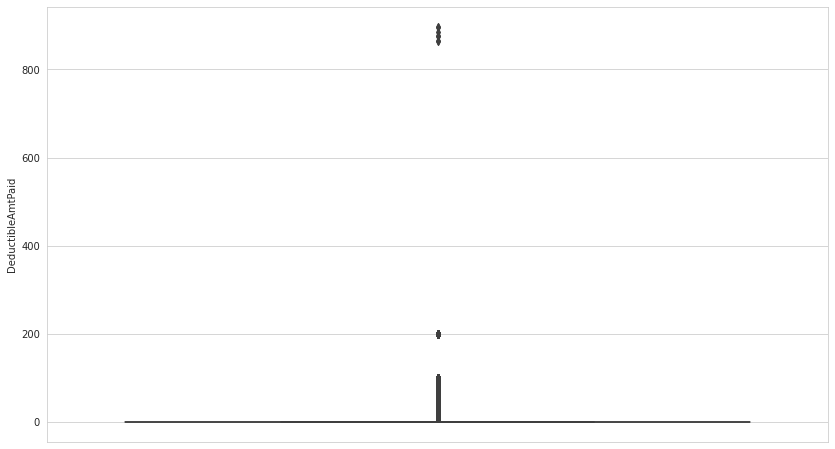

In [124]:
plt.figure(figsize=(14,8))
sns.boxplot(y=Train_outpatient_data["DeductibleAmtPaid"])

# **computing patient risk score by adding all the types of choronic deasease to check the patient risk score**

In [125]:
#Train_inpatient_data = pd.read_csv('/content/Train_Inpatientdata-1542865627584.csv')

In [235]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
Train_inpatient_data['Inpatient_or_Outpatient'] = 1
Train_outpatient_data['Inpatient_or_Outpatient'] = 0
Train_inpatient_data['Inpatient_or_Outpatient'] = 1
Train_outpatient_data['Inpatient_or_Outpatient'] = 0

In [236]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
Test_inpatient_data['Inpatient_or_Outpatient'] = 1
Test_outpatient_data['Inpatient_or_Outpatient'] = 0
Test_inpatient_data['Inpatient_or_Outpatient'] = 1
Test_outpatient_data['Inpatient_or_Outpatient'] = 0

In [237]:
Train_outpatient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Claim_Period,Inpatient_or_Outpatient
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,0,56409,2009,10,2009,10,1,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,0,79380,2009,2,2009,2,1,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,0,NaN,2009,6,2009,6,1,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,0,NaN,2009,1,2009,1,1,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,0,71947,2009,1,2009,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,0,NaN,2009,8,2009,8,1,0
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,0,NaN,2009,8,2009,8,1,0
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,0,NaN,2009,9,2009,9,1,0
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,0,NaN,2009,10,2009,10,1,0


In [238]:
# reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in Train_outpatient_data.columns if idx in Train_inpatient_data.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(Train_inpatient_data, Train_outpatient_data, left_on = common_columns, right_on = common_columns,how = 'outer')

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period', 'Inpatient_or_Outpatient']


In [239]:
Test_beneficiary_data.shape

(63968, 29)

In [240]:
# reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html


# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, Train_beneficiary_data,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge provider details
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, Train_data , how = 'inner', on = 'Provider' )

In [370]:
# reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

# Merge inpatient and outpatient dataframes based on common columns

common_columns_test = [ idx for idx in Test_outpatient_data.columns if idx in Test_inpatient_data.columns]
Inpatient_Outpatient_Merge_Test = pd.merge(Test_inpatient_data, Test_outpatient_data, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Test = pd.merge(Inpatient_Outpatient_Merge_Test, Test_beneficiary_data,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Test, Test_data , how = 'inner', on = 'Provider' )

#**FINAL TRAIN DATA SHAPE**

In [242]:
Final_Dataset_Test.shape

(135392, 70)

In [243]:
Final_Dataset_Train.shape

(558211, 71)

#**FINAL TEST DATA SHAPE**

In [244]:
Final_Dataset_Test.shape

(135392, 70)

In [246]:
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_number_of_inpatient_claims  

40474

In [247]:
Total_number_of_inpatient_claims = Final_Dataset_Test.InscClaimAmtReimbursed[(Final_Dataset_Test.Inpatient_or_Outpatient == 1)].count()
Total_number_of_inpatient_claims  

9551

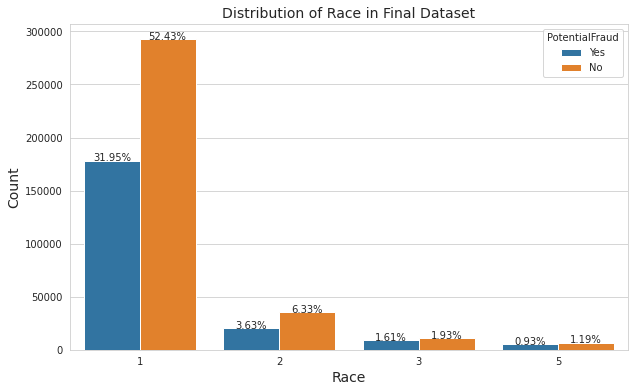

In [248]:
# Distribution of race in Inpatient Data
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Final Dataset', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race', size = 14)
plt.ylabel('Count', size = 14)
for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Final_Dataset_Train)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. WE CAN SEE THAT IN RACE 1 THEIR IS HIGHEST NUMBER OF FRAUD HAPPENED**

##**2. IN RACE 3 AND 4 LESS NUMBER OF FRAUD CLAIMS**

##**3. RACE IS EXTREMELY IMPORTANT FOR TO DETECT FRAUD TRANSACTION IN DATASET**

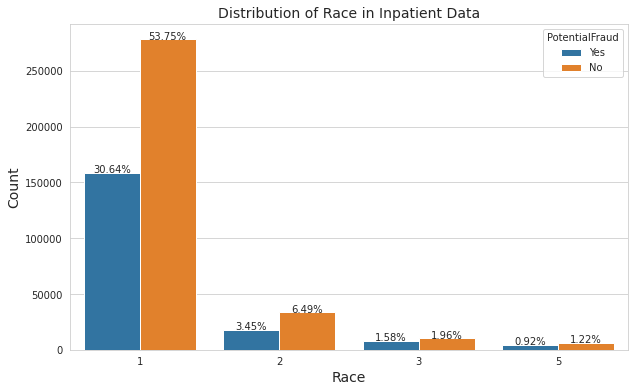

In [249]:
# Distribution of race in Inpatient Data
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 0]
order = Data.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Inpatient Data', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race', size = 14)
plt.ylabel('Count', size = 14)
for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Data)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. WE CAN OBSERVE FROM ABOVE PLOT THAT IN RACE THERE IS HIGHER NUMBER OF FRAUDLENT ACTIVITY**

##**2. RACE 5 HAS LESS NUMBER OF FRAUD AND NON FRAUD BECAUSE OF LESS NUMBER OF PEOPLE IN RACE 5**

##**3. SO RACE 1 IS A PART TO WATCH OUT FOR INVESTIGATION**

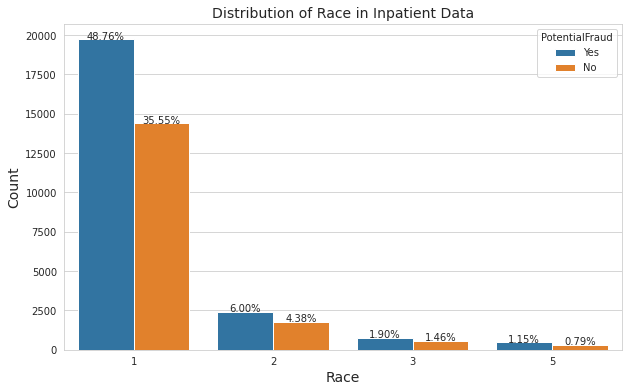

In [250]:
# Distribution of race in Inpatient Data
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 1]
order = Data.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Inpatient Data', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race', size = 14)
plt.ylabel('Count', size = 14)
for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Data)*100),
            ha="center")
plt.show()

In [251]:
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_number_of_inpatient_claims  

40474

# **now weare going to analyze the claim dignosis after merging all the dataset**

In [252]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

# *first we need to merge all the dinosis and make them in 1 and then analyze for better analysis*


In [253]:
ClmDiagnosisCode_df_outpatient = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df_outpatient['DiagnosisCode'] = pd.concat([Final_Dataset_Train["ClmDiagnosisCode_1"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_2"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_3"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_4"],
                                           Final_Dataset_Train["ClmDiagnosisCode_5"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_6"],
                                           Final_Dataset_Train["ClmDiagnosisCode_7"],
                                           Final_Dataset_Train["ClmDiagnosisCode_8"],
                                           Final_Dataset_Train["ClmDiagnosisCode_9"],
                                           Final_Dataset_Train["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [254]:
ClmDiagnosisCode_df_outpatient_test = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df_outpatient_test['DiagnosisCode'] = pd.concat([Final_Dataset_Test["ClmDiagnosisCode_1"], 
                                           Final_Dataset_Test["ClmDiagnosisCode_2"], 
                                           Final_Dataset_Test["ClmDiagnosisCode_3"], 
                                           Final_Dataset_Test["ClmDiagnosisCode_4"],
                                           Final_Dataset_Test["ClmDiagnosisCode_5"], 
                                           Final_Dataset_Test["ClmDiagnosisCode_6"],
                                           Final_Dataset_Test["ClmDiagnosisCode_7"],
                                           Final_Dataset_Test["ClmDiagnosisCode_8"],
                                           Final_Dataset_Test["ClmDiagnosisCode_9"],
                                           Final_Dataset_Test["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

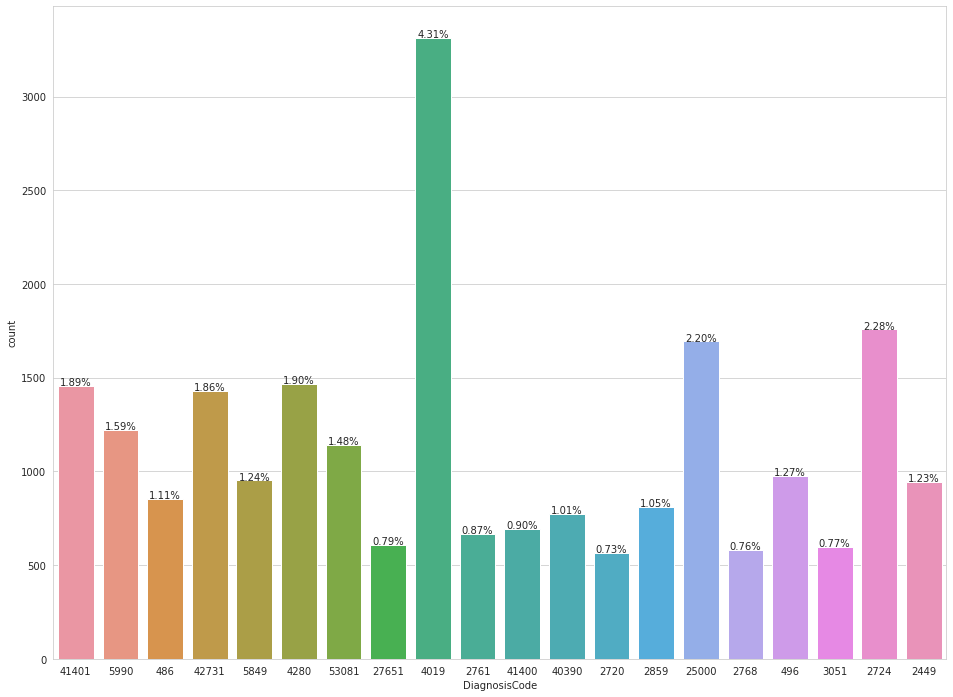

In [255]:
top_20_diagnosis = ClmDiagnosisCode_IP_df["DiagnosisCode"].value_counts().head(20)
plt.figure(figsize=(16,12))
ax = sns.countplot(x="DiagnosisCode", data=ClmDiagnosisCode_IP_df[ClmDiagnosisCode_IP_df["DiagnosisCode"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(ClmDiagnosisCode_IP_df)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**WHEN WE HAVE MERGE THE ALL THE DIGNOSIS CODE TO ANALYZE STILL WE CAN SEE THAT MOST OF PAITNET GOT AFFECTED BY DIGNOSIS 4019 ALMOST 5%**

# **now we will going to merge all the procedure and check which procedure happened most in all the dataset**


In [256]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([Final_Dataset_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [257]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df_test = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df_test['ProcedureCode'] = pd.concat([Final_Dataset_Test["ClmProcedureCode_1"], 
                                   Final_Dataset_Test["ClmProcedureCode_2"],
                                   Final_Dataset_Test["ClmProcedureCode_3"],
                                   Final_Dataset_Test["ClmProcedureCode_4"], 
                                   Final_Dataset_Test["ClmProcedureCode_5"], 
                                   Final_Dataset_Test["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

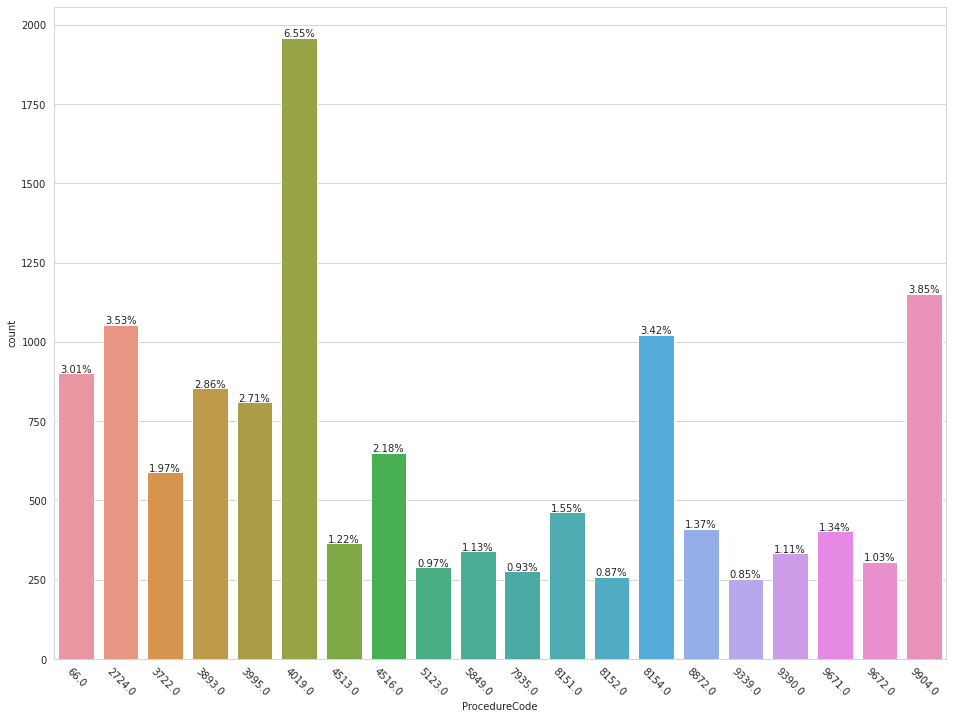

In [258]:
top_20_claim_procedure = ClmProcedureCode_IP_df["ProcedureCode"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="ProcedureCode", data=ClmProcedureCode_IP_df[ClmProcedureCode_IP_df["ProcedureCode"].isin(top_20_claim_procedure.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(ClmProcedureCode_IP_df)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. FROM THE ABOVE PLOT WE CAN OBSERVE that procedure code with 4019,9904,8154,2724,66 has performed on most patient**

##**2. procedure code 4019 has performed on most patient almost 7%**



# **now will check the which of the procedure happened in fraud claim only**

In [259]:
Final_Dataset_Fraud_Train = Final_Dataset_Train[Final_Dataset_Train.PotentialFraud == 'Yes']
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df_2 = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df_2['ProcedureCode'] = pd.concat([Final_Dataset_Fraud_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()


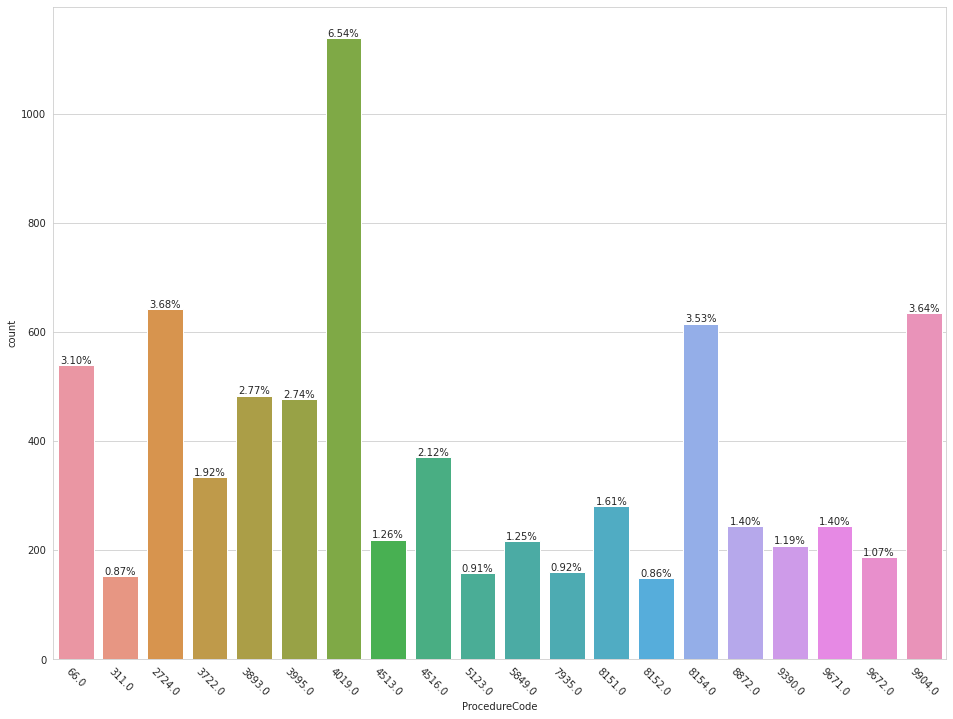

In [260]:
top_20_claim_procedure = ClmProcedureCode_IP_df_2["ProcedureCode"].value_counts().head(20)
plt.figure(figsize=(16,12))
plt.xticks(rotation=-45)
ax = sns.countplot(x="ProcedureCode", data=ClmProcedureCode_IP_df_2[ClmProcedureCode_IP_df_2["ProcedureCode"].isin(top_20_claim_procedure.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(ClmProcedureCode_IP_df_2)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. WE CAN OBSERVE FROM ABOVE PLOT THAT FROM FRAUDS CLAIMS ONLY PROCEDURE 4019 HAS PERFORMED MOST WITH 6.54% THAT IS SEEMS TO BE SUSPICIOUS**

##**2. PROCEDURE WITH CODE 4019,9904,8154,2724,66 HAS PERFORMED MOST IN FRADUS CLAIMS**

# **now we are going o check which claim dignosis involved most in fraud claim only**

In [261]:
Final_Dataset_Fraud_Train = Final_Dataset_Train[Final_Dataset_Train.PotentialFraud == 'Yes']
ClmDiagnosisCode_df_outpatient_fraud_only = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df_outpatient_fraud_only['DiagnosisCode'] = pd.concat([Final_Dataset_Train["ClmDiagnosisCode_1"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_2"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_3"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_4"],
                                           Final_Dataset_Train["ClmDiagnosisCode_5"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_6"],
                                           Final_Dataset_Train["ClmDiagnosisCode_7"],
                                           Final_Dataset_Train["ClmDiagnosisCode_8"],
                                           Final_Dataset_Train["ClmDiagnosisCode_9"],
                                           Final_Dataset_Train["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

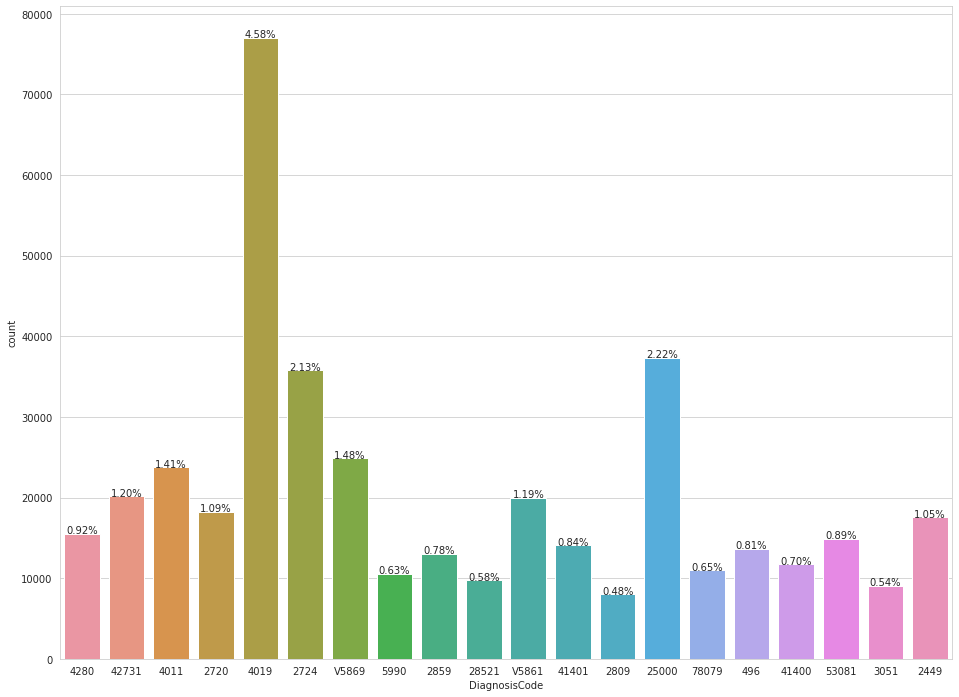

In [262]:
top_20_diagnosis = ClmDiagnosisCode_df_outpatient_fraud_only["DiagnosisCode"].value_counts().head(20)
plt.figure(figsize=(16,12))
ax = sns.countplot(x="DiagnosisCode", data=ClmDiagnosisCode_df_outpatient_fraud_only[ClmDiagnosisCode_df_outpatient_fraud_only["DiagnosisCode"].isin(top_20_diagnosis.index)])

for p in ax.patches:
    height = p.get_height()
    if height == 0 or np.isnan(height):
        continue
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(ClmDiagnosisCode_df_outpatient_fraud_only)*100),
            ha="center")
plt.show()

# **OBSERVATION**

##**1. DIGNOSIS CODE 4019 HAS INVOLED MOST IN FRAUDS CLAIM WITH 4.58%**

##**2. DIGNOSIS CODE 25000,4019,2724,v5869 HAS INVOLVED MOST IN FRAUDS CLAIMS**

In [263]:
# **now we will analyze the gender ratio distribution in final merged data 

# **now we will analyze the gender ratio distribution in final merged data**

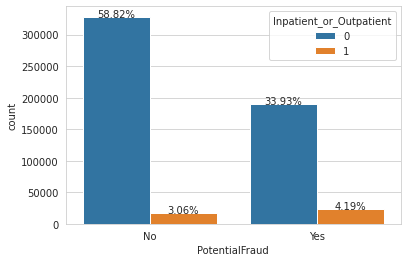

In [264]:
# reference : https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

ax = sns.countplot(x='PotentialFraud',data=Final_Dataset_Train, hue = 'Inpatient_or_Outpatient', order = Final_Dataset_Train['PotentialFraud'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Final_Dataset_Train)*100),
            ha="center")

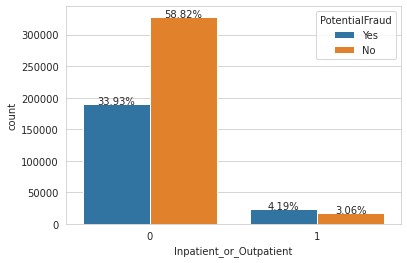

In [265]:
ax = sns.countplot(x='Inpatient_or_Outpatient',data=Final_Dataset_Train, hue = 'PotentialFraud', order = Final_Dataset_Train['Inpatient_or_Outpatient'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Final_Dataset_Train)*100),
            ha="center")

In [266]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

# **computing the patient risk score by all the types of choronic deasease to check the risk or chences of kidney problem to patient**

In [267]:

Final_Dataset_Train['patient_risk_score'] =  Final_Dataset_Train['ChronicCond_Alzheimer'] + Final_Dataset_Train['ChronicCond_Heartfailure']\
                                              + Final_Dataset_Train['ChronicCond_KidneyDisease'] + Final_Dataset_Train['ChronicCond_Cancer'] \
                                              + Final_Dataset_Train['ChronicCond_ObstrPulmonary'] + Final_Dataset_Train['ChronicCond_Depression'] \
                                              + Final_Dataset_Train['ChronicCond_Diabetes'] + Final_Dataset_Train['ChronicCond_IschemicHeart'] \
                                              + Final_Dataset_Train['ChronicCond_Osteoporasis'] + Final_Dataset_Train['ChronicCond_rheumatoidarthritis'] \
                                              + Final_Dataset_Train['ChronicCond_stroke'] + Final_Dataset_Train['RenalDiseaseIndicator']


In [268]:

Final_Dataset_Test['patient_risk_score'] =  Final_Dataset_Test['ChronicCond_Alzheimer'] + Final_Dataset_Test['ChronicCond_Heartfailure']\
                                              + Final_Dataset_Test['ChronicCond_KidneyDisease'] + Final_Dataset_Test['ChronicCond_Cancer'] \
                                              + Final_Dataset_Test['ChronicCond_ObstrPulmonary'] + Final_Dataset_Test['ChronicCond_Depression'] \
                                              + Final_Dataset_Test['ChronicCond_Diabetes'] + Final_Dataset_Test['ChronicCond_IschemicHeart'] \
                                              + Final_Dataset_Test['ChronicCond_Osteoporasis'] + Final_Dataset_Test['ChronicCond_rheumatoidarthritis'] \
                                              + Final_Dataset_Test['ChronicCond_stroke'] + Final_Dataset_Test['RenalDiseaseIndicator']

In [269]:
# Convert columns to datetime
Final_Dataset_Train['DOB'] = pd.to_datetime(Final_Dataset_Train['DOB'])
Final_Dataset_Train['DOD'] = pd.to_datetime(Final_Dataset_Train['DOD'])

#Calculate max value of date_of_death
max_date_of_death = Final_Dataset_Train['DOD'].max()

#Handle missing values in date_of_death
Final_Dataset_Train['DOD'].fillna(max_date_of_death, inplace=True)

# Subtract date of birth from date of death
Final_Dataset_Train['age_days'] = Final_Dataset_Train['DOD'] - Final_Dataset_Train['DOB']

# Divide the difference in days by 365.25 to get the difference in years
Final_Dataset_Train['age_years'] = Final_Dataset_Train['age_days'] / pd.Timedelta(days=365.25)

# Create a new column age
Final_Dataset_Train['patient_age'] = Final_Dataset_Train['age_years'].apply(lambda x: round(x,2))

In [270]:
# Convert columns to datetime
Final_Dataset_Test['DOB'] = pd.to_datetime(Final_Dataset_Test['DOB'])
Final_Dataset_Test['DOD'] = pd.to_datetime(Final_Dataset_Test['DOD'])

#Calculate max value of date_of_death
max_date_of_death = Final_Dataset_Test['DOD'].max()

#Handle missing values in date_of_death
Final_Dataset_Test['DOD'].fillna(max_date_of_death, inplace=True)

# Subtract date of birth from date of death
Final_Dataset_Test['age_days'] = Final_Dataset_Test['DOD'] - Final_Dataset_Test['DOB']

# Divide the difference in days by 365.25 to get the difference in years
Final_Dataset_Test['age_years'] = Final_Dataset_Test['age_days'] / pd.Timedelta(days=365.25)

# Create a new column age
Final_Dataset_Test['patient_age'] = Final_Dataset_Test['age_years'].apply(lambda x: round(x,2))

# **plotting the distribution for InscClaimAmtReimbursed by histogram**

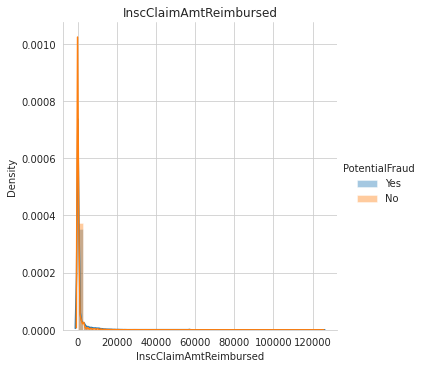

In [271]:
grid = sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", size=5)
grid.map(sns.distplot, "InscClaimAmtReimbursed")
grid.add_legend()
plt.title('InscClaimAmtReimbursed')
plt.show()

# **OBSERVATION**

##**1. MOST OF PATIENT WHO HAS INSCAMOUNTREHIMBURSED LIES LESS THAN 15000**

# **now i m plotting the box plot for InscClaimAmtReimbursed and potential_fraud**:

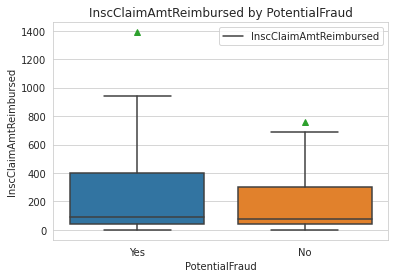

In [272]:
sns.boxplot(x = 'PotentialFraud', y ='InscClaimAmtReimbursed' , data =Final_Dataset_Train, showfliers=False, showmeans=True)
plt.title('InscClaimAmtReimbursed by PotentialFraud')
plt.xlabel('PotentialFraud')
plt.ylabel('InscClaimAmtReimbursed')
plt.legend(["InscClaimAmtReimbursed"])
plt.show()

# **OBSERVATION**

##**1.MOST OF PATIENT WHO HAS INVOLVED IN POTENTIAL FRAUD THERE MEAN IS HIGH THAN LEGISTMENT CLAIMS**

##**2. ITS  VERY VERY IMP TAKE-WAY THAT THERE IS DIFF BETWEEN MEAN BETWEEN FRAUDS AND LEGITMENT CLAIMS**

# **distplot for age feature in final train data**

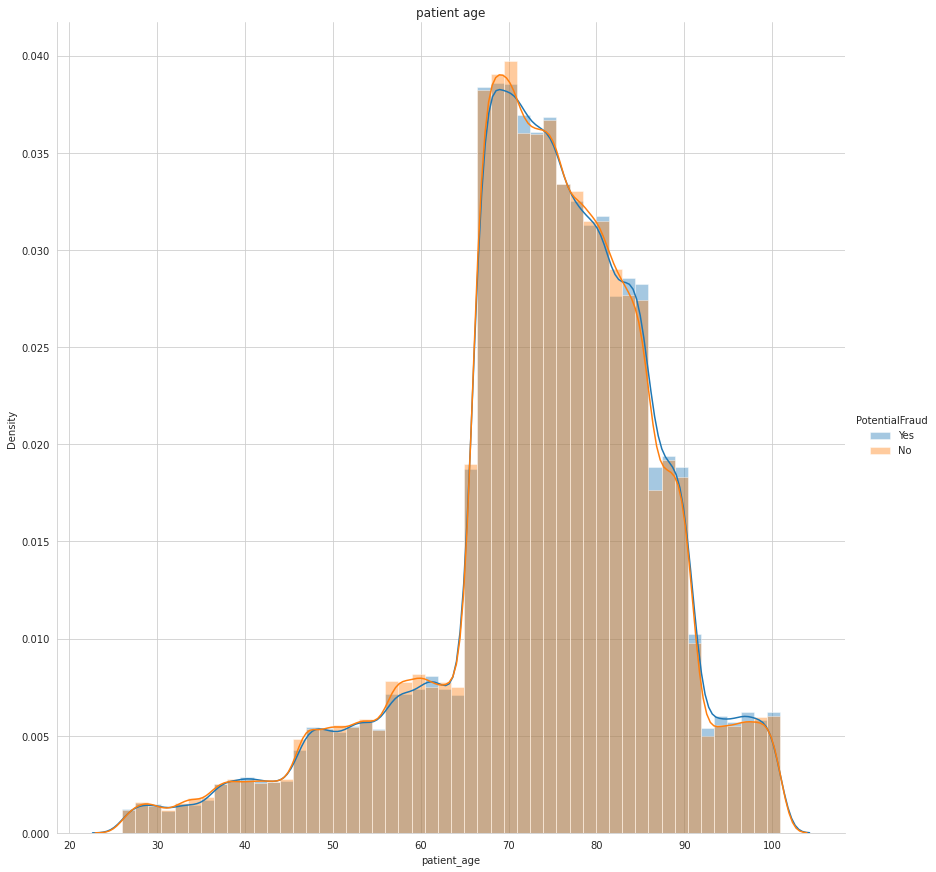

In [273]:
grid = sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud" ,size=12)
# Map the distplot of "InscClaimAmtReimbursed" on the FacetGrid
grid.map(sns.distplot, "patient_age")
grid.add_legend()
# Show the plot
plt.title('patient age')
plt.show()

# **observattion**

##**1. most of patient are age lies between 55 to 90 and data is highly overlapping so hard to differentiate between fraud or not from this plot**

# **plot to check patient risk score**

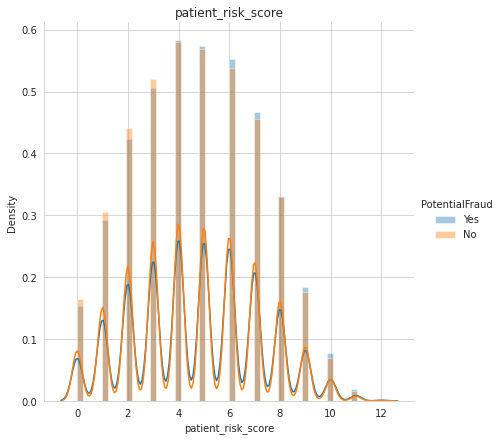

In [274]:
grid = sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud" ,size=6)
# Map the distplot of "InscClaimAmtReimbursed" on the FacetGrid
grid.map(sns.distplot, "patient_risk_score")
grid.add_legend()
# Show the plot
plt.title('patient_risk_score')
plt.show()

# **OBSERVATION**

##**1. AGAIN DATA IS HIGHLY OVERLAPPING TO DETECT WHEATHER PATIENT IS FRAUD OR NOT**

In [275]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

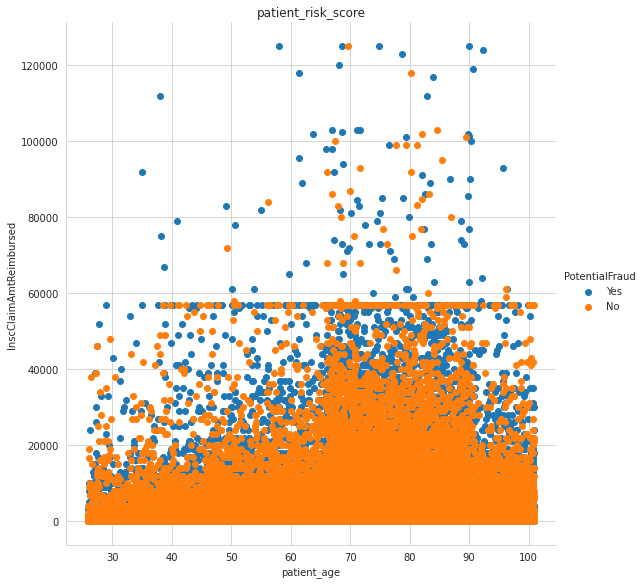

In [276]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud" ,size=8)
# Map the distplot of "InscClaimAmtReimbursed" on the FacetGrid
grid.map(plt.scatter, "patient_age",'InscClaimAmtReimbursed')
grid.add_legend()
# Show the plot
plt.title('patient_risk_score')
plt.show()

# **OBSERVATION**

##**1. WE CAN SEE FROM ABOVE PLOT THAT PATIENT ARE NOT INVOLVED FRAUDLENT ACTIVITY THEIR  REHIMBURSE AMOUNT LESS THAN 60000 YES THERE IS SOME OUTLIER**

##**2.PATIENT WHO INVOLVES IN FRADULENT ACTIVITY THERI INSC REHIMBURSE AMOUNT IS HIGH SO THAT IS SUSPICIOUS**

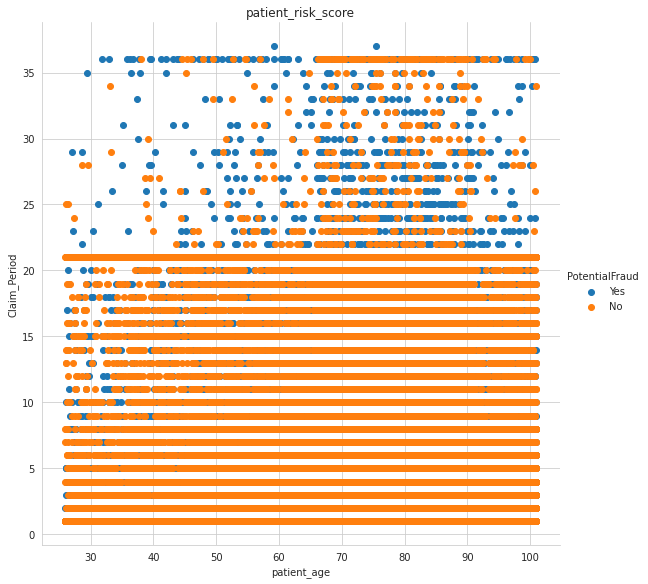

In [277]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud" ,size=8)
# Map the distplot of "InscClaimAmtReimbursed" on the FacetGrid
grid.map(plt.scatter, "patient_age",'Claim_Period')
grid.add_legend()
# Show the plot
plt.title('patient_risk_score')
plt.show()

# **PAIR PLOT TO ANALYZE THE REHIMBURSE AND DEDUCTIBLE AMPUNT FOR BOTH INPATIENT AND OUTPAITENT**

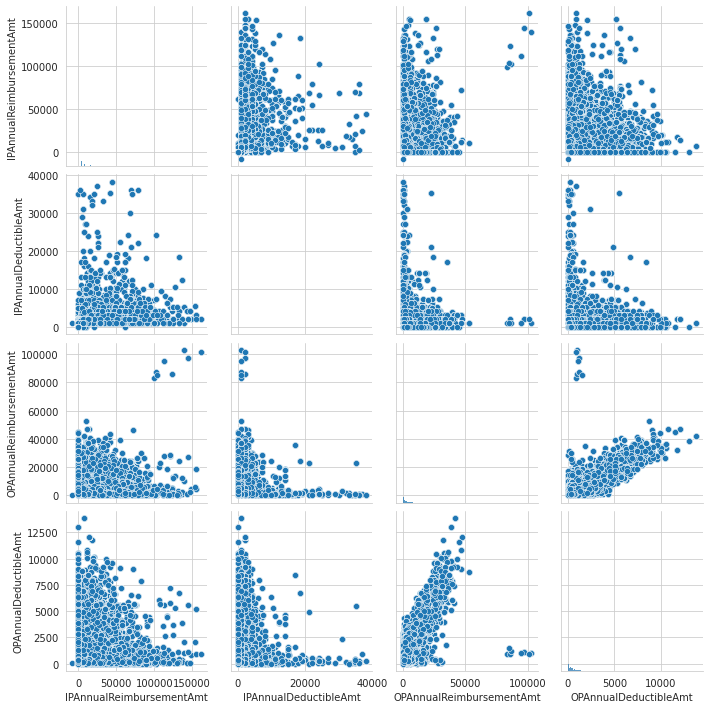

In [278]:
sns.pairplot(Final_Dataset_Train[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']], palette='husl')

# **OBSERVATION**

##**1. DATA IS HIGHLY OVERLAPPING BUT AT SOME POINT OF LEVEL WE CAN SAY THAT PATIENT WITH HIGH NUMBER OF CLAIM PERIOD ARE INVOLVED IN FRAUDLENT ACTIVITY SO THAT IS WE CAN FOCUS MORE INVESTIGATE WHICH CLAIMS TOO  HIGHER NUMBER OF CLAIM TO REHIMBURSE**

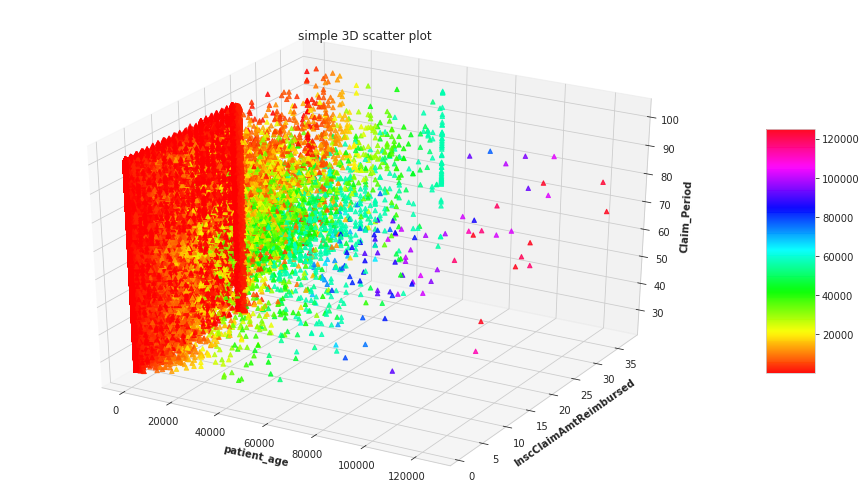

In [279]:

# ref : https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = Final_Dataset_Train['patient_age']
x = Final_Dataset_Train['InscClaimAmtReimbursed']
y = Final_Dataset_Train['Claim_Period']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('patient_age', fontweight ='bold')
ax.set_ylabel('InscClaimAmtReimbursed', fontweight ='bold')
ax.set_zlabel('Claim_Period', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

# **OBSERVATION**

##**ITS NOT CEARLY VISIBLE AND HEAD TO VISULIZE FROM 3D SCATTER PLOT**

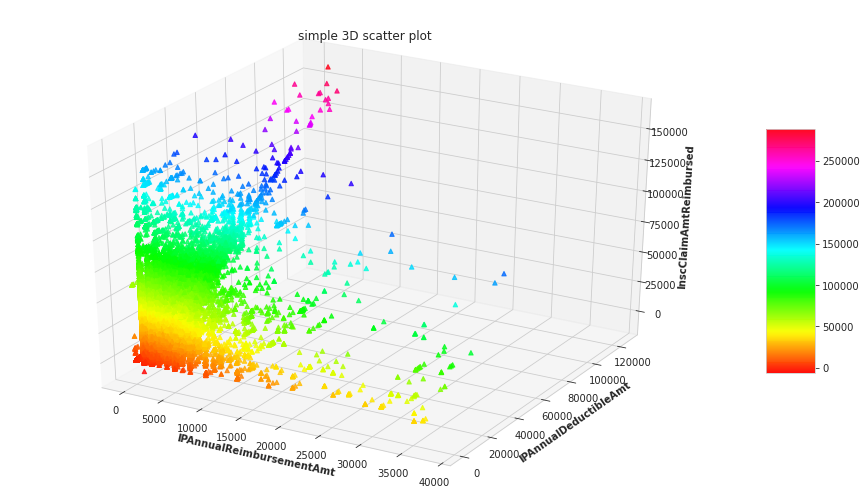

In [280]:
# ref : https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = Final_Dataset_Train['IPAnnualReimbursementAmt']
x = Final_Dataset_Train['IPAnnualDeductibleAmt']
y = Final_Dataset_Train['InscClaimAmtReimbursed']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('IPAnnualReimbursementAmt', fontweight ='bold')
ax.set_ylabel('IPAnnualDeductibleAmt', fontweight ='bold')
ax.set_zlabel('InscClaimAmtReimbursed', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

# **OBSERVATION**

##**ITS NOT CEARLY VISIBLE AND HEAD TO VISULIZE FROM 3D SCATTER PLOT**

# **now we are going to make new column in final dataset of total rehimburse and deduct amount**

# **NOW WILL ANALYSE THE REHIMBURSE AND DEDUCTIBLE AMOUNT INBOTH INAPTIENT AND OUTPATIENT**

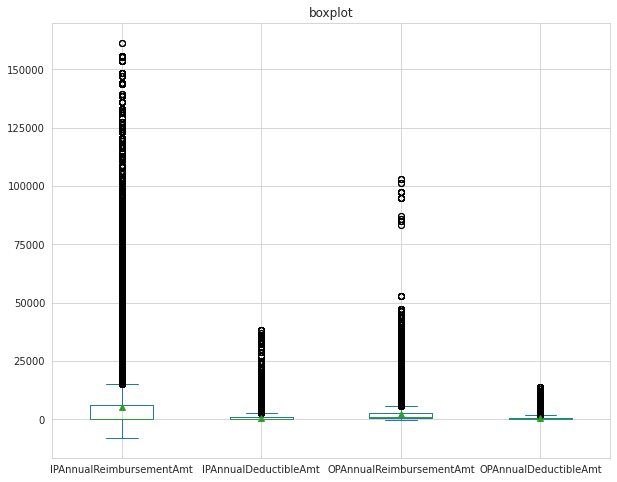

In [281]:
ax = Final_Dataset_Train[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']].plot(kind='box', title='boxplot', showmeans=True, figsize=(10,8))
plt.show()

# **OBSERVATION**

##**1. in ipannualrehimburseamount has rehimburse higher number of payments and some payments are more than 1 lacks this also because most of fraud activity happened in inpatient data**

##**2. in IPAnnualDeductibleAmt all the amount is less than 40000 yes there is some outlier same for opannualdeductiblamt less than 20000**

##**3. for outpaitnet rehimbursed aount is less than 50000 except some outiers**


# **DISTPLOT FOR CLAIM PERIOD TO DETECT THE POTENTIAL FRAUD**

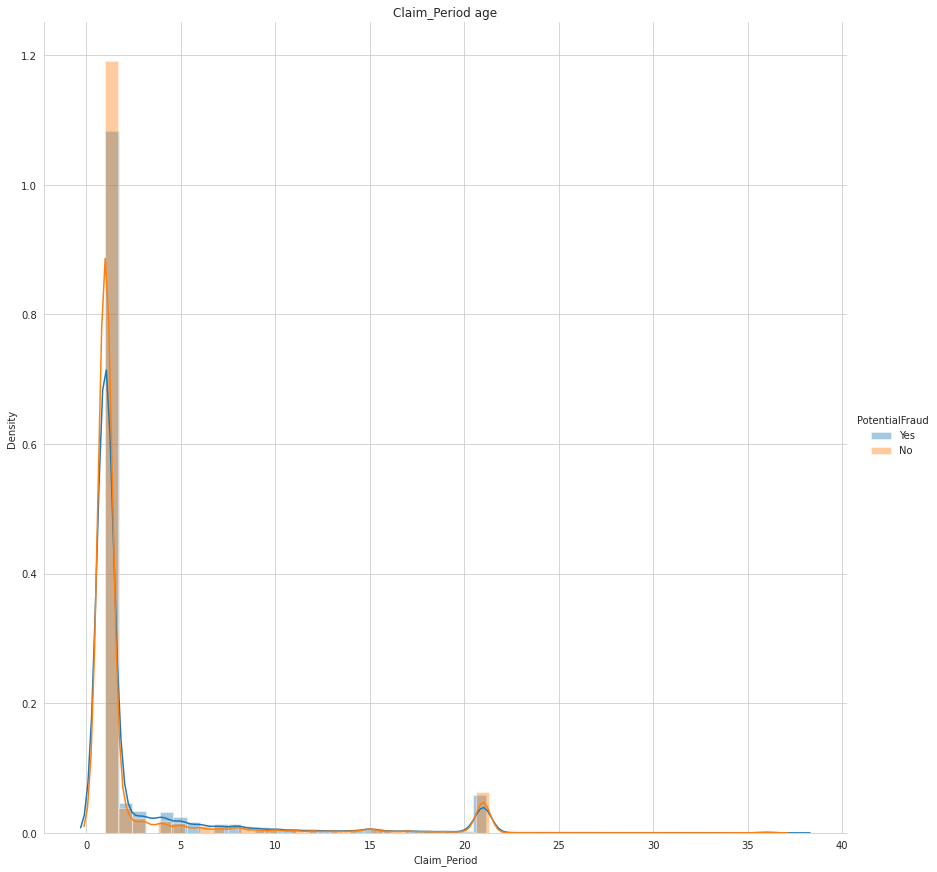

In [283]:
grid = sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud" ,size=12)
# Map the distplot of "InscClaimAmtReimbursed" on the FacetGrid
grid.map(sns.distplot, "Claim_Period")
grid.add_legend()
# Show the plot
plt.title('Claim_Period age')
plt.show()

# **OBSERVATION**

##**1. WE CAN SEE THAT MAXIMUM NUMBER OF CLAIMS SETTELED IN LESS THAN 5 DAYS....YES THERE IS SOME CLAIMS WHICH TOOK MORE THAN 20 DAYS BUT DATA IS HIGHLY OVERLAPPING CANNOT PROPERLY DISTINGUISH BETWEEN FRAUD OR NOT FROM CLAIM PERIOD**

# **SCATTER PLOT FOR CLAIM_PERIOD AND PATIENT_RISK_SCORE**

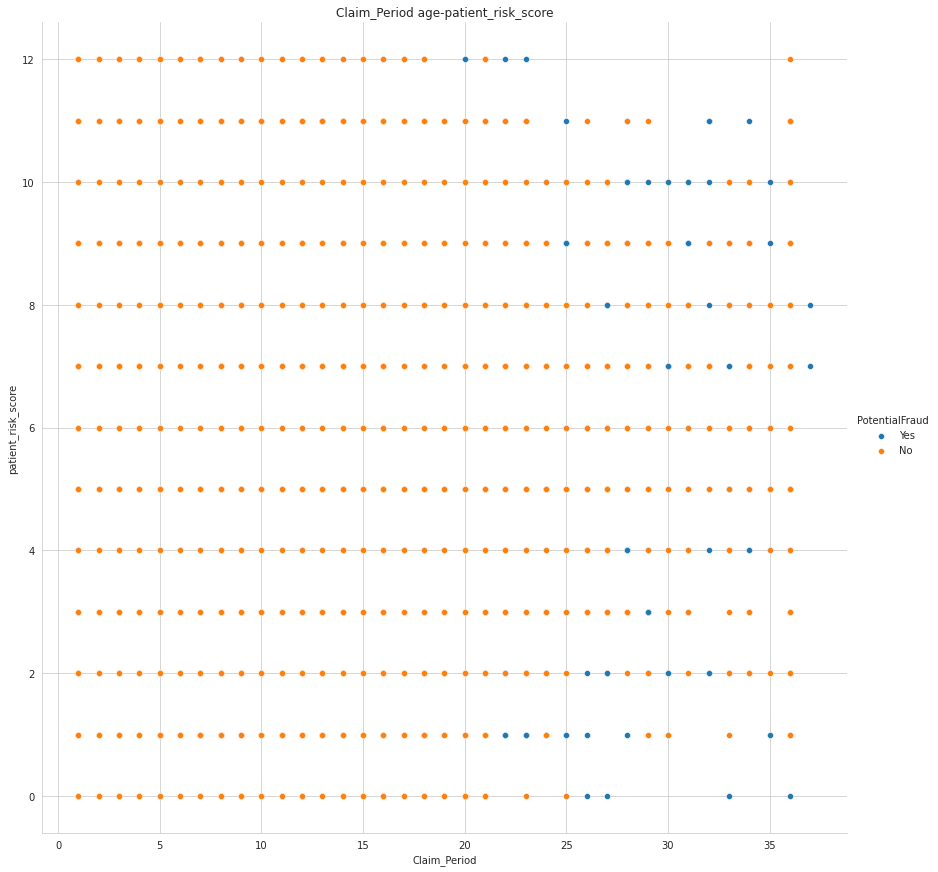

In [284]:
grid = sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud" ,size=12)
grid.map(sns.scatterplot, "Claim_Period","patient_risk_score")
grid.add_legend()
plt.title('Claim_Period age-patient_risk_score')
plt.show()

# **OBSERVATION**

##**1. WE CAN CLEARLY OBSERVE FROM ABOVE PLOT THAT MOST OF FRAUDS HAPPENED WHEN CLAIM PERIOD IS HIGH THAT SEEMS TO BE SUSPICIOUS**

In [285]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [286]:
Final_Dataset_Train

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,patient_risk_score,age_days,age_years,age,PotentialFraud,patient_age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,36000,3204,60,70,7,24441 days,66.915811,66.92,Yes,66.92
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,24000,2136,450,200,4,28338 days,77.585216,77.59,Yes,77.59
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,19000,1068,100,20,5,35064 days,96.000000,96.00,Yes,96.00
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,17000,1068,1050,540,2,31838 days,87.167693,87.17,Yes,87.17
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,27000,2136,450,160,6,29008 days,79.419576,79.42,Yes,79.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaT,...,0,0,890,120,2,31015 days,84.914442,84.91,No,84.91
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238,NaN,NaT,...,0,0,4400,220,5,30165 days,82.587269,82.59,No,82.59
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,PHY338096,NaN,NaN,NaT,...,0,0,14240,2810,7,23194 days,63.501711,63.50,No,63.50
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,NaN,NaN,NaT,...,0,0,640,350,9,31168 days,85.333333,85.33,No,85.33


# **now we are going to analyze the total inpatient and outpaient rehimbursement amount with inscclaimamount**

In [287]:
Final_Dataset_Train['IP_OP_AnnualReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['IPAnnualDeductibleAmt']
Final_Dataset_Test['IP_OP_AnnualReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['IPAnnualDeductibleAmt']

# **we are going to analyze through scatter plot**

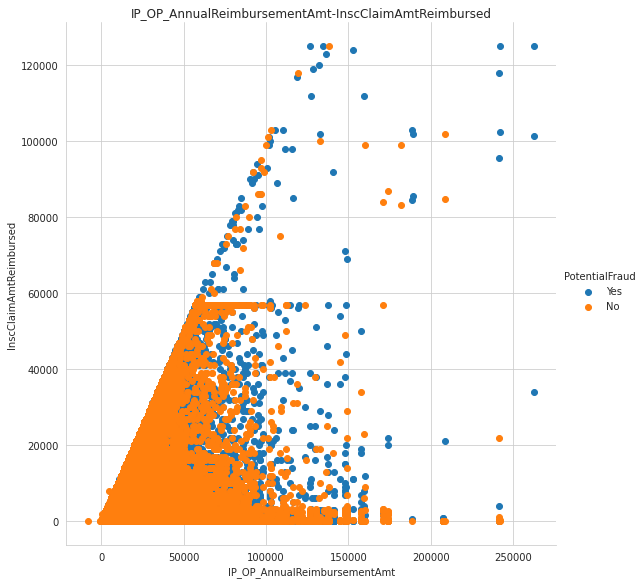

In [288]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud" ,size=8)
# Map the distplot of "InscClaimAmtReimbursed" on the FacetGrid
grid.map(plt.scatter, "IP_OP_AnnualReimbursementAmt",'InscClaimAmtReimbursed')
grid.add_legend()
# Show the plot
plt.title('IP_OP_AnnualReimbursementAmt-InscClaimAmtReimbursed')
plt.show()

# **OBSERVATION**

##**1. DATA IS HIGHLY OVERLAPPING BUT WE CAN OBSERVE THAT FROM PLOT MOST OF PATIENT WHO HAS FOUND TO BE FRAUD THERE INSC CLAIM REHIMBURSE IS MORE THAN 30000 AND IP_OP_ANNUNAL_REHMBURSE_AMOUNT IS MORE THAN 50000 SO THAT MAY BE SUSPICIOUS AND TOPIC TO THINK DURING THE INVESTIGATION**

# **now we are going to analyze inpatient and outpatient deductible amount with claim_amt_rehimbursed**

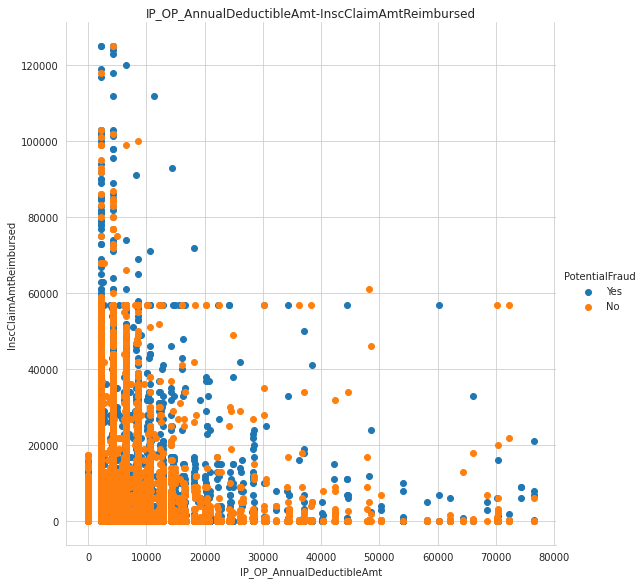

In [289]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud" ,size=8)
# Map the distplot of "InscClaimAmtReimbursed" on the FacetGrid
grid.map(plt.scatter, "IP_OP_AnnualDeductibleAmt",'InscClaimAmtReimbursed')
grid.add_legend()
# Show the plot
plt.title('IP_OP_AnnualDeductibleAmt-InscClaimAmtReimbursed')
plt.show()

# **OBSERVATION**

##**. FROM THIS ABOVE PLOT WE CAN OBSERVE THAT PATIENT WITH MORE 20000 INSCCLAIMAMTREHIMBURSED IS SHOWS AS FRAUD**

In [290]:
print('Final_train_data')
print(len(Final_Dataset_Train.columns), Final_Dataset_Train.columns)
print('***************************************************************')
print('Final_test_data')
print(len(Final_Dataset_Test.columns), Final_Dataset_Test.columns)

Final_train_data
74 Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDisea

# **checking the null values**

In [291]:
columns_with_missing_values = Final_Dataset_Train.columns[Final_Dataset_Train.isna().any()].tolist()
columns_with_missing_values

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Hospitalization_Duration',
 'ExtraClaimDays',
 'Admission_Year',
 'Admission_Month',
 'Discharge_Year',
 'Discharge_Month']

In [292]:
Final_Dataset_Train.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,patient_risk_score,age_days,age_years,age,PotentialFraud,patient_age,IP_OP_AnnualReimbursementAmt,IP_OP_AnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,60,70,7,24441 days,66.915811,66.92,Yes,66.92,36060,6408
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,450,200,4,28338 days,77.585216,77.59,Yes,77.59,24450,4272
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,100,20,5,35064 days,96.000000,96.00,Yes,96.00,19100,2136


# **Replacing null values**

In [293]:
columns_with_missing_values = Final_Dataset_Train.columns[Final_Dataset_Train.isna().any()].tolist()
columns_with_missing_values

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Hospitalization_Duration',
 'ExtraClaimDays',
 'Admission_Year',
 'Admission_Month',
 'Discharge_Year',
 'Discharge_Month']

In [294]:
Final_Dataset_Test.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,patient_risk_score,age_days,age_years,age,patient_age,IP_OP_AnnualReimbursementAmt,IP_OP_AnnualDeductibleAmt
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,2136,120,100,6,27120 days,74.250513,74.25,74.25,21380,4272
1,BENE23826,CLM56697,2009-06-22,2009-06-24,PRV57070,3000,PHY427017,NaN,PHY351953,2009-06-22,...,2136,2540,1880,8,36739 days,100.585900,100.59,100.59,10540,4272
2,BENE24014,CLM63574,2009-08-12,2009-08-18,PRV57070,7000,PHY426001,PHY351953,NaN,2009-08-12,...,2136,40,100,6,18446 days,50.502396,50.50,50.50,10240,4272
3,BENE41847,CLM59473,2009-07-13,2009-07-21,PRV57070,5000,PHY426001,PHY351953,NaN,2009-07-13,...,1068,600,180,4,30346 days,83.082820,83.08,83.08,5600,2136
4,BENE74857,CLM54585,2009-06-07,2009-06-17,PRV57070,9000,PHY351953,PHY351953,NaN,2009-06-07,...,1068,10,40,9,25963 days,71.082820,71.08,71.08,9010,2136


In [295]:
columns_with_missing_values = Final_Dataset_Test.columns[Final_Dataset_Test.isna().any()].tolist()
columns_with_missing_values

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Hospitalization_Duration',
 'ExtraClaimDays',
 'Admission_Year',
 'Admission_Month',
 'Discharge_Year',
 'Discharge_Month']

# **checking in these two column admissiondt and dischargedt where value is NAT replace them with 0**

In [296]:
Final_Dataset_Train[['AdmissionDt', 'DischargeDt']] = Final_Dataset_Train[['AdmissionDt', 'DischargeDt']].where(Final_Dataset_Train[['AdmissionDt', 'DischargeDt']].notna(), 0)
Final_Dataset_Test[['AdmissionDt', 'DischargeDt']] = Final_Dataset_Test[['AdmissionDt', 'DischargeDt']].where(Final_Dataset_Test[['AdmissionDt', 'DischargeDt']].notna(), 0)

In [297]:
Final_Dataset_Train = Final_Dataset_Train.replace(np.nan, 0)
Final_Dataset_Test = Final_Dataset_Test.replace(np.nan, 0)


In [298]:
Final_Dataset_Train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,patient_risk_score,age_days,age_years,age,PotentialFraud,patient_age,IP_OP_AnnualReimbursementAmt,IP_OP_AnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,0,0,2009-04-12 00:00:00,...,60,70,7,24441 days,66.915811,66.92,Yes,66.92,36060,6408
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,0,0,...,450,200,4,28338 days,77.585216,77.59,Yes,77.59,24450,4272
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20 00:00:00,...,100,20,5,35064 days,96.000000,96.00,Yes,96.00,19100,2136
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,0,2009-10-17 00:00:00,...,1050,540,2,31838 days,87.167693,87.17,Yes,87.17,18050,2136
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25 00:00:00,...,450,160,6,29008 days,79.419576,79.42,Yes,79.42,27450,4272


In [299]:
Final_Dataset_Test.isnull().sum().sum()

0

# **so finally there is no null value in final_train_dataset**

In [300]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [301]:
Final_Dataset_Test.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [302]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 
           'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']



In [303]:
def create_features_using_groupby(train_df,test_df, groupby_cols, operation_cols, operation):
    """
    This function will groupby the train and test column and perform the operation on the operation column and will return the
     mean of each column by given input will return the column like per_provider_col_oprations'
    """
    groupby_cols = ''.join(groupby_cols)
    operation_name = operation.__name__
    for col in operation_cols:
        # create new column name for the dataframe
        new_col_name = f'Per{groupby_cols}_{operation_name}_{col}'
        train_df[new_col_name] = train_df.groupby(groupby_cols)[col].transform(operation)
        test_df[new_col_name] = test_df.groupby(groupby_cols)[col].transform(operation)

    return train_df,test_df

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,
    Final_Dataset_Test,
    groupby_cols=['Provider'],
    operation_cols=columns,
    operation=np.mean  #<-- pass the function
)










# **there is some procedure which are performed most in fraudlent activity so here we are taking the mean of per clmprocedure code and adding that column with dataset**

In [304]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train ,Final_Dataset_Test= create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmProcedureCode_1'],
    operation_cols=columns,
    operation=np.mean  # now here we are passign the function 
)


In [305]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmProcedureCode_2'],
    operation_cols=columns,
    operation=np.mean                 # now here we are passign the function
)

In [306]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train ,Final_Dataset_Test= create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmProcedureCode_3'],
    operation_cols=columns,
    operation=np.mean                      # now here we are passign the function
)

In [318]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train ,Final_Dataset_Test= create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmProcedureCode_4'],
    operation_cols=columns,
    operation=np.mean                      # now here we are passign the function
)

In [311]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmProcedureCode_5'],
    operation_cols=columns,
    operation=np.mean                   # now here we are passign the function
)

In [312]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmProcedureCode_6'],
    operation_cols=columns,
    operation=np.mean                    # now here we are passign the function
)

# **NOW WILL ADD THE ALL THE DIGNOSIS CODE COLUMN**

##**from the earlier part of this case study during eda we have observed that most of paitent got affected by any partiular deasease most 4019 like so here aloso we are taking mean of dignosis code using group by function and taking that mean**

In [313]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmDiagnosisCode_1'],
    operation_cols=columns,
    operation=np.mean                  # now here we are passign the function
)

In [314]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmDiagnosisCode_2'],
    operation_cols=columns,
    operation=np.mean               # now here we are passign the function
)

In [319]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmDiagnosisCode_3'],
    operation_cols=columns,
    operation=np.mean               # now here we are passign the function
)

In [320]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmDiagnosisCode_4'],
    operation_cols=columns,
    operation=np.mean               # now here we are passign the function
)

In [321]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmDiagnosisCode_5'],
    operation_cols=columns,
    operation=np.mean               # now here we are passign the function
)

In [323]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmDiagnosisCode_6'],
    operation_cols=columns,
    operation=np.mean               # now here we are passign the function
)

In [324]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['BeneID'],
    operation_cols=columns,
    operation=np.mean               # now here we are passign the function
)

# **OBSERVATION**

##**WE HAVE SEEN THAT SOME PHYSICIAN ARE ALSO INVOLVED IN FRAUDLENT ACTIVITY SO WE ARE ALSO TAKING THEIR MEAN WITH EACH COLUMN USING GROUP BY FUNCTION AND ADDING INTO DATASET**

In [325]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['AttendingPhysician'],
    operation_cols=columns,
    operation=np.mean              # now here we are passign the function
)

In [326]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['OperatingPhysician'],
    operation_cols=columns,
    operation=np.mean             # now here we are passign the function
)

In [327]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['OtherPhysician'],
    operation_cols=columns,
    operation=np.mean             # now here we are passign the function
)

# **OBSERVATION**

##**HERE ALSO WE ARE DOING GROUP BY OPERATION ON DIGNOSIS GROUP CODE AND TAKING EAN WITH EAH COLUMN**

In [328]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train,Final_Dataset_Test = create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['DiagnosisGroupCode'],
    operation_cols=columns,
    operation=np.mean             # now here we are passign the function
)

In [329]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_age', 'Hospitalization_Duration', 'Claim_Period', 'patient_risk_score']

Final_Dataset_Train ,Final_Dataset_Test= create_features_using_groupby(
    Final_Dataset_Train,Final_Dataset_Test,
    groupby_cols=['ClmAdmitDiagnosisCode'],
    operation_cols=columns,
    operation=np.mean             # now here we are passign the function
)

In [330]:
Final_Dataset_Train.shape

(558211, 266)

In [331]:
Final_Dataset_Test.shape

(135392, 265)

# **now will remove unnecesary columns**

In [355]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                ]

Final_Dataset_Train_after_feature_engineering  =Final_Dataset_Train.drop(columns=remove_columns, axis=1)
Final_Dataset_Test_after_feature_engineering   =Final_Dataset_Test.drop(columns=remove_columns, axis=1)



In [356]:
# Convert type of Gender and Race to categorical
Final_Dataset_Train_after_feature_engineering.Gender=Final_Dataset_Train_after_feature_engineering.Gender.astype('category')

Final_Dataset_Train_after_feature_engineering.Race=Final_Dataset_Train_after_feature_engineering.Race.astype('category')


In [357]:
Final_Dataset_Train_after_feature_engineering.head()

,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,...,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score
0,PRV55912,26000,2009-04-12 00:00:00,7866,1068.0,2009-04-18 00:00:00,201,0.0,7.0,7,...,3713.690476,225.333333,9306.428571,858.174603,2063.134921,654.563492,75.371389,1.575397,2.718254,5.484127
1,PRV55912,50,0,0,0.0,0,0,0.0,0.0,1,...,289.162746,2.784421,4153.426847,452.415855,2352.398936,667.226055,73.631668,0.000000,2.547794,4.526082
2,PRV55912,19000,2009-01-20 00:00:00,45340,1068.0,2009-02-01 00:00:00,987,0.0,13.0,13,...,2568.850575,286.551724,8983.984674,924.521073,2067.624521,580.804598,74.267816,1.655172,2.911877,5.314176
3,PRV55912,17000,2009-10-17 00:00:00,V5789,1068.0,2009-11-04 00:00:00,941,0.0,19.0,19,...,15576.233230,1030.526316,23091.403509,1843.917441,1713.467492,470.615067,74.822786,13.787410,13.821465,5.637771
4,PRV55912,13000,2009-10-25 00:00:00,71946,1068.0,2009-10-29 00:00:00,506,0.0,5.0,5,...,1563.232104,138.759219,5114.327549,546.151844,1737.722343,532.830803,73.831247,0.726681,2.860087,4.611714


In [358]:
Final_Dataset_Train_after_feature_engineering.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmProcedureCode_6', 'Hospitalization_Duration',
       'Claim_Period',
       ...
       'PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed',
       'PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid',
       'PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt',
       'PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt',
       'PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt',
       'PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt',
       'PerClmAdmitDiagnosisCode_mean_patient_age',
       'PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration',
       'PerClmAdmitDiagnosisCode_mean_Claim_Period',
       'PerClmAdmitDiagnosisCode_mean_patient_risk_score'],
      dtype='object', length=244)

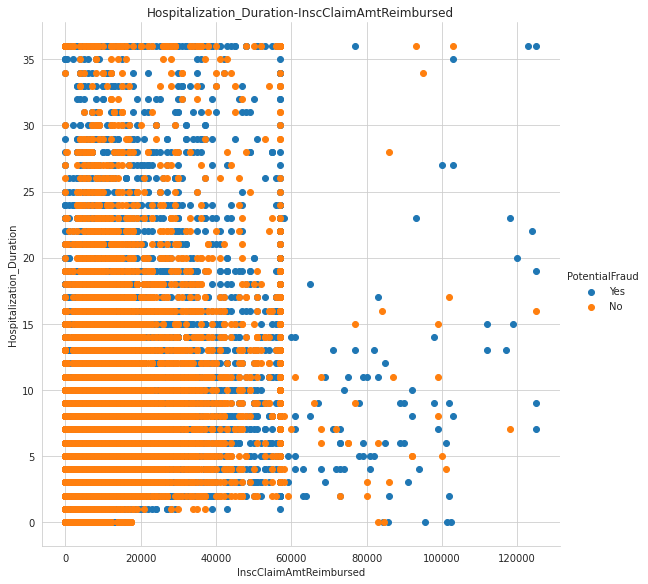

In [359]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(Final_Dataset_Train_after_feature_engineering, hue="PotentialFraud" ,size=8)
# Map the distplot of "InscClaimAmtReimbursed" on the FacetGrid
grid.map(plt.scatter, "InscClaimAmtReimbursed",'Hospitalization_Duration')
grid.add_legend()
# Show the plot
plt.title('Hospitalization_Duration-InscClaimAmtReimbursed')
plt.show()

# **OBSERVATION**

##**AS WE CAN OBSERVE FROM THE PLOT THAT PROVIDERS WHOM ARE FRAUDS THEY HAVE HIGH NUMBER NUMBER OF CLAIM PERIOD AND SOME PATIENT HAS CLAIM AMOUNT MORE THAN 1 LACKS AND THEIR CLAIM GOT SETTLED WITHING 10 DAYS....THAT REALLY BIG ISSUE**

##**DATAPOINTS ARE HIGHLY OVERLAPPIG**

# **PERFORMING THE ONE HOT ENCODING ON GENDER AND RACE FEATURES**

In [360]:
# Do one hot encoding for gender and Race
Final_Dataset_Train_after_feature_engineering=pd.get_dummies(Final_Dataset_Train_after_feature_engineering,columns=['Gender','Race'])


In [361]:
Final_Dataset_Train_after_feature_engineering.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmProcedureCode_6', 'Hospitalization_Duration',
       'Claim_Period',
       ...
       'PerClmAdmitDiagnosisCode_mean_patient_age',
       'PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration',
       'PerClmAdmitDiagnosisCode_mean_Claim_Period',
       'PerClmAdmitDiagnosisCode_mean_patient_risk_score', 'Gender_0',
       'Gender_1', 'Race_1', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object', length=248)

In [362]:
Final_Dataset_Test_after_feature_engineering=pd.get_dummies(Final_Dataset_Test_after_feature_engineering,columns=['Gender','Race'])


In [363]:
Final_Dataset_Test_after_feature_engineering.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmProcedureCode_6', 'Hospitalization_Duration',
       'Claim_Period',
       ...
       'PerClmAdmitDiagnosisCode_mean_patient_age',
       'PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration',
       'PerClmAdmitDiagnosisCode_mean_Claim_Period',
       'PerClmAdmitDiagnosisCode_mean_patient_risk_score', 'Gender_0',
       'Gender_1', 'Race_1', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object', length=247)

In [372]:
Final_Dataset_Test_after_feature_engineering.head(5)

,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,PRV57070,9000,2009-09-09 00:00:00,5789,1068.0,2009-09-16 00:00:00,332,0.0,8.0,8,...,74.628286,5.057143,5.285714,5.371429,1,0,1,0,0,0
1,PRV57070,3000,2009-06-22 00:00:00,7295,1068.0,2009-06-24 00:00:00,576,0.0,3.0,3,...,74.679421,0.574074,2.013889,4.793981,1,0,1,0,0,0
2,PRV57070,7000,2009-08-12 00:00:00,42731,1068.0,2009-08-18 00:00:00,294,0.0,7.0,7,...,72.968872,0.726770,2.393805,5.470133,1,0,1,0,0,0
3,PRV57070,5000,2009-07-13 00:00:00,79902,1068.0,2009-07-21 00:00:00,182,0.0,9.0,9,...,73.774516,3.612903,3.935484,5.161290,1,0,1,0,0,0
4,PRV57070,9000,2009-06-07 00:00:00,7840,1068.0,2009-06-17 00:00:00,554,0.0,11.0,11,...,74.831222,0.791855,1.832579,5.176471,1,0,1,0,0,0


In [365]:
Final_Dataset_Provider_Train = Final_Dataset_Train_after_feature_engineering.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Final_Dataset_Provider_Test  = Final_Dataset_Test_after_feature_engineering.groupby(['Provider'],as_index=False).agg('sum')

In [366]:
Final_Dataset_Provider_Train

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,PRV51001,No,104640,5340.0,0.0,30.0,61,0.0,50225,125,...,1872.124752,34.488500,79.928594,128.360407,16.0,9.0,21.0,4.0,0.0,0.0
1,PRV51003,Yes,605670,66286.0,0.0,382.0,617,0.0,265187,804,...,9752.142258,248.575108,465.823969,662.905082,78.0,54.0,107.0,24.0,0.0,1.0
2,PRV51004,No,52170,310.0,0.0,0.0,362,0.0,299341,926,...,10975.369856,45.457451,392.930581,690.434231,103.0,46.0,120.0,24.0,5.0,0.0
3,PRV51005,Yes,280910,3700.0,0.0,0.0,2433,0.0,2340483,7376,...,85836.366022,189.910839,2914.730682,5369.285209,654.0,511.0,893.0,262.0,10.0,0.0
4,PRV51007,No,33710,3264.0,0.0,19.0,141,0.0,144648,448,...,5304.497707,35.451045,201.410628,337.941920,38.0,34.0,58.0,14.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,No,10640,130.0,0.0,0.0,88,0.0,56252,151,...,2071.129169,1.680014,73.139847,131.881358,12.0,16.0,22.0,2.0,0.0,4.0
5406,PRV57760,No,4770,0.0,0.0,0.0,29,0.0,44198,134,...,1621.401287,7.452757,57.719902,102.341050,5.0,17.0,18.0,4.0,0.0,0.0
5407,PRV57761,No,18470,370.0,0.0,0.0,196,0.0,164738,581,...,6042.978260,27.729556,211.514209,385.171512,42.0,40.0,70.0,7.0,1.0,4.0
5408,PRV57762,No,1900,0.0,0.0,0.0,1,0.0,2009,9,...,77.261951,0.292683,2.426829,5.134146,0.0,1.0,1.0,0.0,0.0,0.0


# **checking the correlation between features**

In [371]:
Final_Dataset_Provider_Train.corr(min_periods=3)

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
InscClaimAmtReimbursed,1.000000,0.961801,NaN,0.954089,0.656280,0.195086,0.542463,0.542711,0.542463,0.542373,...,0.542848,0.978899,0.603951,0.556729,0.540208,0.542380,0.544592,0.524843,0.293198,0.337617
DeductibleAmtPaid,0.961801,1.000000,NaN,0.994738,0.451006,0.195965,0.319308,0.319731,0.319308,0.319372,...,0.319745,0.914327,0.389848,0.335579,0.317486,0.319934,0.322922,0.343688,0.119130,0.164189
ClmProcedureCode_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospitalization_Duration,0.954089,0.994738,NaN,1.000000,0.425909,0.197443,0.290961,0.291377,0.290962,0.291036,...,0.291401,0.900969,0.362359,0.307332,0.289147,0.291740,0.294647,0.320558,0.097953,0.143013
Claim_Period,0.656280,0.451006,NaN,0.425909,1.000000,0.075569,0.986304,0.986174,0.986304,0.986117,...,0.986371,0.764210,0.994454,0.988649,0.984485,0.983044,0.982642,0.850697,0.696079,0.719808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gender_1,0.542380,0.319934,NaN,0.291740,0.983044,0.051172,0.996645,0.996420,0.996645,0.996421,...,0.996648,0.664817,0.993729,0.996498,0.989924,1.000000,0.992171,0.837222,0.733135,0.743510
Race_1,0.544592,0.322922,NaN,0.294647,0.982642,0.051143,0.995990,0.995626,0.995990,0.995623,...,0.995990,0.666788,0.993384,0.995908,0.994541,0.992171,1.000000,0.830214,0.677376,0.694464
Race_2,0.524843,0.343688,NaN,0.320558,0.850697,0.053863,0.848467,0.847983,0.848468,0.847929,...,0.848476,0.626047,0.852157,0.849855,0.853101,0.837222,0.830214,1.000000,0.461100,0.498129
Race_3,0.293198,0.119130,NaN,0.097953,0.696079,0.011485,0.723671,0.725040,0.723671,0.725148,...,0.723657,0.395410,0.712299,0.721425,0.713632,0.733135,0.677376,0.461100,1.000000,0.889729


# **ITS VERY HARD TO CHECK THE CORREATION BETWEEN THE FEATURES DUE TO THE HIGHER NUMBER OF FEATURES WE HAVE TO DO THIS AFTER HAVING FEATURE SELECTION TECHNIUQE AFTER MODELING**

In [367]:
Final_Dataset_Provider_Test.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,PRV51002,53790,380.0,0.0,0.0,406,0.0,411845,1323,411845,...,15092.507241,52.992085,523.937738,948.937633,134.0,71.0,169.0,30.0,2.0,4.0
1,PRV51006,30720,0.0,0.0,0.0,315,0.0,204918,667,204918,...,7503.404945,15.885134,256.882846,471.402603,59.0,43.0,76.0,26.0,0.0,0.0
2,PRV51009,27230,1238.0,0.0,8.0,140,0.0,78350,247,78351,...,2863.040709,11.044173,98.942219,179.369658,23.0,16.0,33.0,6.0,0.0,0.0
3,PRV51010,64580,5340.0,0.0,29.0,83,0.0,76342,247,76342,...,2792.990756,27.935067,103.781086,183.045145,15.0,23.0,37.0,1.0,0.0,0.0
4,PRV51018,61620,670.0,0.0,0.0,454,0.0,381709,1239,381710,...,13981.532103,26.227426,493.921231,876.671105,124.0,66.0,145.0,45.0,0.0,0.0


# **NOW FINALLY STROING FINAL DATASET TO CSV FILE TO PERFORM FURTHER TASK**

In [368]:
Final_Dataset_Provider_Train.to_csv('Final_Dataset_Provider_Train.csv', index=False)
Final_Dataset_Provider_Test.to_csv('Final_Dataset_Provider_Test.csv', index=False)